# Nonesuch XRD Mineralogy

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from scipy.stats import linregress
%matplotlib inline
pd.set_option('display.max_rows', 500)


In [2]:
mpl.rc('pdf',fonttype = 42)

# Import the XRD data

In [3]:
index = list(np.arange(0,46,1))
Data = pd.read_excel('../Data/XRD/NonesuchFm_XRD_results.xlsx', sheet_name='XRDData',index_col = 0, header = [0,1], skiprows = 0)
Data

Core Depth (ft)  Strat (m)            Sample   Bulk             \
        Core Depth (ft)  Strat (m)            Sample Quartz K-feldspar   
0.0     DO-8     953.40        NaN          D08-953b   25.0        NaN   
1.0     DO-8     993.40        NaN          D08-993b   24.0        NaN   
2.0     DO-8     999.80        NaN         D08-1000b   27.0        NaN   
3.0     DO-8    1079.50        NaN         D08-1080b   30.0        NaN   
4.0     DO-8    1100.40        NaN         D08-1100b   29.0        NaN   
5.0     DO-8    1165.00        NaN         D08-1165b   19.0        NaN   
6.0     DO-8    1244.00        NaN         D08-1244c   24.0        NaN   
7.0     DO-8    1376.40        NaN         D08-1376b   27.0        NaN   
8.0     PC-1     128.40  240.36528          PC1-128b   30.0        6.0   
9.0     PC-1     250.50  203.14920          PC1-251b   32.0        NaN   
10.0    PC-1     295.80  189.34176          PC1-296b   24.0        NaN   
11.0    PC-1     362.90  168.88968          PC1-363b   22.0        5.0   
12.0    PC-1     450.90  142.06728          PC1-451b   20.0        7.0   
13.0    PC-1     627.00   88.39200          PC1-627b   40.0        6.0   
14.0    PC-1     718.00   60.65520          PC1-718b   30.0        7.0   
15.0    PC-1     752.60   50.10912          PC1-753b   39.0        9.0   
16.0    PC-1     865.25   15.77340          PC1-865b   35.0        8.0   
17.0    PC-1     445.30  143.77416  PC1-Turb1b-445.3   56.0        8.0   
18.0  PRF18-        NaN  105.90000           PF18-1f   21.0       32.0   
19.0  PRF18-        NaN  105.35000           PF18-6f   37.0       10.0   
20.0  PRF18-        NaN   98.16000         PF18-48.0   43.0       16.0   
21.0  PRF18-        NaN   94.73000          PF18-64e   25.0       41.0   
22.0  PRF18-        NaN  114.90000          PF18-72e   37.0       10.0   
23.0  PRF18-        NaN  115.52000          PF18-73e   26.0        6.0   
24.0  PRF18-        NaN  116.05000         PF18-75.0   19.0        5.0   
25.0  PRF18-        NaN  117.83000          PF18-80f   34.0       14.0   
26.0  PRF18-        NaN  129.89000         PF18-108e   28.0        6.0   
27.0  PRF18-        NaN  148.20000        PF18-145ef   25.0        8.0   
28.0  PRF18-        NaN  153.32000         PF18-153d   20.0        NaN   
29.0  PRF18-        NaN  157.40000        PF18-160.0   21.0        3.0   
30.0  PRF18-        NaN  158.70000        PF18-162ef   34.0        9.0   
31.0  PRF18-        NaN   43.80000      PRF18-43.86b   28.0       13.0   
32.0  PRF18-        NaN   56.90000      PRF18-56.96b   32.0       14.0   
33.0  PRF18-        NaN   78.10000       PRF18-78.1b   20.0       11.0   
34.0  PRF18-        NaN   89.90000       PRF18-89.9b   36.0        9.0   
35.0    WC-9    1138.70        NaN         WC9-1139b   38.0        9.0   
36.0    WC-9    1214.90        NaN         WC9-1215b   28.0        NaN   
37.0    WC-9    1292.30        NaN         WC9-1292b   22.0       10.0   
38.0    WC-9    1345.20        NaN         WC9-1345b   51.0        6.0   
39.0    WC-9    1399.80        NaN         WC9-1400b   26.0        5.0   
40.0    WC-9    1439.50        NaN         WC9-1439b   27.0        8.0   
41.0    WC-9    1507.60        NaN         WC9-1508C   33.0        6.0   
42.0    WC-9    1687.90        NaN         WC9-1688b   30.0        9.0   
NaN      NaN        NaN        NaN               NaN    NaN        NaN   
NaN      NaN        NaN        NaN               NaN    NaN        NaN   
NaN      NaN        NaN        NaN               NaN    NaN        NaN   

                                          ... ClayPeelAvg  \
     Plagioclase Calcite Hematite Pyrite  ...       Total   
0.0         14.0     NaN      1.0    NaN  ...       100.0   
1.0         11.0     NaN      1.0    NaN  ...        99.5   
2.0         15.0     NaN      NaN    NaN  ...       100.5   
3.0          7.0     NaN      1.0    NaN  ...       100.5   
4.0          5.0     NaN      NaN    1.0  ...       100.0   
5.0         11.0     NaN    

In [4]:
Data.loc[Data['Facies','Facies'] == 1.0, 'color'] = "#82CA9C"
Data.loc[Data['Facies','Facies'] == 2.0, 'color'] = "#919396"
Data.loc[Data['Facies','Facies'] == 3.0, 'color'] = "#F27179"

In [5]:
#Replace NAN with zeroes
DataComp = Data.fillna(value=0)
#Replace text tr and x with zeroes
DataComp.replace(to_replace='tr',value=0, inplace=True)
DataComp.replace(to_replace='x',value=0, inplace=True)
DataComp.replace(to_replace='x?',value=0, inplace=True)

In [6]:
DataComp.columns

MultiIndex([(                    'Core',                               'Core'),
            (              'Depth (ft)',                         'Depth (ft)'),
            (               'Strat (m)',                          'Strat (m)'),
            (                  'Sample',                             'Sample'),
            (                    'Bulk',                             'Quartz'),
            (                    'Bulk',                         'K-feldspar'),
            (                    'Bulk',                        'Plagioclase'),
            (                    'Bulk',                            'Calcite'),
            (                    'Bulk',                           'Hematite'),
            (                    'Bulk',                             'Pyrite'),
            (                    'Bulk',                          'Muscovite'),
            (                    'Bulk',                    'Illite/Smectite'),
            (                    'Bulk',

# Oxalate Correlations

In [7]:
DO8_Data = DataComp[DataComp['Core','Core'] == 'DO-8']
DO8_Data.reset_index(drop=True,inplace=True)
WC9_Data = DataComp[DataComp['Core','Core'] == 'WC-9']
WC9_Data.reset_index(drop=True,inplace=True)

All the cross-plots!

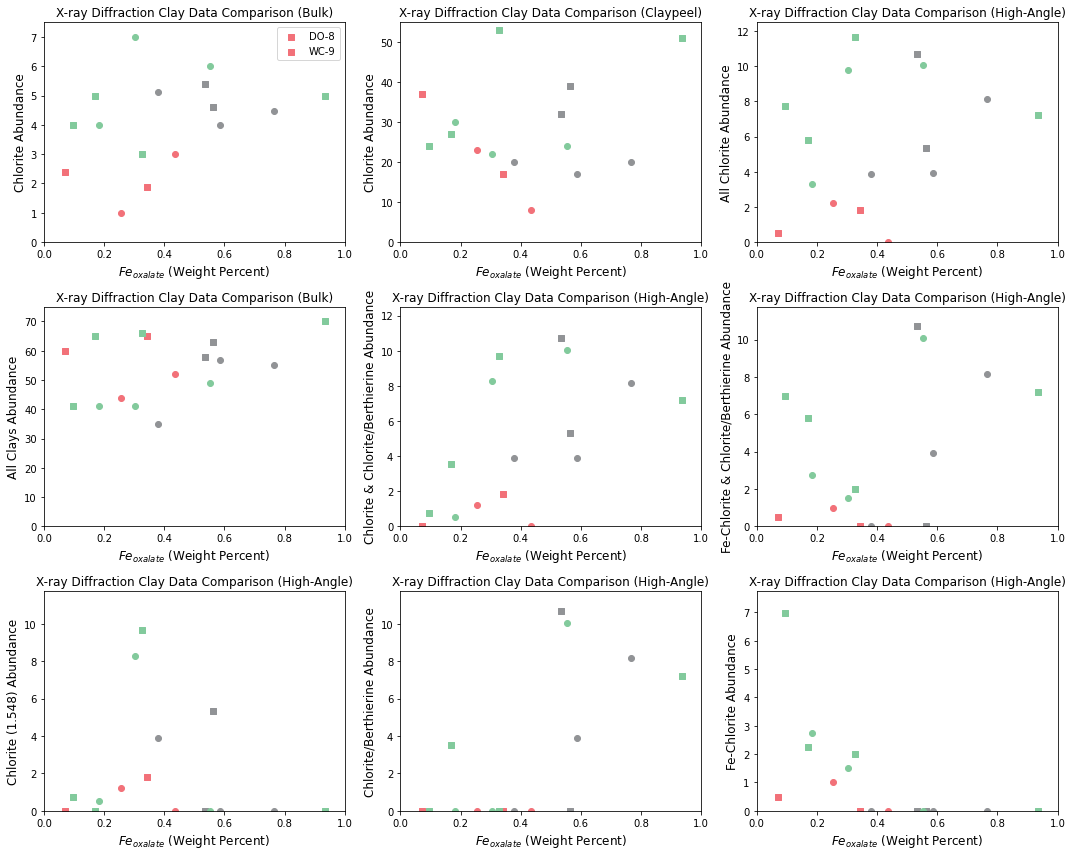

In [8]:
plt.figure(figsize=(15,12))
#plt.figure(figsize=(4.5,3.7))

plt.subplot(331)
#plt.plot(x1,y1,linestyle= 'dotted',color = 'tab:blue')
for n in DO8_Data.index:
    plt.scatter(DO8_Data['Iron Speciation Data','Fe-mag(wt%)'][n],DO8_Data['Bulk','Chlorite'][n],  c=DO8_Data['color'][n],marker = 's')
for n in WC9_Data.index:
    plt.scatter(WC9_Data['Iron Speciation Data','Fe-mag(wt%)'][n],WC9_Data['Bulk','Chlorite'][n], c=WC9_Data['color'][n],marker = 'o')
#plt.text(0.64, 12, 'Linear Regression \n$R^{2}: %1.4f$' % r_value**2, color = 'tab:blue')
plt.xlabel('$Fe_{oxalate}$ (Weight Percent)', fontsize = 'large')
plt.ylabel('Chlorite Abundance', fontsize = 'large')
plt.title('X-ray Diffraction Clay Data Comparison (Bulk)', fontsize = 'large')
plt.legend(['DO-8', 'WC-9'])
plt.ylim(0,7.5)
plt.xlim(0,1)

plt.subplot(332)
for n in DO8_Data.index:
    plt.scatter(DO8_Data['Iron Speciation Data','Fe-mag(wt%)'][n],DO8_Data['claypeel','Chlorite'][n],  c=DO8_Data['color'][n],marker = 's')
for n in WC9_Data.index:
    plt.scatter(WC9_Data['Iron Speciation Data','Fe-mag(wt%)'][n],WC9_Data['claypeel','Chlorite'][n], c=WC9_Data['color'][n],marker = 'o')
plt.xlabel('$Fe_{oxalate}$ (Weight Percent)', fontsize = 'large')
plt.ylabel('Chlorite Abundance', fontsize = 'large')
plt.title('X-ray Diffraction Clay Data Comparison (Claypeel)', fontsize = 'large')
plt.ylim(0,55)
plt.xlim(0,1)

plt.subplot(333)
for n in DO8_Data.index:
    plt.scatter(DO8_Data['Iron Speciation Data','Fe-mag(wt%)'][n],DO8_Data['ClayMin%','Fe-chlorite (1.572)'][n]+DO8_Data['ClayMin%','Chlorite'][n]+DO8_Data['ClayMin%','Chlorite/Berthierine?'][n],  c=DO8_Data['color'][n],marker = 's')
for n in WC9_Data.index:
    plt.scatter(WC9_Data['Iron Speciation Data','Fe-mag(wt%)'][n],WC9_Data['ClayMin%','Fe-chlorite (1.572)'][n]+WC9_Data['ClayMin%','Chlorite'][n]+WC9_Data['ClayMin%','Chlorite/Berthierine?'][n], c=WC9_Data['color'][n],marker = 'o')
plt.xlabel('$Fe_{oxalate}$ (Weight Percent)', fontsize = 'large')
plt.ylabel('All Chlorite Abundance', fontsize = 'large')
plt.title('X-ray Diffraction Clay Data Comparison (High-Angle)', fontsize = 'large')
plt.ylim(0,12.5)
plt.xlim(0,1)

plt.subplot(334)
for n in DO8_Data.index:
    plt.scatter(DO8_Data['Iron Speciation Data','Fe-mag(wt%)'][n],DO8_Data['Bulk','Clay Subtotal'][n],  c=DO8_Data['color'][n],marker = 's')
for n in WC9_Data.index:
    plt.scatter(WC9_Data['Iron Speciation Data','Fe-mag(wt%)'][n],WC9_Data['Bulk','Clay Subtotal'][n], c=WC9_Data['color'][n],marker = 'o')
plt.xlabel('$Fe_{oxalate}$ (Weight Percent)', fontsize = 'large')
plt.ylabel('All Clays Abundance', fontsize = 'large')
plt.title('X-ray Diffraction Clay Data Comparison (Bulk)', fontsize = 'large')
plt.ylim(0,75)
plt.xlim(0,1)

plt.subplot(335)
for n in DO8_Data.index:
    plt.scatter(DO8_Data['Iron Speciation Data','Fe-mag(wt%)'][n],DO8_Data['ClayMin%','Chlorite'][n]+DO8_Data['ClayMin%','Chlorite/Berthierine?'][n],  c=DO8_Data['color'][n],marker = 's')
for n in WC9_Data.index:
    plt.scatter(WC9_Data['Iron Speciation Data','Fe-mag(wt%)'][n],WC9_Data['ClayMin%','Chlorite'][n]+WC9_Data['ClayMin%','Chlorite/Berthierine?'][n], c=WC9_Data['color'][n],marker = 'o')
plt.xlabel('$Fe_{oxalate}$ (Weight Percent)', fontsize = 'large')
plt.ylabel('Chlorite & Chlorite/Berthierine Abundance', fontsize = 'large')
plt.title('X-ray Diffraction Clay Data Comparison (High-Angle)', fontsize = 'large')
plt.ylim(0,12.5)
plt.xlim(0,1)

plt.subplot(336)
for n in DO8_Data.index:
    plt.scatter(DO8_Data['Iron Speciation Data','Fe-mag(wt%)'][n],DO8_Data['ClayMin%','Fe-chlorite (1.572)'][n]+DO8_Data['ClayMin%','Chlorite/Berthierine?'][n],  c=DO8_Data['color'][n],marker = 's')
for n in WC9_Data.index:
    plt.scatter(WC9_Data['Iron Speciation Data','Fe-mag(wt%)'][n],WC9_Data['ClayMin%','Fe-chlorite (1.572)'][n]+WC9_Data['ClayMin%','Chlorite/Berthierine?'][n], c=WC9_Data['color'][n],marker = 'o')
plt.xlabel('$Fe_{oxalate}$ (Weight Percent)', fontsize = 'large')
plt.ylabel('Fe-Chlorite & Chlorite/Berthierine Abundance', fontsize = 'large')
plt.title('X-ray Diffraction Clay Data Comparison (High-Angle)', fontsize = 'large')
plt.ylim(0,11.75)
plt.xlim(0,1)


plt.subplot(337)
for n in DO8_Data.index:
   plt.scatter(DO8_Data['Iron Speciation Data','Fe-mag(wt%)'][n],DO8_Data['ClayMin%','Chlorite'][n],  c=DO8_Data['color'][n],marker = 's')
for n in WC9_Data.index:
   plt.scatter(WC9_Data['Iron Speciation Data','Fe-mag(wt%)'][n],WC9_Data['ClayMin%','Chlorite'][n], c=WC9_Data['color'][n],marker = 'o')
plt.xlabel('$Fe_{oxalate}$ (Weight Percent)', fontsize = 'large')
plt.ylabel('Chlorite (1.548) Abundance', fontsize = 'large')
plt.title('X-ray Diffraction Clay Data Comparison (High-Angle)', fontsize = 'large')
plt.ylim(0,11.75)
plt.xlim(0,1)

plt.subplot(338)
for n in DO8_Data.index:
   plt.scatter(DO8_Data['Iron Speciation Data','Fe-mag(wt%)'][n],DO8_Data['ClayMin%','Chlorite/Berthierine?'][n],  c=DO8_Data['color'][n],marker = 's')
for n in WC9_Data.index:
   plt.scatter(WC9_Data['Iron Speciation Data','Fe-mag(wt%)'][n],WC9_Data['ClayMin%','Chlorite/Berthierine?'][n], c=WC9_Data['color'][n],marker = 'o')
plt.xlabel('$Fe_{oxalate}$ (Weight Percent)', fontsize = 'large')
plt.ylabel('Chlorite/Berthierine Abundance', fontsize = 'large')
plt.title('X-ray Diffraction Clay Data Comparison (High-Angle)', fontsize = 'large')
plt.ylim(0,11.75)
plt.xlim(0,1)

plt.subplot(339)
for n in DO8_Data.index:
    plt.scatter(DO8_Data['Iron Speciation Data','Fe-mag(wt%)'][n],DO8_Data['ClayMin%','Fe-chlorite (1.572)'][n],  c=DO8_Data['color'][n],marker = 's')
for n in WC9_Data.index:
    plt.scatter(WC9_Data['Iron Speciation Data','Fe-mag(wt%)'][n],WC9_Data['ClayMin%','Fe-chlorite (1.572)'][n], c=WC9_Data['color'][n],marker = 'o')
plt.xlabel('$Fe_{oxalate}$ (Weight Percent)', fontsize = 'large')
plt.ylabel('Fe-Chlorite Abundance', fontsize = 'large')
plt.title('X-ray Diffraction Clay Data Comparison (High-Angle)', fontsize = 'large')
plt.ylim(0,7.75)
plt.xlim(0,1)


plt.tight_layout()
#plt.savefig('code_output/code_output/code_output/XRD_Clay_IS_CompCrossplot_all.pdf')
plt.show()

## Data Regression

In [9]:
DataIS = pd.concat([DO8_Data,WC9_Data], join="inner")

Chlorite in XRD (Bulk)

In [10]:
#Regression
gradient, intercept, r_value1, p_value, std_err = linregress(DataIS['Iron Speciation Data','Fe-mag(wt%)'],DataIS['Bulk','Chlorite'])
x1=np.linspace(0,1,500)
y1=gradient*x1+intercept

print("R-squared: %f" % r_value1**2)
print("P-value: %f" % p_value)
print("slope: %f    intercept: %f" % (gradient, intercept))

R-squared: 0.110535
P-value: 0.208332
slope: 2.167363    intercept: 3.237784


Chlorite in XRD (Claypeel)

In [11]:
#Regression
gradient, intercept, r_value, p_value, std_err = linregress(DataIS['Iron Speciation Data','Fe-mag(wt%)'],DataIS['claypeel','Chlorite'])
x2=np.linspace(0,1,500)
y2=gradient*x2+intercept

print("R-squared: %f" % r_value**2)
print("P-value: %f" % p_value)
print("slope: %f    intercept: %f" % (gradient, intercept))

R-squared: 0.023225
P-value: 0.573128
slope: 7.753388    intercept: 24.602206


Chlorite in XRD (High-Angle)

In [12]:
#Regression
gradient, intercept, r_value, p_value, std_err = linregress(DataIS['Iron Speciation Data','Fe-mag(wt%)'],DataIS['ClayMin%','Fe-chlorite (1.565)']+DataIS['ClayMin%','Fe-chlorite (1.572)']+DataIS['ClayMin%','Chlorite']+DataIS['ClayMin%','Chlorite/Berthierine?'])
x3=np.linspace(0,1,500)
y3=gradient*x3+intercept

print("R-squared: %f" % r_value**2)
print("P-value: %f" % p_value)
print("slope: %f    intercept: %f" % (gradient, intercept))

R-squared: 0.087661
P-value: 0.265523
slope: 4.590996    intercept: 3.896025


All Clays in XRD (Bulk)

In [13]:
#Regression
gradient, intercept, r_value4, p_value, std_err = linregress(DataIS['Iron Speciation Data','Fe-mag(wt%)'],DataIS['Bulk','Clay Subtotal'])
x4=np.linspace(0,1,500)
y4=gradient*x4+intercept

print("R-squared: %f" % r_value4**2)
print("P-value: %f" % p_value)
print("slope: %f    intercept: %f" % (gradient, intercept))

R-squared: 0.137211
P-value: 0.157854
slope: 16.811414    intercept: 47.049742


Chlorite + Chlorite/berthierine (Highangle)

In [14]:
#Regression
gradient, intercept, r_value5, p_value, std_err = linregress(DataIS['Iron Speciation Data','Fe-mag(wt%)'],DataIS['ClayMin%','Chlorite']+DataIS['ClayMin%','Chlorite/Berthierine?'])
x5=np.linspace(0,1,500)
y5=gradient*x5+intercept

print("R-squared: %f" % r_value5**2)
print("P-value: %f" % p_value)
print("slope: %f    intercept: %f" % (gradient, intercept))

R-squared: 0.328452
P-value: 0.020304
slope: 9.164945    intercept: 0.976074


Fe-Chlorite + Chlorite/berthierine (Highangle)

In [15]:
#Regression
gradient, intercept, r_value6, p_value, std_err = linregress(DataIS['Iron Speciation Data','Fe-mag(wt%)'],DataIS['ClayMin%','Fe-chlorite (1.572)']+DataIS['ClayMin%','Chlorite/Berthierine?'])
x6=np.linspace(0,1,500)
y6=gradient*x6+intercept

print("R-squared: %f" % r_value6**2)
print("P-value: %f" % p_value)
print("slope: %f    intercept: %f" % (gradient, intercept))

R-squared: 0.161363
P-value: 0.123007
slope: 6.375733    intercept: 1.200219


Fe-Chlorite (Highangle), only 1.572 because 1.565 is only in PC-1

In [16]:
#Regression
gradient, intercept, r_value7, p_value, std_err = linregress(DataIS['Iron Speciation Data','Fe-mag(wt%)'],DataIS['ClayMin%','Fe-chlorite (1.572)'])
x7=np.linspace(0,1,500)
y7=gradient*x7+intercept

print("R-squared: %f" % r_value7**2)
print("P-value: %f" % p_value)
print("slope: %f    intercept: %f" % (gradient, intercept))

R-squared: 0.354996
P-value: 0.014871
slope: -4.573949    intercept: 2.919950


Chlorite (1.548) (high-angle)

In [17]:
#Regression
gradient, intercept, r_value8, p_value, std_err = linregress(DataIS['Iron Speciation Data','Fe-mag(wt%)'],DataIS['ClayMin%','Chlorite'])
x8=np.linspace(0,1,500)
y8=gradient*x8+intercept

print("R-squared: %f" % r_value8**2)
print("P-value: %f" % p_value)
print("slope: %f    intercept: %f" % (gradient, intercept))

R-squared: 0.018432
P-value: 0.616132
slope: -1.784736    intercept: 2.695806


Chlorite/berthierine (Highangle)

In [18]:
#Regression
gradient, intercept, r_value10, p_value, std_err = linregress(DataIS['Iron Speciation Data','Fe-mag(wt%)'],DataIS['ClayMin%','Chlorite/Berthierine?'])
x10=np.linspace(0,1,500)
y10=gradient*x10+intercept

print("R-squared: %f" % r_value10**2)
print("P-value: %f" % p_value)
print("slope: %f    intercept: %f" % (gradient, intercept))

R-squared: 0.425634
P-value: 0.006158
slope: 10.949681    intercept: -1.719731


## Cross-plot selection

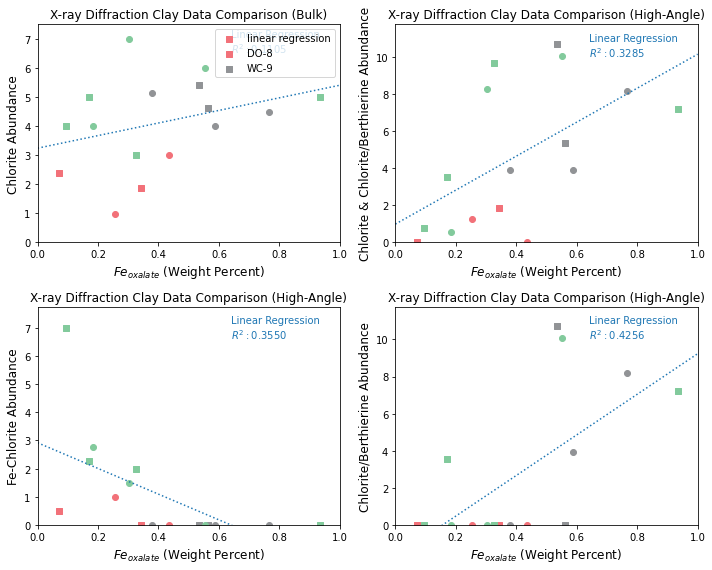

In [19]:
plt.figure(figsize=(10,8))

plt.subplot(221)
for n in DO8_Data.index:
    plt.scatter(DO8_Data['Iron Speciation Data','Fe-mag(wt%)'][n],DO8_Data['Bulk','Chlorite'][n],  c=DO8_Data['color'][n],marker = 's')
for n in WC9_Data.index:
    plt.scatter(WC9_Data['Iron Speciation Data','Fe-mag(wt%)'][n],WC9_Data['Bulk','Chlorite'][n], c=WC9_Data['color'][n],marker = 'o')
plt.plot(x1,y1,linestyle= 'dotted',color = 'tab:blue')
plt.text(0.64, 6.5, 'Linear Regression \n$R^{2}: %1.4f$' % r_value1**2, color = 'tab:blue')
plt.xlabel('$Fe_{oxalate}$ (Weight Percent)', fontsize = 'large')
plt.ylabel('Chlorite Abundance', fontsize = 'large')
plt.title('X-ray Diffraction Clay Data Comparison (Bulk)', fontsize = 'large')
plt.legend(['linear regression', 'DO-8', 'WC-9'])
plt.ylim(0,7.5)
plt.xlim(0,1)

plt.subplot(222)
for n in DO8_Data.index:
    plt.scatter(DO8_Data['Iron Speciation Data','Fe-mag(wt%)'][n],DO8_Data['ClayMin%','Chlorite'][n]+DO8_Data['ClayMin%','Chlorite/Berthierine?'][n],  c=DO8_Data['color'][n],marker = 's')
for n in WC9_Data.index:
    plt.scatter(WC9_Data['Iron Speciation Data','Fe-mag(wt%)'][n],WC9_Data['ClayMin%','Chlorite'][n]+WC9_Data['ClayMin%','Chlorite/Berthierine?'][n], c=WC9_Data['color'][n],marker = 'o')
plt.plot(x5,y5,linestyle= 'dotted',color = 'tab:blue')
plt.text(0.64, 10, 'Linear Regression \n$R^{2}: %1.4f$' % r_value5**2, color = 'tab:blue')
plt.xlabel('$Fe_{oxalate}$ (Weight Percent)', fontsize = 'large')
plt.ylabel('Chlorite & Chlorite/Berthierine Abundance', fontsize = 'large')
plt.title('X-ray Diffraction Clay Data Comparison (High-Angle)', fontsize = 'large')
plt.ylim(0,11.75)
plt.xlim(0,1)

plt.subplot(223)
for n in DO8_Data.index:
    plt.scatter(DO8_Data['Iron Speciation Data','Fe-mag(wt%)'][n],DO8_Data['ClayMin%','Fe-chlorite (1.572)'][n],  c=DO8_Data['color'][n],marker = 's')
for n in WC9_Data.index:
    plt.scatter(WC9_Data['Iron Speciation Data','Fe-mag(wt%)'][n],WC9_Data['ClayMin%','Fe-chlorite (1.572)'][n], c=WC9_Data['color'][n],marker = 'o')
plt.plot(x7,y7,linestyle= 'dotted',color = 'tab:blue')
plt.text(0.64, 6.6, 'Linear Regression \n$R^{2}: %1.4f$' % r_value7**2, color = 'tab:blue')
plt.xlabel('$Fe_{oxalate}$ (Weight Percent)', fontsize = 'large')
plt.ylabel('Fe-Chlorite Abundance', fontsize = 'large')
plt.title('X-ray Diffraction Clay Data Comparison (High-Angle)', fontsize = 'large')
plt.ylim(0,7.75)
plt.xlim(0,1)

plt.subplot(224)
for n in DO8_Data.index:
    plt.scatter(DO8_Data['Iron Speciation Data','Fe-mag(wt%)'][n],DO8_Data['ClayMin%','Chlorite/Berthierine?'][n],  c=DO8_Data['color'][n],marker = 's')
for n in WC9_Data.index:
    plt.scatter(WC9_Data['Iron Speciation Data','Fe-mag(wt%)'][n],WC9_Data['ClayMin%','Chlorite/Berthierine?'][n], c=WC9_Data['color'][n],marker = 'o')
plt.plot(x10,y10,linestyle= 'dotted',color = 'tab:blue')
plt.text(0.64, 10, 'Linear Regression \n$R^{2}: %1.4f$' % r_value10**2, color = 'tab:blue')
plt.xlabel('$Fe_{oxalate}$ (Weight Percent)', fontsize = 'large')
plt.ylabel('Chlorite/Berthierine Abundance', fontsize = 'large')
plt.title('X-ray Diffraction Clay Data Comparison (High-Angle)', fontsize = 'large')
plt.ylim(0,11.75)
plt.xlim(0,1)

plt.tight_layout()
plt.savefig('code_output/XRD_Clay_IS_CompCrossplots_sel.pdf')
plt.show()

# Stratigraphic Plots

In [20]:
PC1_Data = DataComp[DataComp['Core','Core'] == 'PC-1']
PC1_Data.reset_index(drop=True,inplace=True)
PRF18_Data = DataComp[DataComp['Core','Core'] == 'PRF18-']
PRF18_Data.reset_index(drop=True,inplace=True)

First let's do chlorite (bulk)

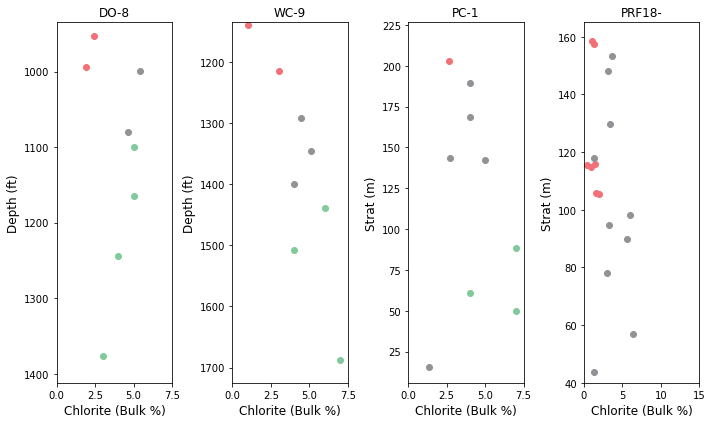

In [21]:
plt.figure(figsize=(10,6))

plt.subplot(141)
for n in DO8_Data.index:
    plt.scatter(DO8_Data['Bulk','Chlorite'][n],DO8_Data['Depth (ft)','Depth (ft)'][n],  c=DO8_Data['color'][n],marker = 'o')
plt.xlabel('Chlorite (Bulk %)', fontsize = 'large')
plt.ylabel('Depth (ft)', fontsize = 'large')
plt.title('DO-8', fontsize = 'large')
plt.ylim(1412,935)
plt.xlim(0,7.5)

plt.subplot(142)
for n in WC9_Data.index:
    plt.scatter(WC9_Data['Bulk','Chlorite'][n], WC9_Data['Depth (ft)','Depth (ft)'][n], c=WC9_Data['color'][n],marker = 'o')
plt.xlabel('Chlorite (Bulk %)', fontsize = 'large')
plt.ylabel('Depth (ft)', fontsize = 'large')
plt.title('WC-9', fontsize = 'large')
plt.ylim(1725,1135)
plt.xlim(0,7.5)

plt.subplot(143)
for n in PC1_Data.index:
    plt.scatter(PC1_Data['Bulk','Chlorite'][n], PC1_Data['Strat (m)','Strat (m)'][n], c=PC1_Data['color'][n],marker = 'o')
plt.xlabel('Chlorite (Bulk %)', fontsize = 'large')
plt.ylabel('Strat (m)', fontsize = 'large')
plt.title('PC-1', fontsize = 'large')
plt.ylim(5.91312,226.55784)
plt.xlim(0,7.5)

plt.subplot(144)
for n in PRF18_Data.index:
    plt.scatter(PRF18_Data['Bulk','Chlorite'][n], PRF18_Data['Strat (m)','Strat (m)'][n], c=PRF18_Data['color'][n],marker = 'o')
plt.xlabel('Chlorite (Bulk %)', fontsize = 'large')
plt.ylabel('Strat (m)', fontsize = 'large')
plt.title('PRF18-', fontsize = 'large')
plt.ylim(40,165)
plt.xlim(0,15)

plt.tight_layout()
#plt.savefig('code_output/XRD_Clay_IS_CompCrossplot_all.pdf')
plt.show()

Now let's do chlorite (claypeel)

In [22]:
PRF18_DataNAN = Data[Data['Core','Core'] == 'PRF18-']
PRF18_DataNAN.reset_index(drop=True,inplace=True)

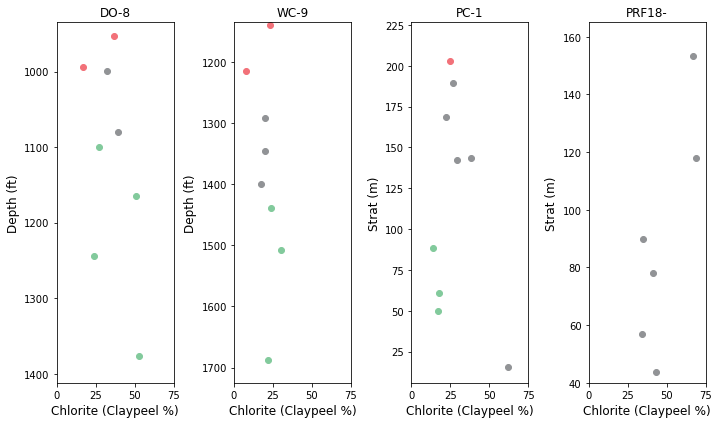

In [23]:
plt.figure(figsize=(10,6))

plt.subplot(141)
for n in DO8_Data.index:
    plt.scatter(DO8_Data['claypeel','Chlorite'][n],DO8_Data['Depth (ft)','Depth (ft)'][n],  c=DO8_Data['color'][n],marker = 'o')
plt.xlabel('Chlorite (Claypeel %)', fontsize = 'large')
plt.ylabel('Depth (ft)', fontsize = 'large')
plt.title('DO-8', fontsize = 'large')
plt.ylim(1412,935)
plt.xlim(0,75)

plt.subplot(142)
for n in WC9_Data.index:
    plt.scatter(WC9_Data['claypeel','Chlorite'][n], WC9_Data['Depth (ft)','Depth (ft)'][n], c=WC9_Data['color'][n],marker = 'o')
plt.xlabel('Chlorite (Claypeel %)', fontsize = 'large')
plt.ylabel('Depth (ft)', fontsize = 'large')
plt.title('WC-9', fontsize = 'large')
plt.ylim(1725,1135)
plt.xlim(0,75)

plt.subplot(143)
for n in PC1_Data.index:
    plt.scatter(PC1_Data['claypeel','Chlorite'][n], PC1_Data['Strat (m)','Strat (m)'][n], c=PC1_Data['color'][n],marker = 'o')
plt.xlabel('Chlorite (Claypeel %)', fontsize = 'large')
plt.ylabel('Strat (m)', fontsize = 'large')
plt.title('PC-1', fontsize = 'large')
plt.ylim(5.91312,226.55784)
plt.xlim(0,75)

plt.subplot(144)
for n in PRF18_Data.index:
    plt.scatter(PRF18_DataNAN['claypeel','Chlorite'][n], PRF18_DataNAN['Strat (m)','Strat (m)'][n], c=PRF18_DataNAN['color'][n],marker = 'o')
plt.xlabel('Chlorite (Claypeel %)', fontsize = 'large')
plt.ylabel('Strat (m)', fontsize = 'large')
plt.title('PRF18-', fontsize = 'large')
plt.ylim(40,165)
plt.xlim(0,75)

plt.tight_layout()
#plt.savefig('code_output/XRD_Clay_IS_CompCrossplot_all.pdf')
plt.show()

Now let's do chlorite (high-angle)

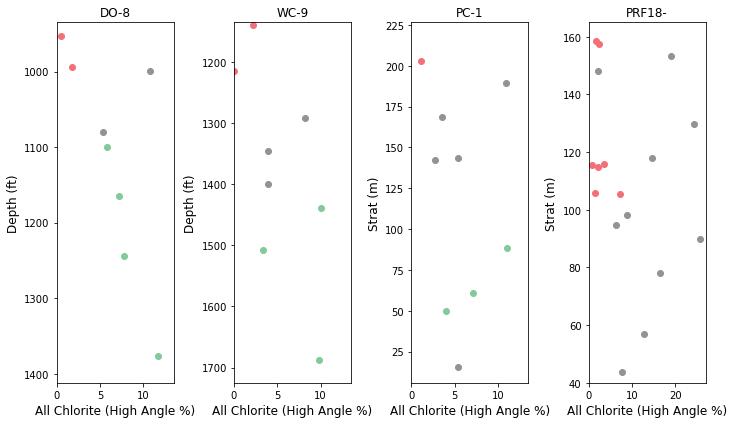

In [24]:
plt.figure(figsize=(10,6))

plt.subplot(141)
for n in DO8_Data.index:
    plt.scatter(DO8_Data['ClayMin%','Fe-chlorite (1.572)'][n]+DO8_Data['ClayMin%','Chlorite'][n]+DO8_Data['ClayMin%','Chlorite/Berthierine?'][n],DO8_Data['Depth (ft)','Depth (ft)'][n],  c=DO8_Data['color'][n],marker = 'o')
plt.xlabel('All Chlorite (High Angle %)', fontsize = 'large')
plt.ylabel('Depth (ft)', fontsize = 'large')
plt.title('DO-8', fontsize = 'large')
plt.ylim(1412,935)
plt.xlim(0,13.5)

plt.subplot(142)
for n in WC9_Data.index:
    plt.scatter(WC9_Data['ClayMin%','Fe-chlorite (1.572)'][n]+WC9_Data['ClayMin%','Chlorite'][n]+WC9_Data['ClayMin%','Chlorite/Berthierine?'][n], WC9_Data['Depth (ft)','Depth (ft)'][n], c=WC9_Data['color'][n],marker = 'o')
plt.xlabel('All Chlorite (High Angle %)', fontsize = 'large')
plt.ylabel('Depth (ft)', fontsize = 'large')
plt.title('WC-9', fontsize = 'large')
plt.ylim(1725,1135)
plt.xlim(0,13.5)

plt.subplot(143)
for n in PC1_Data.index:
    plt.scatter(PC1_Data['ClayMin%','Fe-chlorite (1.572)'][n]+PC1_Data['ClayMin%','Fe-chlorite (1.565)'][n]+PC1_Data['ClayMin%','Chlorite'][n]+PC1_Data['ClayMin%','Chlorite/Berthierine?'][n], PC1_Data['Strat (m)','Strat (m)'][n], c=PC1_Data['color'][n],marker = 'o')
plt.xlabel('All Chlorite (High Angle %)', fontsize = 'large')
plt.ylabel('Strat (m)', fontsize = 'large')
plt.title('PC-1', fontsize = 'large')
plt.ylim(5.91312,226.55784)
plt.xlim(0,13.5)

plt.subplot(144)
for n in PRF18_Data.index:
    plt.scatter(PRF18_Data['ClayMin%','Fe-chlorite (1.572)'][n]+PRF18_Data['ClayMin%','Chlorite'][n]+PRF18_Data['ClayMin%','Chlorite/Berthierine?'][n], PRF18_Data['Strat (m)','Strat (m)'][n], c=PRF18_Data['color'][n],marker = 'o')
plt.xlabel('All Chlorite (High Angle %)', fontsize = 'large')
plt.ylabel('Strat (m)', fontsize = 'large')
plt.title('PRF18-', fontsize = 'large')
plt.ylim(40,165)
plt.xlim(0,27)

plt.tight_layout()
#plt.savefig('code_output/XRD_Clay_IS_CompCrossplot_all.pdf')
plt.show()

# Plot Bar graphs

### Bulk Mineralogy

In [25]:
DO8_Data['Bulk'].columns

Index(['Quartz', 'K-feldspar', 'Plagioclase', 'Calcite', 'Hematite', 'Pyrite',
       'Muscovite', 'Illite/Smectite', 'Vermiculite', 'Laumontite',
       'Kaolinite', 'Chlorite', 'Clay Subtotal', 'Total'],
      dtype='object')

/var/folders/57/lmgz7h4x11v34k53c6ldrlrw0000gn/T/ipykernel_90690/2590701716.py:217: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


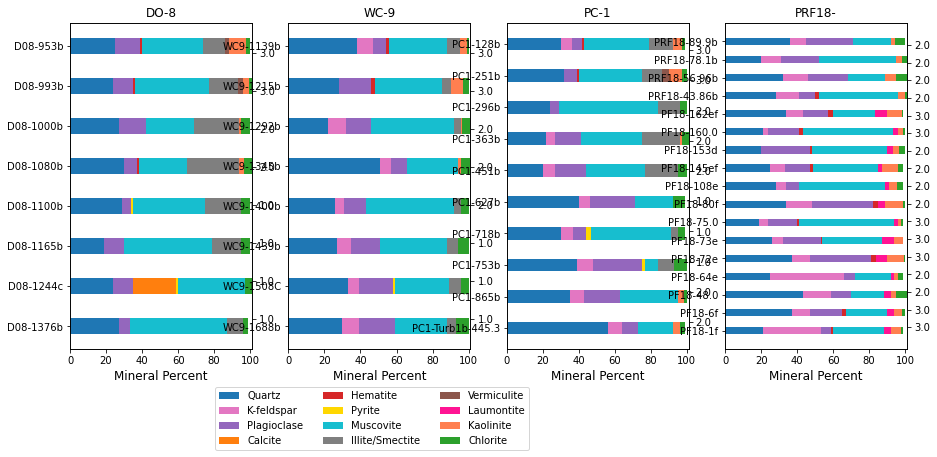

In [26]:
N_PC1 = 10 #create Indices, change based on number plotting
N_PRF = 17
N_WC9 = 8
N_DO8 = 8
ind1 = np.arange(N_DO8)
ind2 = np.arange(N_WC9)
ind3 = np.arange(N_PC1) # the x locations for the groups
ind4 = np.arange(N_PRF) # the x locations for the groups
height = 0.4 #change height of bar, .8 is default

plt.figure(figsize=(15,6))

ax1 = plt.subplot(141)
p1 = plt.barh(ind1, DO8_Data['Bulk','Quartz'], height, color='tab:blue')
p2 = plt.barh(ind1, DO8_Data['Bulk','K-feldspar'], height,left = DO8_Data['Bulk','Quartz'], color='tab:pink')
p3 = plt.barh(ind1, DO8_Data['Bulk','Plagioclase'], height,left = [DO8_Data['Bulk','Quartz'][j] + DO8_Data['Bulk','K-feldspar'][j] for j in range(len(DO8_Data['Bulk','Quartz']))], color='tab:purple')
p4 = plt.barh(ind1, DO8_Data['Bulk','Calcite'], height,left = 
              [DO8_Data['Bulk','Quartz'][j] + DO8_Data['Bulk','K-feldspar'][j] + DO8_Data['Bulk','Plagioclase'][j] for j in range(len(DO8_Data['Bulk','Quartz']))], color='tab:orange')
p5 = plt.barh(ind1, DO8_Data['Bulk','Hematite'], height,left = 
              [DO8_Data['Bulk','Quartz'][j] + DO8_Data['Bulk','K-feldspar'][j] + DO8_Data['Bulk','Plagioclase'][j] + 
               DO8_Data['Bulk','Calcite'][j] for j in range(len(DO8_Data['Bulk','Quartz']))], color='tab:red')
p6 = plt.barh(ind1, DO8_Data['Bulk','Pyrite'], height,left = 
              [DO8_Data['Bulk','Quartz'][j] + DO8_Data['Bulk','K-feldspar'][j] + DO8_Data['Bulk','Plagioclase'][j] 
               + DO8_Data['Bulk','Calcite'][j] +DO8_Data['Bulk','Hematite'][j] for j in range(len(DO8_Data['Bulk','Quartz']))], color='gold')
p7 = plt.barh(ind1, DO8_Data['Bulk','Muscovite'], height,left = 
              [DO8_Data['Bulk','Quartz'][j] + DO8_Data['Bulk','K-feldspar'][j] + DO8_Data['Bulk','Plagioclase'][j] 
               + DO8_Data['Bulk','Calcite'][j] +DO8_Data['Bulk','Hematite'][j]+DO8_Data['Bulk','Pyrite'][j] 
               for j in range(len(DO8_Data['Bulk','Quartz']))], color='tab:cyan')
p8 = plt.barh(ind1, DO8_Data['Bulk','Illite/Smectite'], height,left = 
              [DO8_Data['Bulk','Quartz'][j] + DO8_Data['Bulk','K-feldspar'][j] + DO8_Data['Bulk','Plagioclase'][j] 
               + DO8_Data['Bulk','Calcite'][j] +DO8_Data['Bulk','Hematite'][j]+DO8_Data['Bulk','Pyrite'][j]+
               DO8_Data['Bulk','Muscovite'][j] for j in range(len(DO8_Data['Bulk','Quartz']))], color='tab:gray')
p9 = plt.barh(ind1, DO8_Data['Bulk','Vermiculite'], height,left = 
              [DO8_Data['Bulk','Quartz'][j] + DO8_Data['Bulk','K-feldspar'][j] + DO8_Data['Bulk','Plagioclase'][j] 
               + DO8_Data['Bulk','Calcite'][j] +DO8_Data['Bulk','Hematite'][j]+DO8_Data['Bulk','Pyrite'][j]+
               DO8_Data['Bulk','Muscovite'][j] + DO8_Data['Bulk','Illite/Smectite'][j] for j in range(len(DO8_Data['Bulk','Quartz']))], color='tab:brown')
p10 = plt.barh(ind1, DO8_Data['Bulk','Laumontite'], height,left = 
              [DO8_Data['Bulk','Quartz'][j] + DO8_Data['Bulk','K-feldspar'][j] + DO8_Data['Bulk','Plagioclase'][j] 
               + DO8_Data['Bulk','Calcite'][j] +DO8_Data['Bulk','Hematite'][j]+DO8_Data['Bulk','Pyrite'][j]+
               DO8_Data['Bulk','Muscovite'][j] + DO8_Data['Bulk','Illite/Smectite'][j] +DO8_Data['Bulk','Vermiculite'][j] 
               for j in range(len(DO8_Data['Bulk','Quartz']))], color='deeppink')
p11 = plt.barh(ind1, DO8_Data['Bulk','Kaolinite'], height,left = 
              [DO8_Data['Bulk','Quartz'][j] + DO8_Data['Bulk','K-feldspar'][j] + DO8_Data['Bulk','Plagioclase'][j] 
               + DO8_Data['Bulk','Calcite'][j] +DO8_Data['Bulk','Hematite'][j]+DO8_Data['Bulk','Pyrite'][j]+
               DO8_Data['Bulk','Muscovite'][j] + DO8_Data['Bulk','Illite/Smectite'][j]+DO8_Data['Bulk','Vermiculite'][j]
               +DO8_Data['Bulk','Laumontite'][j] for j in range(len(DO8_Data['Bulk','Quartz']))], color='coral')
p12 = plt.barh(ind1, DO8_Data['Bulk','Chlorite'], height,left = 
              [DO8_Data['Bulk','Quartz'][j] + DO8_Data['Bulk','K-feldspar'][j] + DO8_Data['Bulk','Plagioclase'][j] 
               + DO8_Data['Bulk','Calcite'][j] +DO8_Data['Bulk','Hematite'][j]+DO8_Data['Bulk','Pyrite'][j]+
               DO8_Data['Bulk','Muscovite'][j] + DO8_Data['Bulk','Illite/Smectite'][j]+DO8_Data['Bulk','Vermiculite'][j]+
               DO8_Data['Bulk','Laumontite'][j]+DO8_Data['Bulk','Kaolinite'][j] for j in range(len(DO8_Data['Bulk','Quartz']))], color='tab:green')
plt.xlabel('Mineral Percent', fontsize = 'large')
plt.title('DO-8')
plt.yticks(ind1, DO8_Data['Sample','Sample']) #tried coloring wouldn't work
plt.gca().invert_yaxis()
plt.xlim(0,101)
ax7 = ax1.twinx()
ax7.barh(ind1, DO8_Data['Bulk','Quartz'], color=[])
ax7.set_yticks(ind1)
ax7.set_yticklabels(DO8_Data['Facies','Facies']) #tried coloring wouldn't work)
plt.gca().invert_yaxis()

ax2 = plt.subplot(142)
p1 = plt.barh(ind2, WC9_Data['Bulk','Quartz'], height, color='tab:blue')
p2 = plt.barh(ind2, WC9_Data['Bulk','K-feldspar'], height,left = WC9_Data['Bulk','Quartz'], color='tab:pink')
p3 = plt.barh(ind2, WC9_Data['Bulk','Plagioclase'], height,left = [WC9_Data['Bulk','Quartz'][j] + WC9_Data['Bulk','K-feldspar'][j] for j in range(len(WC9_Data['Bulk','Quartz']))], color='tab:purple')
p4 = plt.barh(ind2, WC9_Data['Bulk','Calcite'], height,left = 
              [WC9_Data['Bulk','Quartz'][j] + WC9_Data['Bulk','K-feldspar'][j] + WC9_Data['Bulk','Plagioclase'][j] for j in range(len(WC9_Data['Bulk','Quartz']))], color='tab:orange')
p5 = plt.barh(ind2, WC9_Data['Bulk','Hematite'], height,left = 
              [WC9_Data['Bulk','Quartz'][j] + WC9_Data['Bulk','K-feldspar'][j] + WC9_Data['Bulk','Plagioclase'][j] + 
               WC9_Data['Bulk','Calcite'][j] for j in range(len(WC9_Data['Bulk','Quartz']))], color='tab:red')
p6 = plt.barh(ind2, WC9_Data['Bulk','Pyrite'], height,left = 
              [WC9_Data['Bulk','Quartz'][j] + WC9_Data['Bulk','K-feldspar'][j] + WC9_Data['Bulk','Plagioclase'][j] 
               + WC9_Data['Bulk','Calcite'][j] +WC9_Data['Bulk','Hematite'][j] for j in range(len(WC9_Data['Bulk','Quartz']))], color='gold')
p7 = plt.barh(ind2, WC9_Data['Bulk','Muscovite'], height,left = 
              [WC9_Data['Bulk','Quartz'][j] + WC9_Data['Bulk','K-feldspar'][j] + WC9_Data['Bulk','Plagioclase'][j] 
               + WC9_Data['Bulk','Calcite'][j] +WC9_Data['Bulk','Hematite'][j]+WC9_Data['Bulk','Pyrite'][j] 
               for j in range(len(WC9_Data['Bulk','Quartz']))], color='tab:cyan')
p8 = plt.barh(ind2, WC9_Data['Bulk','Illite/Smectite'], height,left = 
              [WC9_Data['Bulk','Quartz'][j] + WC9_Data['Bulk','K-feldspar'][j] + WC9_Data['Bulk','Plagioclase'][j] 
               + WC9_Data['Bulk','Calcite'][j] +WC9_Data['Bulk','Hematite'][j]+WC9_Data['Bulk','Pyrite'][j]+
               WC9_Data['Bulk','Muscovite'][j] for j in range(len(WC9_Data['Bulk','Quartz']))], color='tab:gray')
p9 = plt.barh(ind2, WC9_Data['Bulk','Vermiculite'], height,left = 
              [WC9_Data['Bulk','Quartz'][j] + WC9_Data['Bulk','K-feldspar'][j] + WC9_Data['Bulk','Plagioclase'][j] 
               + WC9_Data['Bulk','Calcite'][j] +WC9_Data['Bulk','Hematite'][j]+WC9_Data['Bulk','Pyrite'][j]+
               WC9_Data['Bulk','Muscovite'][j] + WC9_Data['Bulk','Illite/Smectite'][j] for j in range(len(WC9_Data['Bulk','Quartz']))], color='tab:brown')
p10 = plt.barh(ind2, WC9_Data['Bulk','Laumontite'], height,left = 
              [WC9_Data['Bulk','Quartz'][j] + WC9_Data['Bulk','K-feldspar'][j] + WC9_Data['Bulk','Plagioclase'][j] 
               + WC9_Data['Bulk','Calcite'][j] +WC9_Data['Bulk','Hematite'][j]+WC9_Data['Bulk','Pyrite'][j]+
               WC9_Data['Bulk','Muscovite'][j] + WC9_Data['Bulk','Illite/Smectite'][j] +WC9_Data['Bulk','Vermiculite'][j] 
               for j in range(len(WC9_Data['Bulk','Quartz']))], color='deeppink')
p11 = plt.barh(ind2, WC9_Data['Bulk','Kaolinite'], height,left = 
              [WC9_Data['Bulk','Quartz'][j] + WC9_Data['Bulk','K-feldspar'][j] + WC9_Data['Bulk','Plagioclase'][j] 
               + WC9_Data['Bulk','Calcite'][j] +WC9_Data['Bulk','Hematite'][j]+WC9_Data['Bulk','Pyrite'][j]+
               WC9_Data['Bulk','Muscovite'][j] + WC9_Data['Bulk','Illite/Smectite'][j]+WC9_Data['Bulk','Vermiculite'][j]
               +WC9_Data['Bulk','Laumontite'][j] for j in range(len(WC9_Data['Bulk','Quartz']))], color='coral')
p12 = plt.barh(ind2, WC9_Data['Bulk','Chlorite'], height,left = 
              [WC9_Data['Bulk','Quartz'][j] + WC9_Data['Bulk','K-feldspar'][j] + WC9_Data['Bulk','Plagioclase'][j] 
               + WC9_Data['Bulk','Calcite'][j] +WC9_Data['Bulk','Hematite'][j]+WC9_Data['Bulk','Pyrite'][j]+
               WC9_Data['Bulk','Muscovite'][j] + WC9_Data['Bulk','Illite/Smectite'][j]+WC9_Data['Bulk','Vermiculite'][j]+
               WC9_Data['Bulk','Laumontite'][j]+WC9_Data['Bulk','Kaolinite'][j] for j in range(len(WC9_Data['Bulk','Quartz']))], color='tab:green')
plt.xlabel('Mineral Percent', fontsize = 'large')
plt.title('WC-9')
plt.yticks(ind2, WC9_Data['Sample','Sample']) #tried coloring wouldn't work
plt.gca().invert_yaxis()
plt.xlim(0,101)
ax5 = ax2.twinx()
ax5.barh(ind2, WC9_Data['Bulk','Quartz'], color=[])
ax5.set_yticks(ind2)
ax5.set_yticklabels(WC9_Data['Facies','Facies']) #tried coloring wouldn't work)
plt.gca().invert_yaxis()

ax3 = plt.subplot(143)
p1 = plt.barh(ind3, PC1_Data['Bulk','Quartz'], height, color='tab:blue')
p2 = plt.barh(ind3, PC1_Data['Bulk','K-feldspar'], height,left = PC1_Data['Bulk','Quartz'], color='tab:pink')
p3 = plt.barh(ind3, PC1_Data['Bulk','Plagioclase'], height,left = [PC1_Data['Bulk','Quartz'][j] + PC1_Data['Bulk','K-feldspar'][j] for j in range(len(PC1_Data['Bulk','Quartz']))], color='tab:purple')
p4 = plt.barh(ind3, PC1_Data['Bulk','Calcite'], height,left = 
              [PC1_Data['Bulk','Quartz'][j] + PC1_Data['Bulk','K-feldspar'][j] + PC1_Data['Bulk','Plagioclase'][j] for j in range(len(PC1_Data['Bulk','Quartz']))], color='tab:orange')
p5 = plt.barh(ind3, PC1_Data['Bulk','Hematite'], height,left = 
              [PC1_Data['Bulk','Quartz'][j] + PC1_Data['Bulk','K-feldspar'][j] + PC1_Data['Bulk','Plagioclase'][j] + 
               PC1_Data['Bulk','Calcite'][j] for j in range(len(PC1_Data['Bulk','Quartz']))], color='tab:red')
p6 = plt.barh(ind3, PC1_Data['Bulk','Pyrite'], height,left = 
              [PC1_Data['Bulk','Quartz'][j] + PC1_Data['Bulk','K-feldspar'][j] + PC1_Data['Bulk','Plagioclase'][j] 
               + PC1_Data['Bulk','Calcite'][j] +PC1_Data['Bulk','Hematite'][j] for j in range(len(PC1_Data['Bulk','Quartz']))], color='gold')
p7 = plt.barh(ind3, PC1_Data['Bulk','Muscovite'], height,left = 
              [PC1_Data['Bulk','Quartz'][j] + PC1_Data['Bulk','K-feldspar'][j] + PC1_Data['Bulk','Plagioclase'][j] 
               + PC1_Data['Bulk','Calcite'][j] +PC1_Data['Bulk','Hematite'][j]+PC1_Data['Bulk','Pyrite'][j] 
               for j in range(len(PC1_Data['Bulk','Quartz']))], color='tab:cyan')
p8 = plt.barh(ind3, PC1_Data['Bulk','Illite/Smectite'], height,left = 
              [PC1_Data['Bulk','Quartz'][j] + PC1_Data['Bulk','K-feldspar'][j] + PC1_Data['Bulk','Plagioclase'][j] 
               + PC1_Data['Bulk','Calcite'][j] +PC1_Data['Bulk','Hematite'][j]+PC1_Data['Bulk','Pyrite'][j]+
               PC1_Data['Bulk','Muscovite'][j] for j in range(len(PC1_Data['Bulk','Quartz']))], color='tab:gray')
p9 = plt.barh(ind3, PC1_Data['Bulk','Vermiculite'], height,left = 
              [PC1_Data['Bulk','Quartz'][j] + PC1_Data['Bulk','K-feldspar'][j] + PC1_Data['Bulk','Plagioclase'][j] 
               + PC1_Data['Bulk','Calcite'][j] +PC1_Data['Bulk','Hematite'][j]+PC1_Data['Bulk','Pyrite'][j]+
               PC1_Data['Bulk','Muscovite'][j] + PC1_Data['Bulk','Illite/Smectite'][j] for j in range(len(PC1_Data['Bulk','Quartz']))], color='tab:brown')
p10 = plt.barh(ind3, PC1_Data['Bulk','Laumontite'], height,left = 
              [PC1_Data['Bulk','Quartz'][j] + PC1_Data['Bulk','K-feldspar'][j] + PC1_Data['Bulk','Plagioclase'][j] 
               + PC1_Data['Bulk','Calcite'][j] +PC1_Data['Bulk','Hematite'][j]+PC1_Data['Bulk','Pyrite'][j]+
               PC1_Data['Bulk','Muscovite'][j] + PC1_Data['Bulk','Illite/Smectite'][j] +PC1_Data['Bulk','Vermiculite'][j] 
               for j in range(len(PC1_Data['Bulk','Quartz']))], color='deeppink')
p11 = plt.barh(ind3, PC1_Data['Bulk','Kaolinite'], height,left = 
              [PC1_Data['Bulk','Quartz'][j] + PC1_Data['Bulk','K-feldspar'][j] + PC1_Data['Bulk','Plagioclase'][j] 
               + PC1_Data['Bulk','Calcite'][j] +PC1_Data['Bulk','Hematite'][j]+PC1_Data['Bulk','Pyrite'][j]+
               PC1_Data['Bulk','Muscovite'][j] + PC1_Data['Bulk','Illite/Smectite'][j]+PC1_Data['Bulk','Vermiculite'][j]
               +PC1_Data['Bulk','Laumontite'][j] for j in range(len(PC1_Data['Bulk','Quartz']))], color='coral')
p12 = plt.barh(ind3, PC1_Data['Bulk','Chlorite'], height,left = 
              [PC1_Data['Bulk','Quartz'][j] + PC1_Data['Bulk','K-feldspar'][j] + PC1_Data['Bulk','Plagioclase'][j] 
               + PC1_Data['Bulk','Calcite'][j] +PC1_Data['Bulk','Hematite'][j]+PC1_Data['Bulk','Pyrite'][j]+
               PC1_Data['Bulk','Muscovite'][j] + PC1_Data['Bulk','Illite/Smectite'][j]+PC1_Data['Bulk','Vermiculite'][j]+
               PC1_Data['Bulk','Laumontite'][j]+PC1_Data['Bulk','Kaolinite'][j] for j in range(len(PC1_Data['Bulk','Quartz']))], color='tab:green')
plt.xlabel('Mineral Percent', fontsize = 'large')
plt.title('PC-1')
plt.yticks(ind3, PC1_Data['Sample','Sample']) #tried coloring wouldn't work
plt.gca().invert_yaxis()
plt.xlim(0,101)
ax6 = ax3.twinx()
ax6.barh(ind3, PC1_Data['Bulk','Quartz'], color=[])
ax6.set_yticks(ind3)
ax6.set_yticklabels(PC1_Data['Facies','Facies']) #tried coloring wouldn't work)
plt.gca().invert_yaxis()

ax4 = plt.subplot(144)
p1 = plt.barh(ind4, PRF18_Data['Bulk','Quartz'], height, color='tab:blue')
p2 = plt.barh(ind4, PRF18_Data['Bulk','K-feldspar'], height,left = PRF18_Data['Bulk','Quartz'], color='tab:pink')
p3 = plt.barh(ind4, PRF18_Data['Bulk','Plagioclase'], height,left = [PRF18_Data['Bulk','Quartz'][j] + PRF18_Data['Bulk','K-feldspar'][j] for j in range(len(PRF18_Data['Bulk','Quartz']))], color='tab:purple')
p4 = plt.barh(ind4, PRF18_Data['Bulk','Calcite'], height,left = 
              [PRF18_Data['Bulk','Quartz'][j] + PRF18_Data['Bulk','K-feldspar'][j] + PRF18_Data['Bulk','Plagioclase'][j] for j in range(len(PRF18_Data['Bulk','Quartz']))], color='tab:orange')
p5 = plt.barh(ind4, PRF18_Data['Bulk','Hematite'], height,left = 
              [PRF18_Data['Bulk','Quartz'][j] + PRF18_Data['Bulk','K-feldspar'][j] + PRF18_Data['Bulk','Plagioclase'][j] + 
               PRF18_Data['Bulk','Calcite'][j] for j in range(len(PRF18_Data['Bulk','Quartz']))], color='tab:red')
p6 = plt.barh(ind4, PRF18_Data['Bulk','Pyrite'], height,left = 
              [PRF18_Data['Bulk','Quartz'][j] + PRF18_Data['Bulk','K-feldspar'][j] + PRF18_Data['Bulk','Plagioclase'][j] 
               + PRF18_Data['Bulk','Calcite'][j] +PRF18_Data['Bulk','Hematite'][j] for j in range(len(PRF18_Data['Bulk','Quartz']))], color='gold')
p7 = plt.barh(ind4, PRF18_Data['Bulk','Muscovite'], height,left = 
              [PRF18_Data['Bulk','Quartz'][j] + PRF18_Data['Bulk','K-feldspar'][j] + PRF18_Data['Bulk','Plagioclase'][j] 
               + PRF18_Data['Bulk','Calcite'][j] +PRF18_Data['Bulk','Hematite'][j]+PRF18_Data['Bulk','Pyrite'][j] 
               for j in range(len(PRF18_Data['Bulk','Quartz']))], color='tab:cyan')
p8 = plt.barh(ind4, PRF18_Data['Bulk','Illite/Smectite'], height,left = 
              [PRF18_Data['Bulk','Quartz'][j] + PRF18_Data['Bulk','K-feldspar'][j] + PRF18_Data['Bulk','Plagioclase'][j] 
               + PRF18_Data['Bulk','Calcite'][j] +PRF18_Data['Bulk','Hematite'][j]+PRF18_Data['Bulk','Pyrite'][j]+
               PRF18_Data['Bulk','Muscovite'][j] for j in range(len(PRF18_Data['Bulk','Quartz']))], color='tab:gray')
p9 = plt.barh(ind4, PRF18_Data['Bulk','Vermiculite'], height,left = 
              [PRF18_Data['Bulk','Quartz'][j] + PRF18_Data['Bulk','K-feldspar'][j] + PRF18_Data['Bulk','Plagioclase'][j] 
               + PRF18_Data['Bulk','Calcite'][j] +PRF18_Data['Bulk','Hematite'][j]+PRF18_Data['Bulk','Pyrite'][j]+
               PRF18_Data['Bulk','Muscovite'][j] + PRF18_Data['Bulk','Illite/Smectite'][j] for j in range(len(PRF18_Data['Bulk','Quartz']))], color='tab:brown')
p10 = plt.barh(ind4, PRF18_Data['Bulk','Laumontite'], height,left = 
              [PRF18_Data['Bulk','Quartz'][j] + PRF18_Data['Bulk','K-feldspar'][j] + PRF18_Data['Bulk','Plagioclase'][j] 
               + PRF18_Data['Bulk','Calcite'][j] +PRF18_Data['Bulk','Hematite'][j]+PRF18_Data['Bulk','Pyrite'][j]+
               PRF18_Data['Bulk','Muscovite'][j] + PRF18_Data['Bulk','Illite/Smectite'][j] +PRF18_Data['Bulk','Vermiculite'][j] 
               for j in range(len(PRF18_Data['Bulk','Quartz']))], color='deeppink')
p11 = plt.barh(ind4, PRF18_Data['Bulk','Kaolinite'], height,left = 
              [PRF18_Data['Bulk','Quartz'][j] + PRF18_Data['Bulk','K-feldspar'][j] + PRF18_Data['Bulk','Plagioclase'][j] 
               + PRF18_Data['Bulk','Calcite'][j] +PRF18_Data['Bulk','Hematite'][j]+PRF18_Data['Bulk','Pyrite'][j]+
               PRF18_Data['Bulk','Muscovite'][j] + PRF18_Data['Bulk','Illite/Smectite'][j]+PRF18_Data['Bulk','Vermiculite'][j]
               +PRF18_Data['Bulk','Laumontite'][j] for j in range(len(PRF18_Data['Bulk','Quartz']))], color='coral')
p12 = plt.barh(ind4, PRF18_Data['Bulk','Chlorite'], height,left = 
              [PRF18_Data['Bulk','Quartz'][j] + PRF18_Data['Bulk','K-feldspar'][j] + PRF18_Data['Bulk','Plagioclase'][j] 
               + PRF18_Data['Bulk','Calcite'][j] +PRF18_Data['Bulk','Hematite'][j]+PRF18_Data['Bulk','Pyrite'][j]+
               PRF18_Data['Bulk','Muscovite'][j] + PRF18_Data['Bulk','Illite/Smectite'][j]+PRF18_Data['Bulk','Vermiculite'][j]+
               PRF18_Data['Bulk','Laumontite'][j]+PRF18_Data['Bulk','Kaolinite'][j] for j in range(len(PRF18_Data['Bulk','Quartz']))], color='tab:green')
plt.xlabel('Mineral Percent', fontsize = 'large')
plt.title('PRF18-')
plt.yticks(ind4, PRF18_Data['Sample','Sample']) #tried coloring wouldn't work
plt.xlim(0,101)
#plt.gca().invert_yaxis() #commenting out for version 2
#Add facies calls
ax8 = ax4.twinx()
ax8.barh(ind4, PRF18_Data['Bulk','Quartz'], color=[])
ax8.set_yticks(ind4)
ax8.set_yticklabels(PRF18_Data['Facies','Facies']) #tried coloring wouldn't work)
#plt.gca().invert_yaxis() #commenting out for version 2

plt.legend((p1[0], p2[0], p3[0],p4[0],p5[0], p6[0], p7[0], p8[0], p9[0],p10[0],p11[0],p12[0]), DO8_Data['Bulk'].columns, bbox_to_anchor=(-1.05, -0.1),ncol=3)


plt.tight_layout()
# plt.savefig('code_output/XRDBulkAnalysis_Comp.svg')
plt.savefig('code_output/XRDBulkAnalysis_Comp_v2.pdf')
plt.show()

Observations: In bulk analyses, Vermiculite and Kaolinite are more common in Facies 3.  Pyrite and Hematite are mostly seen in Facies 1 and 3 respectively, but Potato River falls has hematite in Facies 2.

## Bulk Mineralogy by Depth (but all scaled same)

/var/folders/57/lmgz7h4x11v34k53c6ldrlrw0000gn/T/ipykernel_90690/4113891862.py:229: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


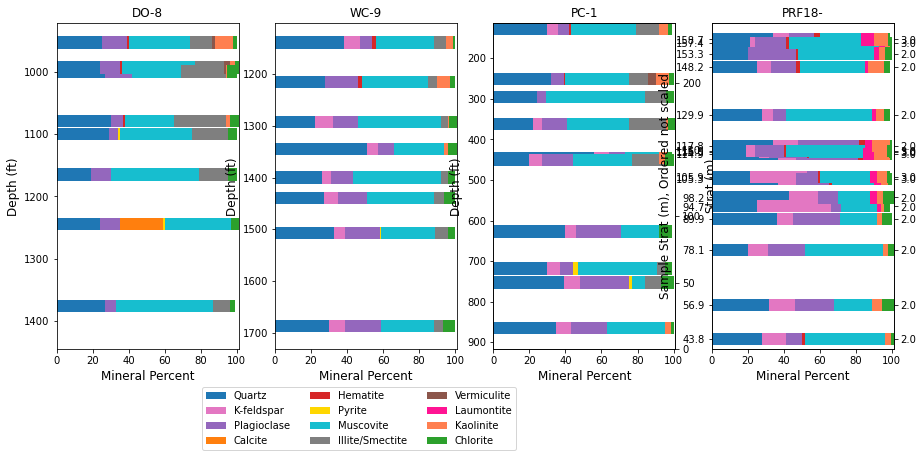

In [27]:
N_PC1 = 10 #create Indices, change based on number plotting
N_PRF = 17
N_WC9 = 8
N_DO8 = 8
ind1 = np.arange(N_DO8)
ind2 = np.arange(N_WC9)
ind3 = np.arange(N_PC1) # the x locations for the groups
ind4 = np.arange(N_PRF) # the x locations for the groups

height = 30 #change height of bar, .8 is default, for PC-1
height1 = 30/(245/0.3048)*(1445-922.08720904304437) #for DO-8
height2 = 30/(245/0.3048)*(1732-1101.1402872518622) #for WC-9
height3 = 30/ (245/0.3048)*(165-40)#for PF18-

plt.figure(figsize=(15,6))

ax1 = plt.subplot(141)
p1 = plt.barh(DO8_Data['Depth (ft)', 'Depth (ft)'], DO8_Data['Bulk','Quartz'], height1, color='tab:blue')
p2 = plt.barh(DO8_Data['Depth (ft)', 'Depth (ft)'], DO8_Data['Bulk','K-feldspar'], height1,left = DO8_Data['Bulk','Quartz'], color='tab:pink')
p3 = plt.barh(DO8_Data['Depth (ft)', 'Depth (ft)'], DO8_Data['Bulk','Plagioclase'], height1,left = [DO8_Data['Bulk','Quartz'][j] + DO8_Data['Bulk','K-feldspar'][j] for j in range(len(DO8_Data['Bulk','Quartz']))], color='tab:purple')
p4 = plt.barh(DO8_Data['Depth (ft)', 'Depth (ft)'], DO8_Data['Bulk','Calcite'], height1,left = 
              [DO8_Data['Bulk','Quartz'][j] + DO8_Data['Bulk','K-feldspar'][j] + DO8_Data['Bulk','Plagioclase'][j] for j in range(len(DO8_Data['Bulk','Quartz']))], color='tab:orange')
p5 = plt.barh(DO8_Data['Depth (ft)', 'Depth (ft)'], DO8_Data['Bulk','Hematite'], height1,left = 
              [DO8_Data['Bulk','Quartz'][j] + DO8_Data['Bulk','K-feldspar'][j] + DO8_Data['Bulk','Plagioclase'][j] + 
               DO8_Data['Bulk','Calcite'][j] for j in range(len(DO8_Data['Bulk','Quartz']))], color='tab:red')
p6 = plt.barh(DO8_Data['Depth (ft)', 'Depth (ft)'], DO8_Data['Bulk','Pyrite'], height1,left = 
              [DO8_Data['Bulk','Quartz'][j] + DO8_Data['Bulk','K-feldspar'][j] + DO8_Data['Bulk','Plagioclase'][j] 
               + DO8_Data['Bulk','Calcite'][j] +DO8_Data['Bulk','Hematite'][j] for j in range(len(DO8_Data['Bulk','Quartz']))], color='gold')
p7 = plt.barh(DO8_Data['Depth (ft)', 'Depth (ft)'], DO8_Data['Bulk','Muscovite'], height1,left = 
              [DO8_Data['Bulk','Quartz'][j] + DO8_Data['Bulk','K-feldspar'][j] + DO8_Data['Bulk','Plagioclase'][j] 
               + DO8_Data['Bulk','Calcite'][j] +DO8_Data['Bulk','Hematite'][j]+DO8_Data['Bulk','Pyrite'][j] 
               for j in range(len(DO8_Data['Bulk','Quartz']))], color='tab:cyan')
p8 = plt.barh(DO8_Data['Depth (ft)', 'Depth (ft)'], DO8_Data['Bulk','Illite/Smectite'], height1,left = 
              [DO8_Data['Bulk','Quartz'][j] + DO8_Data['Bulk','K-feldspar'][j] + DO8_Data['Bulk','Plagioclase'][j] 
               + DO8_Data['Bulk','Calcite'][j] +DO8_Data['Bulk','Hematite'][j]+DO8_Data['Bulk','Pyrite'][j]+
               DO8_Data['Bulk','Muscovite'][j] for j in range(len(DO8_Data['Bulk','Quartz']))], color='tab:gray')
p9 = plt.barh(DO8_Data['Depth (ft)', 'Depth (ft)'], DO8_Data['Bulk','Vermiculite'], height1,left = 
              [DO8_Data['Bulk','Quartz'][j] + DO8_Data['Bulk','K-feldspar'][j] + DO8_Data['Bulk','Plagioclase'][j] 
               + DO8_Data['Bulk','Calcite'][j] +DO8_Data['Bulk','Hematite'][j]+DO8_Data['Bulk','Pyrite'][j]+
               DO8_Data['Bulk','Muscovite'][j] + DO8_Data['Bulk','Illite/Smectite'][j] for j in range(len(DO8_Data['Bulk','Quartz']))], color='tab:brown')
p10 = plt.barh(DO8_Data['Depth (ft)', 'Depth (ft)'], DO8_Data['Bulk','Laumontite'], height1,left = 
              [DO8_Data['Bulk','Quartz'][j] + DO8_Data['Bulk','K-feldspar'][j] + DO8_Data['Bulk','Plagioclase'][j] 
               + DO8_Data['Bulk','Calcite'][j] +DO8_Data['Bulk','Hematite'][j]+DO8_Data['Bulk','Pyrite'][j]+
               DO8_Data['Bulk','Muscovite'][j] + DO8_Data['Bulk','Illite/Smectite'][j] +DO8_Data['Bulk','Vermiculite'][j] 
               for j in range(len(DO8_Data['Bulk','Quartz']))], color='deeppink')
p11 = plt.barh(DO8_Data['Depth (ft)', 'Depth (ft)'], DO8_Data['Bulk','Kaolinite'], height1,left = 
              [DO8_Data['Bulk','Quartz'][j] + DO8_Data['Bulk','K-feldspar'][j] + DO8_Data['Bulk','Plagioclase'][j] 
               + DO8_Data['Bulk','Calcite'][j] +DO8_Data['Bulk','Hematite'][j]+DO8_Data['Bulk','Pyrite'][j]+
               DO8_Data['Bulk','Muscovite'][j] + DO8_Data['Bulk','Illite/Smectite'][j]+DO8_Data['Bulk','Vermiculite'][j]
               +DO8_Data['Bulk','Laumontite'][j] for j in range(len(DO8_Data['Bulk','Quartz']))], color='coral')
p12 = plt.barh(DO8_Data['Depth (ft)', 'Depth (ft)'], DO8_Data['Bulk','Chlorite'], height1,left = 
              [DO8_Data['Bulk','Quartz'][j] + DO8_Data['Bulk','K-feldspar'][j] + DO8_Data['Bulk','Plagioclase'][j] 
               + DO8_Data['Bulk','Calcite'][j] +DO8_Data['Bulk','Hematite'][j]+DO8_Data['Bulk','Pyrite'][j]+
               DO8_Data['Bulk','Muscovite'][j] + DO8_Data['Bulk','Illite/Smectite'][j]+DO8_Data['Bulk','Vermiculite'][j]+
               DO8_Data['Bulk','Laumontite'][j]+DO8_Data['Bulk','Kaolinite'][j] for j in range(len(DO8_Data['Bulk','Quartz']))], color='tab:green')
plt.xlabel('Mineral Percent', fontsize = 'large')
plt.ylabel('Depth (ft)', fontsize = 'large')
plt.title('DO-8')
plt.xlim(0,101)
plt.ylim(1445,922.08720904304437)
# ax7 = ax1.twinx()
# ax7.barh(DO8_Data['Depth (ft)', 'Depth (ft)'], DO8_Data['Bulk','Quartz'], color=[])
# ax7.set_yticks(DO8_Data['Depth (ft)', 'Depth (ft)'])
# ax7.set_yticklabels(DO8_Data['Sample','Sample']) #tried coloring wouldn't work
# plt.gca().invert_yaxis()

ax2 = plt.subplot(142)
p1 = plt.barh(WC9_Data['Depth (ft)', 'Depth (ft)'], WC9_Data['Bulk','Quartz'], height2, color='tab:blue')
p2 = plt.barh(WC9_Data['Depth (ft)', 'Depth (ft)'], WC9_Data['Bulk','K-feldspar'], height2,left = WC9_Data['Bulk','Quartz'], color='tab:pink')
p3 = plt.barh(WC9_Data['Depth (ft)', 'Depth (ft)'], WC9_Data['Bulk','Plagioclase'], height2,left = [WC9_Data['Bulk','Quartz'][j] + WC9_Data['Bulk','K-feldspar'][j] for j in range(len(WC9_Data['Bulk','Quartz']))], color='tab:purple')
p4 = plt.barh(WC9_Data['Depth (ft)', 'Depth (ft)'], WC9_Data['Bulk','Calcite'], height2,left = 
              [WC9_Data['Bulk','Quartz'][j] + WC9_Data['Bulk','K-feldspar'][j] + WC9_Data['Bulk','Plagioclase'][j] for j in range(len(WC9_Data['Bulk','Quartz']))], color='tab:orange')
p5 = plt.barh(WC9_Data['Depth (ft)', 'Depth (ft)'], WC9_Data['Bulk','Hematite'], height2,left = 
              [WC9_Data['Bulk','Quartz'][j] + WC9_Data['Bulk','K-feldspar'][j] + WC9_Data['Bulk','Plagioclase'][j] + 
               WC9_Data['Bulk','Calcite'][j] for j in range(len(WC9_Data['Bulk','Quartz']))], color='tab:red')
p6 = plt.barh(WC9_Data['Depth (ft)', 'Depth (ft)'], WC9_Data['Bulk','Pyrite'], height2,left = 
              [WC9_Data['Bulk','Quartz'][j] + WC9_Data['Bulk','K-feldspar'][j] + WC9_Data['Bulk','Plagioclase'][j] 
               + WC9_Data['Bulk','Calcite'][j] +WC9_Data['Bulk','Hematite'][j] for j in range(len(WC9_Data['Bulk','Quartz']))], color='gold')
p7 = plt.barh(WC9_Data['Depth (ft)', 'Depth (ft)'], WC9_Data['Bulk','Muscovite'], height2,left = 
              [WC9_Data['Bulk','Quartz'][j] + WC9_Data['Bulk','K-feldspar'][j] + WC9_Data['Bulk','Plagioclase'][j] 
               + WC9_Data['Bulk','Calcite'][j] +WC9_Data['Bulk','Hematite'][j]+WC9_Data['Bulk','Pyrite'][j] 
               for j in range(len(WC9_Data['Bulk','Quartz']))], color='tab:cyan')
p8 = plt.barh(WC9_Data['Depth (ft)', 'Depth (ft)'], WC9_Data['Bulk','Illite/Smectite'], height2,left = 
              [WC9_Data['Bulk','Quartz'][j] + WC9_Data['Bulk','K-feldspar'][j] + WC9_Data['Bulk','Plagioclase'][j] 
               + WC9_Data['Bulk','Calcite'][j] +WC9_Data['Bulk','Hematite'][j]+WC9_Data['Bulk','Pyrite'][j]+
               WC9_Data['Bulk','Muscovite'][j] for j in range(len(WC9_Data['Bulk','Quartz']))], color='tab:gray')
p9 = plt.barh(WC9_Data['Depth (ft)', 'Depth (ft)'], WC9_Data['Bulk','Vermiculite'], height2,left = 
              [WC9_Data['Bulk','Quartz'][j] + WC9_Data['Bulk','K-feldspar'][j] + WC9_Data['Bulk','Plagioclase'][j] 
               + WC9_Data['Bulk','Calcite'][j] +WC9_Data['Bulk','Hematite'][j]+WC9_Data['Bulk','Pyrite'][j]+
               WC9_Data['Bulk','Muscovite'][j] + WC9_Data['Bulk','Illite/Smectite'][j] for j in range(len(WC9_Data['Bulk','Quartz']))], color='tab:brown')
p10 = plt.barh(WC9_Data['Depth (ft)', 'Depth (ft)'], WC9_Data['Bulk','Laumontite'], height2,left = 
              [WC9_Data['Bulk','Quartz'][j] + WC9_Data['Bulk','K-feldspar'][j] + WC9_Data['Bulk','Plagioclase'][j] 
               + WC9_Data['Bulk','Calcite'][j] +WC9_Data['Bulk','Hematite'][j]+WC9_Data['Bulk','Pyrite'][j]+
               WC9_Data['Bulk','Muscovite'][j] + WC9_Data['Bulk','Illite/Smectite'][j] +WC9_Data['Bulk','Vermiculite'][j] 
               for j in range(len(WC9_Data['Bulk','Quartz']))], color='deeppink')
p11 = plt.barh(WC9_Data['Depth (ft)', 'Depth (ft)'], WC9_Data['Bulk','Kaolinite'], height2,left = 
              [WC9_Data['Bulk','Quartz'][j] + WC9_Data['Bulk','K-feldspar'][j] + WC9_Data['Bulk','Plagioclase'][j] 
               + WC9_Data['Bulk','Calcite'][j] +WC9_Data['Bulk','Hematite'][j]+WC9_Data['Bulk','Pyrite'][j]+
               WC9_Data['Bulk','Muscovite'][j] + WC9_Data['Bulk','Illite/Smectite'][j]+WC9_Data['Bulk','Vermiculite'][j]
               +WC9_Data['Bulk','Laumontite'][j] for j in range(len(WC9_Data['Bulk','Quartz']))], color='coral')
p12 = plt.barh(WC9_Data['Depth (ft)', 'Depth (ft)'], WC9_Data['Bulk','Chlorite'], height2,left = 
              [WC9_Data['Bulk','Quartz'][j] + WC9_Data['Bulk','K-feldspar'][j] + WC9_Data['Bulk','Plagioclase'][j] 
               + WC9_Data['Bulk','Calcite'][j] +WC9_Data['Bulk','Hematite'][j]+WC9_Data['Bulk','Pyrite'][j]+
               WC9_Data['Bulk','Muscovite'][j] + WC9_Data['Bulk','Illite/Smectite'][j]+WC9_Data['Bulk','Vermiculite'][j]+
               WC9_Data['Bulk','Laumontite'][j]+WC9_Data['Bulk','Kaolinite'][j] for j in range(len(WC9_Data['Bulk','Quartz']))], color='tab:green')
plt.xlabel('Mineral Percent', fontsize = 'large')
plt.ylabel('Depth (ft)', fontsize = 'large')
plt.title('WC-9')
# plt.yticks(WC9_Data['Depth (ft)', 'Depth (ft)'], WC9_Data['Sample','Sample']) #tried coloring wouldn't work
plt.xlim(0,101)
plt.ylim(1732,1101.1402872518622)
# ax5 = ax2.twinx()
# ax5.barh(WC9_Data['Depth (ft)', 'Depth (ft)'], WC9_Data['Bulk','Quartz'], color=[])
# ax5.set_yticks(WC9_Data['Depth (ft)', 'Depth (ft)'])
# ax5.set_yticklabels(WC9_Data['Facies','Facies']) #tried coloring wouldn't work)
# plt.gca().invert_yaxis()

ax3 = plt.subplot(143)
p1 = plt.barh(PC1_Data['Depth (ft)', 'Depth (ft)'], PC1_Data['Bulk','Quartz'], height, color='tab:blue')
p2 = plt.barh(PC1_Data['Depth (ft)', 'Depth (ft)'], PC1_Data['Bulk','K-feldspar'], height,left = PC1_Data['Bulk','Quartz'], color='tab:pink')
p3 = plt.barh(PC1_Data['Depth (ft)', 'Depth (ft)'], PC1_Data['Bulk','Plagioclase'], height,left = [PC1_Data['Bulk','Quartz'][j] + PC1_Data['Bulk','K-feldspar'][j] for j in range(len(PC1_Data['Bulk','Quartz']))], color='tab:purple')
p4 = plt.barh(PC1_Data['Depth (ft)', 'Depth (ft)'], PC1_Data['Bulk','Calcite'], height,left = 
              [PC1_Data['Bulk','Quartz'][j] + PC1_Data['Bulk','K-feldspar'][j] + PC1_Data['Bulk','Plagioclase'][j] for j in range(len(PC1_Data['Bulk','Quartz']))], color='tab:orange')
p5 = plt.barh(PC1_Data['Depth (ft)', 'Depth (ft)'], PC1_Data['Bulk','Hematite'], height,left = 
              [PC1_Data['Bulk','Quartz'][j] + PC1_Data['Bulk','K-feldspar'][j] + PC1_Data['Bulk','Plagioclase'][j] + 
               PC1_Data['Bulk','Calcite'][j] for j in range(len(PC1_Data['Bulk','Quartz']))], color='tab:red')
p6 = plt.barh(PC1_Data['Depth (ft)', 'Depth (ft)'], PC1_Data['Bulk','Pyrite'], height,left = 
              [PC1_Data['Bulk','Quartz'][j] + PC1_Data['Bulk','K-feldspar'][j] + PC1_Data['Bulk','Plagioclase'][j] 
               + PC1_Data['Bulk','Calcite'][j] +PC1_Data['Bulk','Hematite'][j] for j in range(len(PC1_Data['Bulk','Quartz']))], color='gold')
p7 = plt.barh(PC1_Data['Depth (ft)', 'Depth (ft)'], PC1_Data['Bulk','Muscovite'], height,left = 
              [PC1_Data['Bulk','Quartz'][j] + PC1_Data['Bulk','K-feldspar'][j] + PC1_Data['Bulk','Plagioclase'][j] 
               + PC1_Data['Bulk','Calcite'][j] +PC1_Data['Bulk','Hematite'][j]+PC1_Data['Bulk','Pyrite'][j] 
               for j in range(len(PC1_Data['Bulk','Quartz']))], color='tab:cyan')
p8 = plt.barh(PC1_Data['Depth (ft)', 'Depth (ft)'], PC1_Data['Bulk','Illite/Smectite'], height,left = 
              [PC1_Data['Bulk','Quartz'][j] + PC1_Data['Bulk','K-feldspar'][j] + PC1_Data['Bulk','Plagioclase'][j] 
               + PC1_Data['Bulk','Calcite'][j] +PC1_Data['Bulk','Hematite'][j]+PC1_Data['Bulk','Pyrite'][j]+
               PC1_Data['Bulk','Muscovite'][j] for j in range(len(PC1_Data['Bulk','Quartz']))], color='tab:gray')
p9 = plt.barh(PC1_Data['Depth (ft)', 'Depth (ft)'], PC1_Data['Bulk','Vermiculite'], height,left = 
              [PC1_Data['Bulk','Quartz'][j] + PC1_Data['Bulk','K-feldspar'][j] + PC1_Data['Bulk','Plagioclase'][j] 
               + PC1_Data['Bulk','Calcite'][j] +PC1_Data['Bulk','Hematite'][j]+PC1_Data['Bulk','Pyrite'][j]+
               PC1_Data['Bulk','Muscovite'][j] + PC1_Data['Bulk','Illite/Smectite'][j] for j in range(len(PC1_Data['Bulk','Quartz']))], color='tab:brown')
p10 = plt.barh(PC1_Data['Depth (ft)', 'Depth (ft)'], PC1_Data['Bulk','Laumontite'], height,left = 
              [PC1_Data['Bulk','Quartz'][j] + PC1_Data['Bulk','K-feldspar'][j] + PC1_Data['Bulk','Plagioclase'][j] 
               + PC1_Data['Bulk','Calcite'][j] +PC1_Data['Bulk','Hematite'][j]+PC1_Data['Bulk','Pyrite'][j]+
               PC1_Data['Bulk','Muscovite'][j] + PC1_Data['Bulk','Illite/Smectite'][j] +PC1_Data['Bulk','Vermiculite'][j] 
               for j in range(len(PC1_Data['Bulk','Quartz']))], color='deeppink')
p11 = plt.barh(PC1_Data['Depth (ft)', 'Depth (ft)'], PC1_Data['Bulk','Kaolinite'], height,left = 
              [PC1_Data['Bulk','Quartz'][j] + PC1_Data['Bulk','K-feldspar'][j] + PC1_Data['Bulk','Plagioclase'][j] 
               + PC1_Data['Bulk','Calcite'][j] +PC1_Data['Bulk','Hematite'][j]+PC1_Data['Bulk','Pyrite'][j]+
               PC1_Data['Bulk','Muscovite'][j] + PC1_Data['Bulk','Illite/Smectite'][j]+PC1_Data['Bulk','Vermiculite'][j]
               +PC1_Data['Bulk','Laumontite'][j] for j in range(len(PC1_Data['Bulk','Quartz']))], color='coral')
p12 = plt.barh(PC1_Data['Depth (ft)', 'Depth (ft)'], PC1_Data['Bulk','Chlorite'], height,left = 
              [PC1_Data['Bulk','Quartz'][j] + PC1_Data['Bulk','K-feldspar'][j] + PC1_Data['Bulk','Plagioclase'][j] 
               + PC1_Data['Bulk','Calcite'][j] +PC1_Data['Bulk','Hematite'][j]+PC1_Data['Bulk','Pyrite'][j]+
               PC1_Data['Bulk','Muscovite'][j] + PC1_Data['Bulk','Illite/Smectite'][j]+PC1_Data['Bulk','Vermiculite'][j]+
               PC1_Data['Bulk','Laumontite'][j]+PC1_Data['Bulk','Kaolinite'][j] for j in range(len(PC1_Data['Bulk','Quartz']))], color='tab:green')
plt.xlabel('Mineral Percent', fontsize = 'large')
plt.ylabel('Depth (ft)', fontsize = 'large')
plt.title('PC-1')
# plt.yticks(PC1_Data['Depth (ft)', 'Depth (ft)'], PC1_Data['Sample','Sample']) #tried coloring wouldn't work
plt.xlim(0,101)
plt.ylim(917,113.19422572178485)
ax6 = ax3.twinx()
ax6.set_ylabel('Strat (m)', fontsize = 'large')
ax6.set_ylim(0,245)
# ax6 = ax3.twinx()
# ax6.barh(PC1_Data['Depth (ft)', 'Depth (ft)'], PC1_Data['Bulk','Quartz'], color=[])
# ax6.set_yticks(PC1_Data['Depth (ft)', 'Depth (ft)'])
# ax6.set_yticklabels(PC1_Data['Facies','Facies']) #tried coloring wouldn't work)
# plt.gca().invert_yaxis()

ax4 = plt.subplot(144)
p1 = plt.barh(PRF18_Data['Strat (m)', 'Strat (m)'], PRF18_Data['Bulk','Quartz'], height3, color='tab:blue')
p2 = plt.barh(PRF18_Data['Strat (m)', 'Strat (m)'], PRF18_Data['Bulk','K-feldspar'], height3,left = PRF18_Data['Bulk','Quartz'], color='tab:pink')
p3 = plt.barh(PRF18_Data['Strat (m)', 'Strat (m)'], PRF18_Data['Bulk','Plagioclase'], height3,left = [PRF18_Data['Bulk','Quartz'][j] + PRF18_Data['Bulk','K-feldspar'][j] for j in range(len(PRF18_Data['Bulk','Quartz']))], color='tab:purple')
p4 = plt.barh(PRF18_Data['Strat (m)', 'Strat (m)'], PRF18_Data['Bulk','Calcite'], height3,left = 
              [PRF18_Data['Bulk','Quartz'][j] + PRF18_Data['Bulk','K-feldspar'][j] + PRF18_Data['Bulk','Plagioclase'][j] for j in range(len(PRF18_Data['Bulk','Quartz']))], color='tab:orange')
p5 = plt.barh(PRF18_Data['Strat (m)', 'Strat (m)'], PRF18_Data['Bulk','Hematite'], height3,left = 
              [PRF18_Data['Bulk','Quartz'][j] + PRF18_Data['Bulk','K-feldspar'][j] + PRF18_Data['Bulk','Plagioclase'][j] + 
               PRF18_Data['Bulk','Calcite'][j] for j in range(len(PRF18_Data['Bulk','Quartz']))], color='tab:red')
p6 = plt.barh(PRF18_Data['Strat (m)', 'Strat (m)'], PRF18_Data['Bulk','Pyrite'], height3,left = 
              [PRF18_Data['Bulk','Quartz'][j] + PRF18_Data['Bulk','K-feldspar'][j] + PRF18_Data['Bulk','Plagioclase'][j] 
               + PRF18_Data['Bulk','Calcite'][j] +PRF18_Data['Bulk','Hematite'][j] for j in range(len(PRF18_Data['Bulk','Quartz']))], color='gold')
p7 = plt.barh(PRF18_Data['Strat (m)', 'Strat (m)'], PRF18_Data['Bulk','Muscovite'], height3,left = 
              [PRF18_Data['Bulk','Quartz'][j] + PRF18_Data['Bulk','K-feldspar'][j] + PRF18_Data['Bulk','Plagioclase'][j] 
               + PRF18_Data['Bulk','Calcite'][j] +PRF18_Data['Bulk','Hematite'][j]+PRF18_Data['Bulk','Pyrite'][j] 
               for j in range(len(PRF18_Data['Bulk','Quartz']))], color='tab:cyan')
p8 = plt.barh(PRF18_Data['Strat (m)', 'Strat (m)'], PRF18_Data['Bulk','Illite/Smectite'], height3,left = 
              [PRF18_Data['Bulk','Quartz'][j] + PRF18_Data['Bulk','K-feldspar'][j] + PRF18_Data['Bulk','Plagioclase'][j] 
               + PRF18_Data['Bulk','Calcite'][j] +PRF18_Data['Bulk','Hematite'][j]+PRF18_Data['Bulk','Pyrite'][j]+
               PRF18_Data['Bulk','Muscovite'][j] for j in range(len(PRF18_Data['Bulk','Quartz']))], color='tab:gray')
p9 = plt.barh(PRF18_Data['Strat (m)', 'Strat (m)'], PRF18_Data['Bulk','Vermiculite'], height3,left = 
              [PRF18_Data['Bulk','Quartz'][j] + PRF18_Data['Bulk','K-feldspar'][j] + PRF18_Data['Bulk','Plagioclase'][j] 
               + PRF18_Data['Bulk','Calcite'][j] +PRF18_Data['Bulk','Hematite'][j]+PRF18_Data['Bulk','Pyrite'][j]+
               PRF18_Data['Bulk','Muscovite'][j] + PRF18_Data['Bulk','Illite/Smectite'][j] for j in range(len(PRF18_Data['Bulk','Quartz']))], color='tab:brown')
p10 = plt.barh(PRF18_Data['Strat (m)', 'Strat (m)'], PRF18_Data['Bulk','Laumontite'], height3,left = 
              [PRF18_Data['Bulk','Quartz'][j] + PRF18_Data['Bulk','K-feldspar'][j] + PRF18_Data['Bulk','Plagioclase'][j] 
               + PRF18_Data['Bulk','Calcite'][j] +PRF18_Data['Bulk','Hematite'][j]+PRF18_Data['Bulk','Pyrite'][j]+
               PRF18_Data['Bulk','Muscovite'][j] + PRF18_Data['Bulk','Illite/Smectite'][j] +PRF18_Data['Bulk','Vermiculite'][j] 
               for j in range(len(PRF18_Data['Bulk','Quartz']))], color='deeppink')
p11 = plt.barh(PRF18_Data['Strat (m)', 'Strat (m)'], PRF18_Data['Bulk','Kaolinite'], height3,left = 
              [PRF18_Data['Bulk','Quartz'][j] + PRF18_Data['Bulk','K-feldspar'][j] + PRF18_Data['Bulk','Plagioclase'][j] 
               + PRF18_Data['Bulk','Calcite'][j] +PRF18_Data['Bulk','Hematite'][j]+PRF18_Data['Bulk','Pyrite'][j]+
               PRF18_Data['Bulk','Muscovite'][j] + PRF18_Data['Bulk','Illite/Smectite'][j]+PRF18_Data['Bulk','Vermiculite'][j]
               +PRF18_Data['Bulk','Laumontite'][j] for j in range(len(PRF18_Data['Bulk','Quartz']))], color='coral')
p12 = plt.barh(PRF18_Data['Strat (m)', 'Strat (m)'], PRF18_Data['Bulk','Chlorite'], height3,left = 
              [PRF18_Data['Bulk','Quartz'][j] + PRF18_Data['Bulk','K-feldspar'][j] + PRF18_Data['Bulk','Plagioclase'][j] 
               + PRF18_Data['Bulk','Calcite'][j] +PRF18_Data['Bulk','Hematite'][j]+PRF18_Data['Bulk','Pyrite'][j]+
               PRF18_Data['Bulk','Muscovite'][j] + PRF18_Data['Bulk','Illite/Smectite'][j]+PRF18_Data['Bulk','Vermiculite'][j]+
               PRF18_Data['Bulk','Laumontite'][j]+PRF18_Data['Bulk','Kaolinite'][j] for j in range(len(PRF18_Data['Bulk','Quartz']))], color='tab:green')
plt.xlabel('Mineral Percent', fontsize = 'large')
plt.ylabel('Sample Strat (m), Ordered not scaled', fontsize = 'large')
plt.title('PRF18-')
plt.yticks(PRF18_Data['Strat (m)', 'Strat (m)']) #tried coloring wouldn't work
plt.xlim(0,101)
plt.ylim (40,165)
#plt.gca().invert_yaxis()
#Add facies calls
ax8 = ax4.twinx()
ax8.set_yticks(PRF18_Data['Strat (m)', 'Strat (m)'])
# ax8.barh(PRF18_Data['Depth (ft)', 'Depth (ft)'], PRF18_Data['Bulk','Quartz'], color=[])
ax8.set_yticklabels(PRF18_Data['Facies','Facies']) #tried coloring wouldn't work)
ax8.set_ylim (40,165)
# plt.gca().invert_yaxis()

plt.legend((p1[0], p2[0], p3[0],p4[0],p5[0], p6[0], p7[0], p8[0], p9[0],p10[0],p11[0],p12[0]), DO8_Data['Bulk'].columns, bbox_to_anchor=(-1.05, -0.1),ncol=3)


plt.tight_layout()
# plt.savefig('code_output/XRDBulkAnalysis_Comp_Depth.svg')
plt.savefig('code_output/XRDBulkAnalysis_Comp_Depth.pdf')
plt.show()

### Claypeel data

In [28]:
PRF18_Data['claypeel'].columns

Index(['Quartz', 'Calcite', 'Laumontite', 'Annite', 'Muscovite',
       'Illite/Smectite', 'Kaolinite', 'Chlorite', 'Total'],
      dtype='object')

/var/folders/57/lmgz7h4x11v34k53c6ldrlrw0000gn/T/ipykernel_90690/330593827.py:141: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


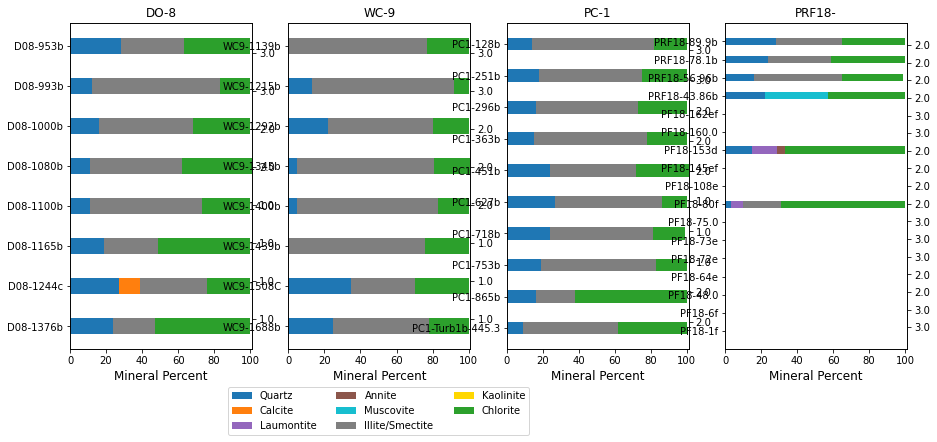

In [29]:
N_PC1 = 10 #create Indices, change based on number plotting
N_PRF = 17
N_WC9 = 8
N_DO8 = 8
ind1 = np.arange(N_DO8)
ind2 = np.arange(N_WC9)
ind3 = np.arange(N_PC1) # the x locations for the groups
ind4 = np.arange(N_PRF) # the x locations for the groups
height = 0.4 #change height of bar, .8 is default

plt.figure(figsize=(15,6))

ax1 = plt.subplot(141)
p1 = plt.barh(ind1, DO8_Data['claypeel','Quartz'], height, color='tab:blue')
p2 = plt.barh(ind1, DO8_Data['claypeel','Calcite'], height,left = DO8_Data['claypeel','Quartz'], color='tab:orange')
p3 = plt.barh(ind1, DO8_Data['claypeel','Laumontite'], height,left = [DO8_Data['claypeel','Quartz'][j] + DO8_Data['claypeel','Calcite'][j] for j in range(len(DO8_Data['claypeel','Quartz']))], color='tab:purple')
p4 = plt.barh(ind1, DO8_Data['claypeel','Annite'], height,left = 
              [DO8_Data['claypeel','Quartz'][j] + DO8_Data['claypeel','Calcite'][j] + DO8_Data['claypeel','Laumontite'][j] for j in range(len(DO8_Data['claypeel','Quartz']))], color='tab:brown')
p5 = plt.barh(ind1, DO8_Data['claypeel','Muscovite'], height,left = 
              [DO8_Data['claypeel','Quartz'][j] + DO8_Data['claypeel','Calcite'][j] + DO8_Data['claypeel','Laumontite'][j] + 
               DO8_Data['claypeel','Annite'][j] for j in range(len(DO8_Data['claypeel','Quartz']))], color='tab:cyan')
p6 = plt.barh(ind1, DO8_Data['claypeel','Illite/Smectite'], height,left = 
              [DO8_Data['claypeel','Quartz'][j] + DO8_Data['claypeel','Calcite'][j] + DO8_Data['claypeel','Laumontite'][j] 
               + DO8_Data['claypeel','Annite'][j] +DO8_Data['claypeel','Muscovite'][j] for j in range(len(DO8_Data['claypeel','Quartz']))], color='grey')
p7 = plt.barh(ind1, DO8_Data['claypeel','Kaolinite'], height,left = 
              [DO8_Data['claypeel','Quartz'][j] + DO8_Data['claypeel','Calcite'][j] + DO8_Data['claypeel','Laumontite'][j] 
               + DO8_Data['claypeel','Annite'][j] +DO8_Data['claypeel','Muscovite'][j]+DO8_Data['claypeel','Illite/Smectite'][j] 
               for j in range(len(DO8_Data['claypeel','Quartz']))], color='gold')
p8 = plt.barh(ind1, DO8_Data['claypeel','Chlorite'], height,left = 
              [DO8_Data['claypeel','Quartz'][j] + DO8_Data['claypeel','Calcite'][j] + DO8_Data['claypeel','Laumontite'][j] 
               + DO8_Data['claypeel','Annite'][j] +DO8_Data['claypeel','Muscovite'][j]+DO8_Data['claypeel','Illite/Smectite'][j]+
               DO8_Data['claypeel','Kaolinite'][j] for j in range(len(DO8_Data['claypeel','Quartz']))], color='tab:green')
plt.xlabel('Mineral Percent', fontsize = 'large')
plt.title('DO-8')
plt.yticks(ind1, DO8_Data['Sample','Sample']) #tried coloring wouldn't work
plt.gca().invert_yaxis()
plt.xlim(0,101)
ax7 = ax1.twinx()
ax7.barh(ind1, DO8_Data['claypeel','Quartz'], color=[])
ax7.set_yticks(ind1)
ax7.set_yticklabels(DO8_Data['Facies','Facies']) #tried coloring wouldn't work)
plt.gca().invert_yaxis()

ax2 = plt.subplot(142)
p1 = plt.barh(ind2, WC9_Data['claypeel','Quartz'], height, color='tab:blue')
p2 = plt.barh(ind2, WC9_Data['claypeel','Calcite'], height,left = WC9_Data['claypeel','Quartz'], color='tab:orange')
p3 = plt.barh(ind2, WC9_Data['claypeel','Laumontite'], height,left = [WC9_Data['claypeel','Quartz'][j] + WC9_Data['claypeel','Calcite'][j] for j in range(len(WC9_Data['claypeel','Quartz']))], color='tab:purple')
p4 = plt.barh(ind2, WC9_Data['claypeel','Annite'], height,left = 
              [WC9_Data['claypeel','Quartz'][j] + WC9_Data['claypeel','Calcite'][j] + WC9_Data['claypeel','Laumontite'][j] for j in range(len(WC9_Data['claypeel','Quartz']))], color='tab:brown')
p5 = plt.barh(ind2, WC9_Data['claypeel','Muscovite'], height,left = 
              [WC9_Data['claypeel','Quartz'][j] + WC9_Data['claypeel','Calcite'][j] + WC9_Data['claypeel','Laumontite'][j] + 
               WC9_Data['claypeel','Annite'][j] for j in range(len(WC9_Data['claypeel','Quartz']))], color='tab:cyan')
p6 = plt.barh(ind2, WC9_Data['claypeel','Illite/Smectite'], height,left = 
              [WC9_Data['claypeel','Quartz'][j] + WC9_Data['claypeel','Calcite'][j] + WC9_Data['claypeel','Laumontite'][j] 
               + WC9_Data['claypeel','Annite'][j] +WC9_Data['claypeel','Muscovite'][j] for j in range(len(WC9_Data['claypeel','Quartz']))], color='tab:gray')
p7 = plt.barh(ind2, WC9_Data['claypeel','Kaolinite'], height,left = 
              [WC9_Data['claypeel','Quartz'][j] + WC9_Data['claypeel','Calcite'][j] + WC9_Data['claypeel','Laumontite'][j] 
               + WC9_Data['claypeel','Annite'][j] +WC9_Data['claypeel','Muscovite'][j]+WC9_Data['claypeel','Illite/Smectite'][j] 
               for j in range(len(WC9_Data['claypeel','Quartz']))], color='gold')
p8 = plt.barh(ind2, WC9_Data['claypeel','Chlorite'], height,left = 
              [WC9_Data['claypeel','Quartz'][j] + WC9_Data['claypeel','Calcite'][j] + WC9_Data['claypeel','Laumontite'][j] 
               + WC9_Data['claypeel','Annite'][j] +WC9_Data['claypeel','Muscovite'][j]+WC9_Data['claypeel','Illite/Smectite'][j]+
               WC9_Data['claypeel','Kaolinite'][j] for j in range(len(WC9_Data['claypeel','Quartz']))], color='tab:green')
plt.xlabel('Mineral Percent', fontsize = 'large')
plt.title('WC-9')
plt.yticks(ind2, WC9_Data['Sample','Sample']) #tried coloring wouldn't work
plt.gca().invert_yaxis()
plt.xlim(0,101)
ax5 = ax2.twinx()
ax5.barh(ind2, WC9_Data['claypeel','Quartz'], color=[])
ax5.set_yticks(ind2)
ax5.set_yticklabels(WC9_Data['Facies','Facies']) #tried coloring wouldn't work)
plt.gca().invert_yaxis()

ax3 = plt.subplot(143)
p1 = plt.barh(ind3, PC1_Data['claypeel','Quartz'], height, color='tab:blue')
p2 = plt.barh(ind3, PC1_Data['claypeel','Calcite'], height,left = PC1_Data['claypeel','Quartz'], color='tab:orange')
p3 = plt.barh(ind3, PC1_Data['claypeel','Laumontite'], height,left = [PC1_Data['claypeel','Quartz'][j] + PC1_Data['claypeel','Calcite'][j] for j in range(len(PC1_Data['claypeel','Quartz']))], color='tab:purple')
p4 = plt.barh(ind3, PC1_Data['claypeel','Annite'], height,left = 
              [PC1_Data['claypeel','Quartz'][j] + PC1_Data['claypeel','Calcite'][j] + PC1_Data['claypeel','Laumontite'][j] for j in range(len(PC1_Data['claypeel','Quartz']))], color='tab:brown')
p5 = plt.barh(ind3, PC1_Data['claypeel','Muscovite'], height,left = 
              [PC1_Data['claypeel','Quartz'][j] + PC1_Data['claypeel','Calcite'][j] + PC1_Data['claypeel','Laumontite'][j] + 
               PC1_Data['claypeel','Annite'][j] for j in range(len(PC1_Data['claypeel','Quartz']))], color='tab:cyan')
p6 = plt.barh(ind3, PC1_Data['claypeel','Illite/Smectite'], height,left = 
              [PC1_Data['claypeel','Quartz'][j] + PC1_Data['claypeel','Calcite'][j] + PC1_Data['claypeel','Laumontite'][j] 
               + PC1_Data['claypeel','Annite'][j] +PC1_Data['claypeel','Muscovite'][j] for j in range(len(PC1_Data['claypeel','Quartz']))], color='tab:gray')
p7 = plt.barh(ind3, PC1_Data['claypeel','Kaolinite'], height,left = 
              [PC1_Data['claypeel','Quartz'][j] + PC1_Data['claypeel','Calcite'][j] + PC1_Data['claypeel','Laumontite'][j] 
               + PC1_Data['claypeel','Annite'][j] +PC1_Data['claypeel','Muscovite'][j]+PC1_Data['claypeel','Illite/Smectite'][j] 
               for j in range(len(PC1_Data['claypeel','Quartz']))], color='gold')
p8 = plt.barh(ind3, PC1_Data['claypeel','Chlorite'], height,left = 
              [PC1_Data['claypeel','Quartz'][j] + PC1_Data['claypeel','Calcite'][j] + PC1_Data['claypeel','Laumontite'][j] 
               + PC1_Data['claypeel','Annite'][j] +PC1_Data['claypeel','Muscovite'][j]+PC1_Data['claypeel','Illite/Smectite'][j]+
               PC1_Data['claypeel','Kaolinite'][j] for j in range(len(PC1_Data['claypeel','Quartz']))], color='tab:green')
plt.xlabel('Mineral Percent', fontsize = 'large')
plt.title('PC-1')
plt.yticks(ind3, PC1_Data['Sample','Sample']) #tried coloring wouldn't work
plt.gca().invert_yaxis()
plt.xlim(0,101)
ax6 = ax3.twinx()
ax6.barh(ind3, PC1_Data['claypeel','Quartz'], color=[])
ax6.set_yticks(ind3)
ax6.set_yticklabels(PC1_Data['Facies','Facies']) #tried coloring wouldn't work)
plt.gca().invert_yaxis()

ax4 = plt.subplot(144)
p1 = plt.barh(ind4, PRF18_Data['claypeel','Quartz'], height, color='tab:blue')
p2 = plt.barh(ind4, PRF18_Data['claypeel','Calcite'], height,left = PRF18_Data['claypeel','Quartz'], color='tab:orange')
p3 = plt.barh(ind4, PRF18_Data['claypeel','Laumontite'], height,left = [PRF18_Data['claypeel','Quartz'][j] + PRF18_Data['claypeel','Calcite'][j] for j in range(len(PRF18_Data['claypeel','Quartz']))], color='tab:purple')
p4 = plt.barh(ind4, PRF18_Data['claypeel','Annite'], height,left = 
              [PRF18_Data['claypeel','Quartz'][j] + PRF18_Data['claypeel','Calcite'][j] + PRF18_Data['claypeel','Laumontite'][j] for j in range(len(PRF18_Data['claypeel','Quartz']))], color='tab:brown')
p5 = plt.barh(ind4, PRF18_Data['claypeel','Muscovite'], height,left = 
              [PRF18_Data['claypeel','Quartz'][j] + PRF18_Data['claypeel','Calcite'][j] + PRF18_Data['claypeel','Laumontite'][j] + 
               PRF18_Data['claypeel','Annite'][j] for j in range(len(PRF18_Data['claypeel','Quartz']))], color='tab:cyan')
p6 = plt.barh(ind4, PRF18_Data['claypeel','Illite/Smectite'], height,left = 
              [PRF18_Data['claypeel','Quartz'][j] + PRF18_Data['claypeel','Calcite'][j] + PRF18_Data['claypeel','Laumontite'][j] 
               + PRF18_Data['claypeel','Annite'][j] +PRF18_Data['claypeel','Muscovite'][j] for j in range(len(PRF18_Data['claypeel','Quartz']))], color='tab:gray')
p7 = plt.barh(ind4, PRF18_Data['claypeel','Kaolinite'], height,left = 
              [PRF18_Data['claypeel','Quartz'][j] + PRF18_Data['claypeel','Calcite'][j] + PRF18_Data['claypeel','Laumontite'][j] 
               + PRF18_Data['claypeel','Annite'][j] +PRF18_Data['claypeel','Muscovite'][j]+PRF18_Data['claypeel','Illite/Smectite'][j] 
               for j in range(len(PRF18_Data['claypeel','Quartz']))], color='gold')
p8 = plt.barh(ind4, PRF18_Data['claypeel','Chlorite'], height,left = 
              [PRF18_Data['claypeel','Quartz'][j] + PRF18_Data['claypeel','Calcite'][j] + PRF18_Data['claypeel','Laumontite'][j] 
               + PRF18_Data['claypeel','Annite'][j] +PRF18_Data['claypeel','Muscovite'][j]+PRF18_Data['claypeel','Illite/Smectite'][j]+
               PRF18_Data['claypeel','Kaolinite'][j] for j in range(len(PRF18_Data['claypeel','Quartz']))], color='tab:green')
plt.xlabel('Mineral Percent', fontsize = 'large')
plt.title('PRF18-')
plt.yticks(ind4, PRF18_Data['Sample','Sample']) #tried coloring wouldn't work
plt.xlim(0,101)
#plt.gca().invert_yaxis() #commenting out for version 2
#Add facies calls
ax8 = ax4.twinx()
ax8.barh(ind4, PRF18_Data['claypeel','Quartz'], color=[])
ax8.set_yticks(ind4)
ax8.set_yticklabels(PRF18_Data['Facies','Facies']) #tried coloring wouldn't work)
#plt.gca().invert_yaxis() #commenting out for version 2

plt.legend((p1[0], p2[0], p3[0],p4[0],p5[0], p6[0], p7[0], p8[0]), DO8_Data['claypeel'].columns, bbox_to_anchor=(-1.05, -0.1),ncol=3)


plt.tight_layout()
# plt.savefig('code_output/XRDclaypeelAnalysis_Comp.svg')
plt.savefig('code_output/XRDclaypeelAnalysis_Comp_v2.pdf')
plt.show()

Now for scaling with Depth!

/var/folders/57/lmgz7h4x11v34k53c6ldrlrw0000gn/T/ipykernel_90690/2555491662.py:144: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


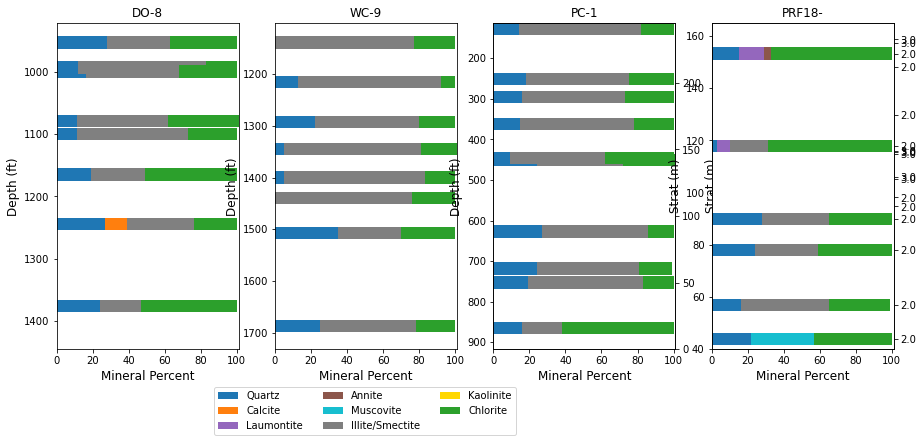

In [30]:
height = 30 #change height of bar, .8 is default, for PC-1
height1 = 30/(245/0.3048)*(1445-922.08720904304437) #for DO-8
height2 = 30/(245/0.3048)*(1732-1101.1402872518622) #for WC-9
height3 = 30/ (245/0.3048)*(165-40)#for PF18-

plt.figure(figsize=(15,6))

ax1 = plt.subplot(141)
p1 = plt.barh(DO8_Data['Depth (ft)', 'Depth (ft)'], DO8_Data['claypeel','Quartz'], height1, color='tab:blue')
p2 = plt.barh(DO8_Data['Depth (ft)', 'Depth (ft)'], DO8_Data['claypeel','Calcite'], height1,left = DO8_Data['claypeel','Quartz'], color='tab:orange')
p3 = plt.barh(DO8_Data['Depth (ft)', 'Depth (ft)'], DO8_Data['claypeel','Laumontite'], height1,left = [DO8_Data['claypeel','Quartz'][j] + DO8_Data['claypeel','Calcite'][j] for j in range(len(DO8_Data['claypeel','Quartz']))], color='tab:purple')
p4 = plt.barh(DO8_Data['Depth (ft)', 'Depth (ft)'], DO8_Data['claypeel','Annite'], height1,left = 
              [DO8_Data['claypeel','Quartz'][j] + DO8_Data['claypeel','Calcite'][j] + DO8_Data['claypeel','Laumontite'][j] for j in range(len(DO8_Data['claypeel','Quartz']))], color='tab:brown')
p5 = plt.barh(DO8_Data['Depth (ft)', 'Depth (ft)'], DO8_Data['claypeel','Muscovite'], height1,left = 
              [DO8_Data['claypeel','Quartz'][j] + DO8_Data['claypeel','Calcite'][j] + DO8_Data['claypeel','Laumontite'][j] + 
               DO8_Data['claypeel','Annite'][j] for j in range(len(DO8_Data['claypeel','Quartz']))], color='tab:cyan')
p6 = plt.barh(DO8_Data['Depth (ft)', 'Depth (ft)'], DO8_Data['claypeel','Illite/Smectite'], height1,left = 
              [DO8_Data['claypeel','Quartz'][j] + DO8_Data['claypeel','Calcite'][j] + DO8_Data['claypeel','Laumontite'][j] 
               + DO8_Data['claypeel','Annite'][j] +DO8_Data['claypeel','Muscovite'][j] for j in range(len(DO8_Data['claypeel','Quartz']))], color='grey')
p7 = plt.barh(DO8_Data['Depth (ft)', 'Depth (ft)'], DO8_Data['claypeel','Kaolinite'], height1,left = 
              [DO8_Data['claypeel','Quartz'][j] + DO8_Data['claypeel','Calcite'][j] + DO8_Data['claypeel','Laumontite'][j] 
               + DO8_Data['claypeel','Annite'][j] +DO8_Data['claypeel','Muscovite'][j]+DO8_Data['claypeel','Illite/Smectite'][j] 
               for j in range(len(DO8_Data['claypeel','Quartz']))], color='gold')
p8 = plt.barh(DO8_Data['Depth (ft)', 'Depth (ft)'], DO8_Data['claypeel','Chlorite'], height1,left = 
              [DO8_Data['claypeel','Quartz'][j] + DO8_Data['claypeel','Calcite'][j] + DO8_Data['claypeel','Laumontite'][j] 
               + DO8_Data['claypeel','Annite'][j] +DO8_Data['claypeel','Muscovite'][j]+DO8_Data['claypeel','Illite/Smectite'][j]+
               DO8_Data['claypeel','Kaolinite'][j] for j in range(len(DO8_Data['claypeel','Quartz']))], color='tab:green')
plt.xlabel('Mineral Percent', fontsize = 'large')
plt.ylabel('Depth (ft)', fontsize = 'large')
plt.title('DO-8')
plt.xlim(0,101)
plt.ylim(1445,922.08720904304437)
# ax7 = ax1.twinx()
# ax7.barh(DO8_Data['Depth (ft)', 'Depth (ft)'], DO8_Data['Bulk','Quartz'], color=[])
# ax7.set_yticks(DO8_Data['Depth (ft)', 'Depth (ft)'])
# ax7.set_yticklabels(DO8_Data['Sample','Sample']) #tried coloring wouldn't work
# plt.gca().invert_yaxis()

ax2 = plt.subplot(142)
p1 = plt.barh(WC9_Data['Depth (ft)', 'Depth (ft)'], WC9_Data['claypeel','Quartz'], height2, color='tab:blue')
p2 = plt.barh(WC9_Data['Depth (ft)', 'Depth (ft)'], WC9_Data['claypeel','Calcite'], height2,left = WC9_Data['claypeel','Quartz'], color='tab:orange')
p3 = plt.barh(WC9_Data['Depth (ft)', 'Depth (ft)'], WC9_Data['claypeel','Laumontite'], height2,left = [WC9_Data['claypeel','Quartz'][j] + WC9_Data['claypeel','Calcite'][j] for j in range(len(WC9_Data['claypeel','Quartz']))], color='tab:purple')
p4 = plt.barh(WC9_Data['Depth (ft)', 'Depth (ft)'], WC9_Data['claypeel','Annite'], height2,left = 
              [WC9_Data['claypeel','Quartz'][j] + WC9_Data['claypeel','Calcite'][j] + WC9_Data['claypeel','Laumontite'][j] for j in range(len(WC9_Data['claypeel','Quartz']))], color='tab:brown')
p5 = plt.barh(WC9_Data['Depth (ft)', 'Depth (ft)'], WC9_Data['claypeel','Muscovite'], height2,left = 
              [WC9_Data['claypeel','Quartz'][j] + WC9_Data['claypeel','Calcite'][j] + WC9_Data['claypeel','Laumontite'][j] + 
               WC9_Data['claypeel','Annite'][j] for j in range(len(WC9_Data['claypeel','Quartz']))], color='tab:cyan')
p6 = plt.barh(WC9_Data['Depth (ft)', 'Depth (ft)'], WC9_Data['claypeel','Illite/Smectite'], height2,left = 
              [WC9_Data['claypeel','Quartz'][j] + WC9_Data['claypeel','Calcite'][j] + WC9_Data['claypeel','Laumontite'][j] 
               + WC9_Data['claypeel','Annite'][j] +WC9_Data['claypeel','Muscovite'][j] for j in range(len(WC9_Data['claypeel','Quartz']))], color='tab:gray')
p7 = plt.barh(WC9_Data['Depth (ft)', 'Depth (ft)'], WC9_Data['claypeel','Kaolinite'], height2,left = 
              [WC9_Data['claypeel','Quartz'][j] + WC9_Data['claypeel','Calcite'][j] + WC9_Data['claypeel','Laumontite'][j] 
               + WC9_Data['claypeel','Annite'][j] +WC9_Data['claypeel','Muscovite'][j]+WC9_Data['claypeel','Illite/Smectite'][j] 
               for j in range(len(WC9_Data['claypeel','Quartz']))], color='gold')
p8 = plt.barh(WC9_Data['Depth (ft)', 'Depth (ft)'], WC9_Data['claypeel','Chlorite'], height2,left = 
              [WC9_Data['claypeel','Quartz'][j] + WC9_Data['claypeel','Calcite'][j] + WC9_Data['claypeel','Laumontite'][j] 
               + WC9_Data['claypeel','Annite'][j] +WC9_Data['claypeel','Muscovite'][j]+WC9_Data['claypeel','Illite/Smectite'][j]+
               WC9_Data['claypeel','Kaolinite'][j] for j in range(len(WC9_Data['claypeel','Quartz']))], color='tab:green')
plt.xlabel('Mineral Percent', fontsize = 'large')
plt.ylabel('Depth (ft)', fontsize = 'large')
plt.title('WC-9')
# plt.yticks(WC9_Data['Depth (ft)', 'Depth (ft)'], WC9_Data['Sample','Sample']) #tried coloring wouldn't work
plt.xlim(0,101)
plt.ylim(1732,1101.1402872518622)
# ax5 = ax2.twinx()
# ax5.barh(WC9_Data['Depth (ft)', 'Depth (ft)'], WC9_Data['Bulk','Quartz'], color=[])
# ax5.set_yticks(WC9_Data['Depth (ft)', 'Depth (ft)'])
# ax5.set_yticklabels(WC9_Data['Facies','Facies']) #tried coloring wouldn't work)
# plt.gca().invert_yaxis()

ax3 = plt.subplot(143)
p1 = plt.barh(PC1_Data['Depth (ft)', 'Depth (ft)'], PC1_Data['claypeel','Quartz'], height, color='tab:blue')
p2 = plt.barh(PC1_Data['Depth (ft)', 'Depth (ft)'], PC1_Data['claypeel','Calcite'], height,left = PC1_Data['claypeel','Quartz'], color='tab:orange')
p3 = plt.barh(PC1_Data['Depth (ft)', 'Depth (ft)'], PC1_Data['claypeel','Laumontite'], height,left = [PC1_Data['claypeel','Quartz'][j] + PC1_Data['claypeel','Calcite'][j] for j in range(len(PC1_Data['claypeel','Quartz']))], color='tab:purple')
p4 = plt.barh(PC1_Data['Depth (ft)', 'Depth (ft)'], PC1_Data['claypeel','Annite'], height,left = 
              [PC1_Data['claypeel','Quartz'][j] + PC1_Data['claypeel','Calcite'][j] + PC1_Data['claypeel','Laumontite'][j] for j in range(len(PC1_Data['claypeel','Quartz']))], color='tab:brown')
p5 = plt.barh(PC1_Data['Depth (ft)', 'Depth (ft)'], PC1_Data['claypeel','Muscovite'], height,left = 
              [PC1_Data['claypeel','Quartz'][j] + PC1_Data['claypeel','Calcite'][j] + PC1_Data['claypeel','Laumontite'][j] + 
               PC1_Data['claypeel','Annite'][j] for j in range(len(PC1_Data['claypeel','Quartz']))], color='tab:cyan')
p6 = plt.barh(PC1_Data['Depth (ft)', 'Depth (ft)'], PC1_Data['claypeel','Illite/Smectite'], height,left = 
              [PC1_Data['claypeel','Quartz'][j] + PC1_Data['claypeel','Calcite'][j] + PC1_Data['claypeel','Laumontite'][j] 
               + PC1_Data['claypeel','Annite'][j] +PC1_Data['claypeel','Muscovite'][j] for j in range(len(PC1_Data['claypeel','Quartz']))], color='tab:gray')
p7 = plt.barh(PC1_Data['Depth (ft)', 'Depth (ft)'], PC1_Data['claypeel','Kaolinite'], height,left = 
              [PC1_Data['claypeel','Quartz'][j] + PC1_Data['claypeel','Calcite'][j] + PC1_Data['claypeel','Laumontite'][j] 
               + PC1_Data['claypeel','Annite'][j] +PC1_Data['claypeel','Muscovite'][j]+PC1_Data['claypeel','Illite/Smectite'][j] 
               for j in range(len(PC1_Data['claypeel','Quartz']))], color='gold')
p8 = plt.barh(PC1_Data['Depth (ft)', 'Depth (ft)'], PC1_Data['claypeel','Chlorite'], height,left = 
              [PC1_Data['claypeel','Quartz'][j] + PC1_Data['claypeel','Calcite'][j] + PC1_Data['claypeel','Laumontite'][j] 
               + PC1_Data['claypeel','Annite'][j] +PC1_Data['claypeel','Muscovite'][j]+PC1_Data['claypeel','Illite/Smectite'][j]+
               PC1_Data['claypeel','Kaolinite'][j] for j in range(len(PC1_Data['claypeel','Quartz']))], color='tab:green')
plt.xlabel('Mineral Percent', fontsize = 'large')
plt.ylabel('Depth (ft)', fontsize = 'large')
plt.title('PC-1')
# plt.yticks(PC1_Data['Depth (ft)', 'Depth (ft)'], PC1_Data['Sample','Sample']) #tried coloring wouldn't work
plt.xlim(0,101)
plt.ylim(917,113.19422572178485)
ax6 = ax3.twinx()
ax6.set_ylabel('Strat (m)', fontsize = 'large')
ax6.set_ylim(0,245)
# ax6 = ax3.twinx()
# ax6.barh(PC1_Data['Depth (ft)', 'Depth (ft)'], PC1_Data['Bulk','Quartz'], color=[])
# ax6.set_yticks(PC1_Data['Depth (ft)', 'Depth (ft)'])
# ax6.set_yticklabels(PC1_Data['Facies','Facies']) #tried coloring wouldn't work)
# plt.gca().invert_yaxis()

ax4 = plt.subplot(144)
p1 = plt.barh(PRF18_Data['Strat (m)', 'Strat (m)'], PRF18_Data['claypeel','Quartz'], height3, color='tab:blue')
p2 = plt.barh(PRF18_Data['Strat (m)', 'Strat (m)'], PRF18_Data['claypeel','Calcite'], height3,left = PRF18_Data['claypeel','Quartz'], color='tab:orange')
p3 = plt.barh(PRF18_Data['Strat (m)', 'Strat (m)'], PRF18_Data['claypeel','Laumontite'], height3,left = [PRF18_Data['claypeel','Quartz'][j] + PRF18_Data['claypeel','Calcite'][j] for j in range(len(PRF18_Data['claypeel','Quartz']))], color='tab:purple')
p4 = plt.barh(PRF18_Data['Strat (m)', 'Strat (m)'], PRF18_Data['claypeel','Annite'], height3,left = 
              [PRF18_Data['claypeel','Quartz'][j] + PRF18_Data['claypeel','Calcite'][j] + PRF18_Data['claypeel','Laumontite'][j] for j in range(len(PRF18_Data['claypeel','Quartz']))], color='tab:brown')
p5 = plt.barh(PRF18_Data['Strat (m)', 'Strat (m)'], PRF18_Data['claypeel','Muscovite'], height3,left = 
              [PRF18_Data['claypeel','Quartz'][j] + PRF18_Data['claypeel','Calcite'][j] + PRF18_Data['claypeel','Laumontite'][j] + 
               PRF18_Data['claypeel','Annite'][j] for j in range(len(PRF18_Data['claypeel','Quartz']))], color='tab:cyan')
p6 = plt.barh(PRF18_Data['Strat (m)', 'Strat (m)'], PRF18_Data['claypeel','Illite/Smectite'], height3,left = 
              [PRF18_Data['claypeel','Quartz'][j] + PRF18_Data['claypeel','Calcite'][j] + PRF18_Data['claypeel','Laumontite'][j] 
               + PRF18_Data['claypeel','Annite'][j] +PRF18_Data['claypeel','Muscovite'][j] for j in range(len(PRF18_Data['claypeel','Quartz']))], color='tab:gray')
p7 = plt.barh(PRF18_Data['Strat (m)', 'Strat (m)'], PRF18_Data['claypeel','Kaolinite'], height3,left = 
              [PRF18_Data['claypeel','Quartz'][j] + PRF18_Data['claypeel','Calcite'][j] + PRF18_Data['claypeel','Laumontite'][j] 
               + PRF18_Data['claypeel','Annite'][j] +PRF18_Data['claypeel','Muscovite'][j]+PRF18_Data['claypeel','Illite/Smectite'][j] 
               for j in range(len(PRF18_Data['claypeel','Quartz']))], color='gold')
p8 = plt.barh(PRF18_Data['Strat (m)', 'Strat (m)'], PRF18_Data['claypeel','Chlorite'], height3,left = 
              [PRF18_Data['claypeel','Quartz'][j] + PRF18_Data['claypeel','Calcite'][j] + PRF18_Data['claypeel','Laumontite'][j] 
               + PRF18_Data['claypeel','Annite'][j] +PRF18_Data['claypeel','Muscovite'][j]+PRF18_Data['claypeel','Illite/Smectite'][j]+
               PRF18_Data['claypeel','Kaolinite'][j] for j in range(len(PRF18_Data['claypeel','Quartz']))], color='tab:green')
plt.xlabel('Mineral Percent', fontsize = 'large')
plt.ylabel('Strat (m)', fontsize = 'large')
plt.title('PRF18-')
#plt.yticks(PRF18_Data['Strat (m)', 'Strat (m)']) 
plt.xlim(0,101)
plt.ylim (40,165)
#plt.gca().invert_yaxis()
#Add facies calls
ax8 = ax4.twinx()
ax8.set_yticks(PRF18_Data['Strat (m)', 'Strat (m)'])
# ax8.barh(PRF18_Data['Depth (ft)', 'Depth (ft)'], PRF18_Data['Bulk','Quartz'], color=[])
ax8.set_yticklabels(PRF18_Data['Facies','Facies']) #tried coloring wouldn't work)
ax8.set_ylim (40,165)
# plt.gca().invert_yaxis()

plt.legend((p1[0], p2[0], p3[0],p4[0],p5[0], p6[0], p7[0], p8[0]), DO8_Data['claypeel'].columns, bbox_to_anchor=(-1.05, -0.1),ncol=3)


plt.tight_layout()
# plt.savefig('code_output/XRDclaypeelAnalysis_Comp.svg')
plt.savefig('code_output/XRDclaypeelAnalysis_Comp_Depth.pdf')
plt.show()

### High-angle Clay from Bulk XRD (Quartz Normalization)

In [31]:
PRF18_Data['ClayMin%'].columns

Index(['Fe-chlorite (1.572)', 'Fe-chlorite (1.565)', 'Chlorite',
       'Chlorite/Berthierine?', 'Bertheirine?', 'Laumontite? (1.523)',
       'Dioctahedral smectite', 'Trioctahedral smectite/Glauconite?',
       'Glauconite(?, or Laumontite?)', 'Illite/Muscovite + smectite',
       'Laumontite? (1.497)', 'Kaolinite'],
      dtype='object')

/var/folders/57/lmgz7h4x11v34k53c6ldrlrw0000gn/T/ipykernel_90690/3981982851.py:221: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


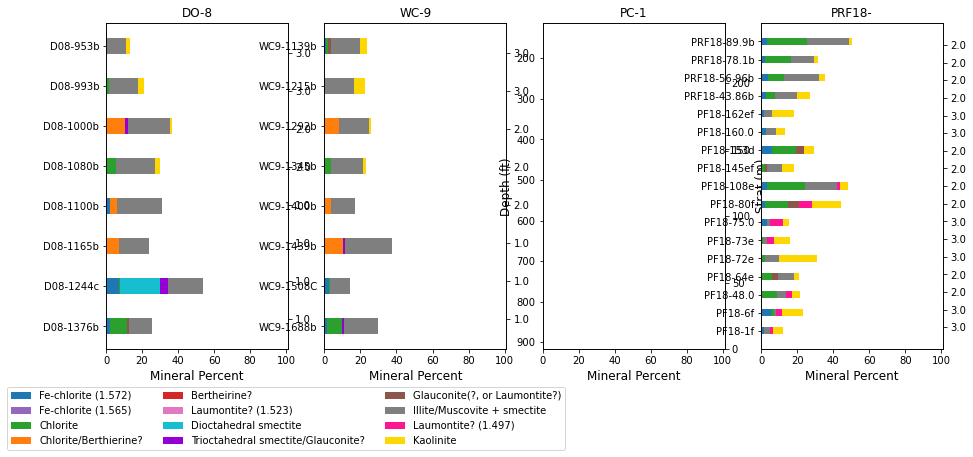

In [32]:
N_PC1 = 10 #create Indices, change based on number plotting
N_PRF = 17
N_WC9 = 8
N_DO8 = 8
ind1 = np.arange(N_DO8)
ind2 = np.arange(N_WC9)
ind3 = np.arange(N_PC1) # the x locations for the groups
ind4 = np.arange(N_PRF) # the x locations for the groups
height = 0.4 #change height of bar, .8 is default

plt.figure(figsize=(15,6))

ax1 = plt.subplot(141)
p1 = plt.barh(ind1, DO8_Data['ClayMin%','Fe-chlorite (1.572)'], height, color='tab:blue')
p2 = plt.barh(ind1, DO8_Data['ClayMin%','Fe-chlorite (1.565)'], height,left = DO8_Data['ClayMin%','Fe-chlorite (1.572)'], color='tab:purple')
p3 = plt.barh(ind1, DO8_Data['ClayMin%','Chlorite'], height,left = [DO8_Data['ClayMin%','Fe-chlorite (1.572)'][j] + DO8_Data['ClayMin%','Fe-chlorite (1.565)'][j] for j in range(len(DO8_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:green')
p4 = plt.barh(ind1, DO8_Data['ClayMin%','Chlorite/Berthierine?'], height,left = 
              [DO8_Data['ClayMin%','Fe-chlorite (1.572)'][j] + DO8_Data['ClayMin%','Fe-chlorite (1.565)'][j] + DO8_Data['ClayMin%','Chlorite'][j] for j in range(len(DO8_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:orange')
p5 = plt.barh(ind1, DO8_Data['ClayMin%','Bertheirine?'], height,left = 
              [DO8_Data['ClayMin%','Fe-chlorite (1.572)'][j] + DO8_Data['ClayMin%','Fe-chlorite (1.565)'][j] + DO8_Data['ClayMin%','Chlorite'][j] + 
               DO8_Data['ClayMin%','Chlorite/Berthierine?'][j] for j in range(len(DO8_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:red')
p6 = plt.barh(ind1, DO8_Data['ClayMin%','Laumontite? (1.523)'], height,left = 
              [DO8_Data['ClayMin%','Fe-chlorite (1.572)'][j] + DO8_Data['ClayMin%','Fe-chlorite (1.565)'][j] + DO8_Data['ClayMin%','Chlorite'][j] 
               + DO8_Data['ClayMin%','Chlorite/Berthierine?'][j] +DO8_Data['ClayMin%','Bertheirine?'][j] for j in range(len(DO8_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:pink')
p7 = plt.barh(ind1, DO8_Data['ClayMin%','Dioctahedral smectite'], height,left = 
              [DO8_Data['ClayMin%','Fe-chlorite (1.572)'][j] + DO8_Data['ClayMin%','Fe-chlorite (1.565)'][j] + DO8_Data['ClayMin%','Chlorite'][j] 
               + DO8_Data['ClayMin%','Chlorite/Berthierine?'][j] +DO8_Data['ClayMin%','Bertheirine?'][j]+DO8_Data['ClayMin%','Laumontite? (1.523)'][j] 
               for j in range(len(DO8_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:cyan')
p8 = plt.barh(ind1, DO8_Data['ClayMin%','Trioctahedral smectite/Glauconite?'], height,left = 
              [DO8_Data['ClayMin%','Fe-chlorite (1.572)'][j] + DO8_Data['ClayMin%','Fe-chlorite (1.565)'][j] + DO8_Data['ClayMin%','Chlorite'][j] 
               + DO8_Data['ClayMin%','Chlorite/Berthierine?'][j] +DO8_Data['ClayMin%','Bertheirine?'][j]+DO8_Data['ClayMin%','Laumontite? (1.523)'][j]+
               DO8_Data['ClayMin%','Dioctahedral smectite'][j] for j in range(len(DO8_Data['ClayMin%','Fe-chlorite (1.572)']))], color='darkviolet')
p9 = plt.barh(ind1, DO8_Data['ClayMin%','Glauconite(?, or Laumontite?)'], height,left = 
              [DO8_Data['ClayMin%','Fe-chlorite (1.572)'][j] + DO8_Data['ClayMin%','Fe-chlorite (1.565)'][j] + DO8_Data['ClayMin%','Chlorite'][j] 
               + DO8_Data['ClayMin%','Chlorite/Berthierine?'][j] +DO8_Data['ClayMin%','Bertheirine?'][j]+DO8_Data['ClayMin%','Laumontite? (1.523)'][j]+
               DO8_Data['ClayMin%','Dioctahedral smectite'][j] + DO8_Data['ClayMin%','Trioctahedral smectite/Glauconite?'][j] for j in range(len(DO8_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:brown')
p10 = plt.barh(ind1, DO8_Data['ClayMin%','Illite/Muscovite + smectite'], height,left = 
              [DO8_Data['ClayMin%','Fe-chlorite (1.572)'][j] + DO8_Data['ClayMin%','Fe-chlorite (1.565)'][j] + DO8_Data['ClayMin%','Chlorite'][j] 
               + DO8_Data['ClayMin%','Chlorite/Berthierine?'][j] +DO8_Data['ClayMin%','Bertheirine?'][j]+DO8_Data['ClayMin%','Laumontite? (1.523)'][j]+
               DO8_Data['ClayMin%','Dioctahedral smectite'][j] + DO8_Data['ClayMin%','Trioctahedral smectite/Glauconite?'][j] +DO8_Data['ClayMin%','Glauconite(?, or Laumontite?)'][j] 
               for j in range(len(DO8_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:gray')
p11 = plt.barh(ind1, DO8_Data['ClayMin%','Laumontite? (1.497)'], height,left = 
              [DO8_Data['ClayMin%','Fe-chlorite (1.572)'][j] + DO8_Data['ClayMin%','Fe-chlorite (1.565)'][j] + DO8_Data['ClayMin%','Chlorite'][j] 
               + DO8_Data['ClayMin%','Chlorite/Berthierine?'][j] +DO8_Data['ClayMin%','Bertheirine?'][j]+DO8_Data['ClayMin%','Laumontite? (1.523)'][j]+
               DO8_Data['ClayMin%','Dioctahedral smectite'][j] + DO8_Data['ClayMin%','Trioctahedral smectite/Glauconite?'][j]+DO8_Data['ClayMin%','Glauconite(?, or Laumontite?)'][j]
               +DO8_Data['ClayMin%','Illite/Muscovite + smectite'][j] for j in range(len(DO8_Data['ClayMin%','Fe-chlorite (1.572)']))], color='deeppink')
p12 = plt.barh(ind1, DO8_Data['ClayMin%','Kaolinite'], height,left = 
              [DO8_Data['ClayMin%','Fe-chlorite (1.572)'][j] + DO8_Data['ClayMin%','Fe-chlorite (1.565)'][j] + DO8_Data['ClayMin%','Chlorite'][j] 
               + DO8_Data['ClayMin%','Chlorite/Berthierine?'][j] +DO8_Data['ClayMin%','Bertheirine?'][j]+DO8_Data['ClayMin%','Laumontite? (1.523)'][j]+
               DO8_Data['ClayMin%','Dioctahedral smectite'][j] + DO8_Data['ClayMin%','Trioctahedral smectite/Glauconite?'][j]+DO8_Data['ClayMin%','Glauconite(?, or Laumontite?)'][j]+
               DO8_Data['ClayMin%','Illite/Muscovite + smectite'][j]+DO8_Data['ClayMin%','Laumontite? (1.497)'][j] for j in range(len(DO8_Data['ClayMin%','Fe-chlorite (1.572)']))], color='gold')
plt.xlabel('Mineral Percent', fontsize = 'large')
plt.title('DO-8')
plt.yticks(ind1, DO8_Data['Sample','Sample']) #tried coloring wouldn't work
plt.gca().invert_yaxis()
plt.xlim(0,101)
ax7 = ax1.twinx()
ax7.barh(ind1, DO8_Data['ClayMin%','Fe-chlorite (1.572)'], color=[])
ax7.set_yticks(ind1)
ax7.set_yticklabels(DO8_Data['Facies','Facies']) #tried coloring wouldn't work)
plt.gca().invert_yaxis()

ax2 = plt.subplot(142)
p1 = plt.barh(ind2, WC9_Data['ClayMin%','Fe-chlorite (1.572)'], height, color='tab:blue')
p2 = plt.barh(ind2, WC9_Data['ClayMin%','Fe-chlorite (1.565)'], height,left = WC9_Data['ClayMin%','Fe-chlorite (1.572)'], color='tab:purple')
p3 = plt.barh(ind2, WC9_Data['ClayMin%','Chlorite'], height,left = [WC9_Data['ClayMin%','Fe-chlorite (1.572)'][j] + WC9_Data['ClayMin%','Fe-chlorite (1.565)'][j] for j in range(len(WC9_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:green')
p4 = plt.barh(ind2, WC9_Data['ClayMin%','Chlorite/Berthierine?'], height,left = 
              [WC9_Data['ClayMin%','Fe-chlorite (1.572)'][j] + WC9_Data['ClayMin%','Fe-chlorite (1.565)'][j] + WC9_Data['ClayMin%','Chlorite'][j] for j in range(len(WC9_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:orange')
p5 = plt.barh(ind2, WC9_Data['ClayMin%','Bertheirine?'], height,left = 
              [WC9_Data['ClayMin%','Fe-chlorite (1.572)'][j] + WC9_Data['ClayMin%','Fe-chlorite (1.565)'][j] + WC9_Data['ClayMin%','Chlorite'][j] + 
               WC9_Data['ClayMin%','Chlorite/Berthierine?'][j] for j in range(len(WC9_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:red')
p6 = plt.barh(ind2, WC9_Data['ClayMin%','Laumontite? (1.523)'], height,left = 
              [WC9_Data['ClayMin%','Fe-chlorite (1.572)'][j] + WC9_Data['ClayMin%','Fe-chlorite (1.565)'][j] + WC9_Data['ClayMin%','Chlorite'][j] 
               + WC9_Data['ClayMin%','Chlorite/Berthierine?'][j] +WC9_Data['ClayMin%','Bertheirine?'][j] for j in range(len(WC9_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:pink')
p7 = plt.barh(ind2, WC9_Data['ClayMin%','Dioctahedral smectite'], height,left = 
              [WC9_Data['ClayMin%','Fe-chlorite (1.572)'][j] + WC9_Data['ClayMin%','Fe-chlorite (1.565)'][j] + WC9_Data['ClayMin%','Chlorite'][j] 
               + WC9_Data['ClayMin%','Chlorite/Berthierine?'][j] +WC9_Data['ClayMin%','Bertheirine?'][j]+WC9_Data['ClayMin%','Laumontite? (1.523)'][j] 
               for j in range(len(WC9_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:cyan')
p8 = plt.barh(ind2, WC9_Data['ClayMin%','Trioctahedral smectite/Glauconite?'], height,left = 
              [WC9_Data['ClayMin%','Fe-chlorite (1.572)'][j] + WC9_Data['ClayMin%','Fe-chlorite (1.565)'][j] + WC9_Data['ClayMin%','Chlorite'][j] 
               + WC9_Data['ClayMin%','Chlorite/Berthierine?'][j] +WC9_Data['ClayMin%','Bertheirine?'][j]+WC9_Data['ClayMin%','Laumontite? (1.523)'][j]+
               WC9_Data['ClayMin%','Dioctahedral smectite'][j] for j in range(len(WC9_Data['ClayMin%','Fe-chlorite (1.572)']))], color='darkviolet')
p9 = plt.barh(ind2, WC9_Data['ClayMin%','Glauconite(?, or Laumontite?)'], height,left = 
              [WC9_Data['ClayMin%','Fe-chlorite (1.572)'][j] + WC9_Data['ClayMin%','Fe-chlorite (1.565)'][j] + WC9_Data['ClayMin%','Chlorite'][j] 
               + WC9_Data['ClayMin%','Chlorite/Berthierine?'][j] +WC9_Data['ClayMin%','Bertheirine?'][j]+WC9_Data['ClayMin%','Laumontite? (1.523)'][j]+
               WC9_Data['ClayMin%','Dioctahedral smectite'][j] + WC9_Data['ClayMin%','Trioctahedral smectite/Glauconite?'][j] for j in range(len(WC9_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:brown')
p10 = plt.barh(ind2, WC9_Data['ClayMin%','Illite/Muscovite + smectite'], height,left = 
              [WC9_Data['ClayMin%','Fe-chlorite (1.572)'][j] + WC9_Data['ClayMin%','Fe-chlorite (1.565)'][j] + WC9_Data['ClayMin%','Chlorite'][j] 
               + WC9_Data['ClayMin%','Chlorite/Berthierine?'][j] +WC9_Data['ClayMin%','Bertheirine?'][j]+WC9_Data['ClayMin%','Laumontite? (1.523)'][j]+
               WC9_Data['ClayMin%','Dioctahedral smectite'][j] + WC9_Data['ClayMin%','Trioctahedral smectite/Glauconite?'][j] +WC9_Data['ClayMin%','Glauconite(?, or Laumontite?)'][j] 
               for j in range(len(WC9_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:gray')
p11 = plt.barh(ind2, WC9_Data['ClayMin%','Laumontite? (1.497)'], height,left = 
              [WC9_Data['ClayMin%','Fe-chlorite (1.572)'][j] + WC9_Data['ClayMin%','Fe-chlorite (1.565)'][j] + WC9_Data['ClayMin%','Chlorite'][j] 
               + WC9_Data['ClayMin%','Chlorite/Berthierine?'][j] +WC9_Data['ClayMin%','Bertheirine?'][j]+WC9_Data['ClayMin%','Laumontite? (1.523)'][j]+
               WC9_Data['ClayMin%','Dioctahedral smectite'][j] + WC9_Data['ClayMin%','Trioctahedral smectite/Glauconite?'][j]+WC9_Data['ClayMin%','Glauconite(?, or Laumontite?)'][j]
               +WC9_Data['ClayMin%','Illite/Muscovite + smectite'][j] for j in range(len(WC9_Data['ClayMin%','Fe-chlorite (1.572)']))], color='deeppink')
p12 = plt.barh(ind2, WC9_Data['ClayMin%','Kaolinite'], height,left = 
              [WC9_Data['ClayMin%','Fe-chlorite (1.572)'][j] + WC9_Data['ClayMin%','Fe-chlorite (1.565)'][j] + WC9_Data['ClayMin%','Chlorite'][j] 
               + WC9_Data['ClayMin%','Chlorite/Berthierine?'][j] +WC9_Data['ClayMin%','Bertheirine?'][j]+WC9_Data['ClayMin%','Laumontite? (1.523)'][j]+
               WC9_Data['ClayMin%','Dioctahedral smectite'][j] + WC9_Data['ClayMin%','Trioctahedral smectite/Glauconite?'][j]+WC9_Data['ClayMin%','Glauconite(?, or Laumontite?)'][j]+
               WC9_Data['ClayMin%','Illite/Muscovite + smectite'][j]+WC9_Data['ClayMin%','Laumontite? (1.497)'][j] for j in range(len(WC9_Data['ClayMin%','Fe-chlorite (1.572)']))], color='gold')
plt.xlabel('Mineral Percent', fontsize = 'large')
plt.title('WC-9')
plt.yticks(ind2, WC9_Data['Sample','Sample']) #tried coloring wouldn't work
plt.gca().invert_yaxis()
plt.xlim(0,101)
ax5 = ax2.twinx()
ax5.barh(ind2, WC9_Data['ClayMin%','Fe-chlorite (1.572)'], color=[])
ax5.set_yticks(ind2)
ax5.set_yticklabels(WC9_Data['Facies','Facies']) #tried coloring wouldn't work)
plt.gca().invert_yaxis()

ax3 = plt.subplot(143)
p1 = plt.barh(ind3, PC1_Data['ClayMin%','Fe-chlorite (1.572)'], height, color='tab:blue')
p2 = plt.barh(ind3, PC1_Data['ClayMin%','Fe-chlorite (1.565)'], height,left = PC1_Data['ClayMin%','Fe-chlorite (1.572)'], color='tab:purple')
p3 = plt.barh(ind3, PC1_Data['ClayMin%','Chlorite'], height,left = [PC1_Data['ClayMin%','Fe-chlorite (1.572)'][j] + PC1_Data['ClayMin%','Fe-chlorite (1.565)'][j] for j in range(len(PC1_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:green')
p4 = plt.barh(ind3, PC1_Data['ClayMin%','Chlorite/Berthierine?'], height,left = 
              [PC1_Data['ClayMin%','Fe-chlorite (1.572)'][j] + PC1_Data['ClayMin%','Fe-chlorite (1.565)'][j] + PC1_Data['ClayMin%','Chlorite'][j] for j in range(len(PC1_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:orange')
p5 = plt.barh(ind3, PC1_Data['ClayMin%','Bertheirine?'], height,left = 
              [PC1_Data['ClayMin%','Fe-chlorite (1.572)'][j] + PC1_Data['ClayMin%','Fe-chlorite (1.565)'][j] + PC1_Data['ClayMin%','Chlorite'][j] + 
               PC1_Data['ClayMin%','Chlorite/Berthierine?'][j] for j in range(len(PC1_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:red')
p6 = plt.barh(ind3, PC1_Data['ClayMin%','Laumontite? (1.523)'], height,left = 
              [PC1_Data['ClayMin%','Fe-chlorite (1.572)'][j] + PC1_Data['ClayMin%','Fe-chlorite (1.565)'][j] + PC1_Data['ClayMin%','Chlorite'][j] 
               + PC1_Data['ClayMin%','Chlorite/Berthierine?'][j] +PC1_Data['ClayMin%','Bertheirine?'][j] for j in range(len(PC1_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:pink')
p7 = plt.barh(ind3, PC1_Data['ClayMin%','Dioctahedral smectite'], height,left = 
              [PC1_Data['ClayMin%','Fe-chlorite (1.572)'][j] + PC1_Data['ClayMin%','Fe-chlorite (1.565)'][j] + PC1_Data['ClayMin%','Chlorite'][j] 
               + PC1_Data['ClayMin%','Chlorite/Berthierine?'][j] +PC1_Data['ClayMin%','Bertheirine?'][j]+PC1_Data['ClayMin%','Laumontite? (1.523)'][j] 
               for j in range(len(PC1_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:cyan')
p8 = plt.barh(ind3, PC1_Data['ClayMin%','Trioctahedral smectite/Glauconite?'], height,left = 
              [PC1_Data['ClayMin%','Fe-chlorite (1.572)'][j] + PC1_Data['ClayMin%','Fe-chlorite (1.565)'][j] + PC1_Data['ClayMin%','Chlorite'][j] 
               + PC1_Data['ClayMin%','Chlorite/Berthierine?'][j] +PC1_Data['ClayMin%','Bertheirine?'][j]+PC1_Data['ClayMin%','Laumontite? (1.523)'][j]+
               PC1_Data['ClayMin%','Dioctahedral smectite'][j] for j in range(len(PC1_Data['ClayMin%','Fe-chlorite (1.572)']))], color='darkviolet')
p9 = plt.barh(ind3, PC1_Data['ClayMin%','Glauconite(?, or Laumontite?)'], height,left = 
              [PC1_Data['ClayMin%','Fe-chlorite (1.572)'][j] + PC1_Data['ClayMin%','Fe-chlorite (1.565)'][j] + PC1_Data['ClayMin%','Chlorite'][j] 
               + PC1_Data['ClayMin%','Chlorite/Berthierine?'][j] +PC1_Data['ClayMin%','Bertheirine?'][j]+PC1_Data['ClayMin%','Laumontite? (1.523)'][j]+
               PC1_Data['ClayMin%','Dioctahedral smectite'][j] + PC1_Data['ClayMin%','Trioctahedral smectite/Glauconite?'][j] for j in range(len(PC1_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:brown')
p10 = plt.barh(ind3, PC1_Data['ClayMin%','Illite/Muscovite + smectite'], height,left = 
              [PC1_Data['ClayMin%','Fe-chlorite (1.572)'][j] + PC1_Data['ClayMin%','Fe-chlorite (1.565)'][j] + PC1_Data['ClayMin%','Chlorite'][j] 
               + PC1_Data['ClayMin%','Chlorite/Berthierine?'][j] +PC1_Data['ClayMin%','Bertheirine?'][j]+PC1_Data['ClayMin%','Laumontite? (1.523)'][j]+
               PC1_Data['ClayMin%','Dioctahedral smectite'][j] + PC1_Data['ClayMin%','Trioctahedral smectite/Glauconite?'][j] +PC1_Data['ClayMin%','Glauconite(?, or Laumontite?)'][j] 
               for j in range(len(PC1_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:gray')
p11 = plt.barh(ind3, PC1_Data['ClayMin%','Laumontite? (1.497)'], height,left = 
              [PC1_Data['ClayMin%','Fe-chlorite (1.572)'][j] + PC1_Data['ClayMin%','Fe-chlorite (1.565)'][j] + PC1_Data['ClayMin%','Chlorite'][j] 
               + PC1_Data['ClayMin%','Chlorite/Berthierine?'][j] +PC1_Data['ClayMin%','Bertheirine?'][j]+PC1_Data['ClayMin%','Laumontite? (1.523)'][j]+
               PC1_Data['ClayMin%','Dioctahedral smectite'][j] + PC1_Data['ClayMin%','Trioctahedral smectite/Glauconite?'][j]+PC1_Data['ClayMin%','Glauconite(?, or Laumontite?)'][j]
               +PC1_Data['ClayMin%','Illite/Muscovite + smectite'][j] for j in range(len(PC1_Data['ClayMin%','Fe-chlorite (1.572)']))], color='deeppink')
p12 = plt.barh(ind3, PC1_Data['ClayMin%','Kaolinite'], height,left = 
              [PC1_Data['ClayMin%','Fe-chlorite (1.572)'][j] + PC1_Data['ClayMin%','Fe-chlorite (1.565)'][j] + PC1_Data['ClayMin%','Chlorite'][j] 
               + PC1_Data['ClayMin%','Chlorite/Berthierine?'][j] +PC1_Data['ClayMin%','Bertheirine?'][j]+PC1_Data['ClayMin%','Laumontite? (1.523)'][j]+
               PC1_Data['ClayMin%','Dioctahedral smectite'][j] + PC1_Data['ClayMin%','Trioctahedral smectite/Glauconite?'][j]+PC1_Data['ClayMin%','Glauconite(?, or Laumontite?)'][j]+
               PC1_Data['ClayMin%','Illite/Muscovite + smectite'][j]+PC1_Data['ClayMin%','Laumontite? (1.497)'][j] for j in range(len(PC1_Data['ClayMin%','Fe-chlorite (1.572)']))], color='gold')
plt.xlabel('Mineral Percent', fontsize = 'large')
plt.ylabel('Depth (ft)', fontsize = 'large')
plt.title('PC-1')
# plt.yticks(PC1_Data['Depth (ft)', 'Depth (ft)'], PC1_Data['Sample','Sample']) #tried coloring wouldn't work
plt.xlim(0,101)
plt.ylim(917,113.19422572178485)
ax6 = ax3.twinx()
ax6.set_ylabel('Strat (m)', fontsize = 'large')
ax6.set_ylim(0,245)
# ax6 = ax3.twinx()
# ax6.barh(PC1_Data['Depth (ft)', 'Depth (ft)'], PC1_Data['Bulk','Quartz'], color=[])
# ax6.set_yticks(PC1_Data['Depth (ft)', 'Depth (ft)'])
# ax6.set_yticklabels(PC1_Data['Facies','Facies']) #tried coloring wouldn't work)
# plt.gca().invert_yaxis()

ax4 = plt.subplot(144)
p1 = plt.barh(ind4, PRF18_Data['ClayMin%','Fe-chlorite (1.572)'], height, color='tab:blue')
p2 = plt.barh(ind4, PRF18_Data['ClayMin%','Fe-chlorite (1.565)'], height,left = PRF18_Data['ClayMin%','Fe-chlorite (1.572)'], color='tab:purple')
p3 = plt.barh(ind4, PRF18_Data['ClayMin%','Chlorite'], height,left = [PRF18_Data['ClayMin%','Fe-chlorite (1.572)'][j] + PRF18_Data['ClayMin%','Fe-chlorite (1.565)'][j] for j in range(len(PRF18_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:green')
p4 = plt.barh(ind4, PRF18_Data['ClayMin%','Chlorite/Berthierine?'], height,left = 
              [PRF18_Data['ClayMin%','Fe-chlorite (1.572)'][j] + PRF18_Data['ClayMin%','Fe-chlorite (1.565)'][j] + PRF18_Data['ClayMin%','Chlorite'][j] for j in range(len(PRF18_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:orange')
p5 = plt.barh(ind4, PRF18_Data['ClayMin%','Bertheirine?'], height,left = 
              [PRF18_Data['ClayMin%','Fe-chlorite (1.572)'][j] + PRF18_Data['ClayMin%','Fe-chlorite (1.565)'][j] + PRF18_Data['ClayMin%','Chlorite'][j] + 
               PRF18_Data['ClayMin%','Chlorite/Berthierine?'][j] for j in range(len(PRF18_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:red')
p6 = plt.barh(ind4, PRF18_Data['ClayMin%','Laumontite? (1.523)'], height,left = 
              [PRF18_Data['ClayMin%','Fe-chlorite (1.572)'][j] + PRF18_Data['ClayMin%','Fe-chlorite (1.565)'][j] + PRF18_Data['ClayMin%','Chlorite'][j] 
               + PRF18_Data['ClayMin%','Chlorite/Berthierine?'][j] +PRF18_Data['ClayMin%','Bertheirine?'][j] for j in range(len(PRF18_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:pink')
p7 = plt.barh(ind4, PRF18_Data['ClayMin%','Dioctahedral smectite'], height,left = 
              [PRF18_Data['ClayMin%','Fe-chlorite (1.572)'][j] + PRF18_Data['ClayMin%','Fe-chlorite (1.565)'][j] + PRF18_Data['ClayMin%','Chlorite'][j] 
               + PRF18_Data['ClayMin%','Chlorite/Berthierine?'][j] +PRF18_Data['ClayMin%','Bertheirine?'][j]+PRF18_Data['ClayMin%','Laumontite? (1.523)'][j] 
               for j in range(len(PRF18_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:cyan')
p8 = plt.barh(ind4, PRF18_Data['ClayMin%','Trioctahedral smectite/Glauconite?'], height,left = 
              [PRF18_Data['ClayMin%','Fe-chlorite (1.572)'][j] + PRF18_Data['ClayMin%','Fe-chlorite (1.565)'][j] + PRF18_Data['ClayMin%','Chlorite'][j] 
               + PRF18_Data['ClayMin%','Chlorite/Berthierine?'][j] +PRF18_Data['ClayMin%','Bertheirine?'][j]+PRF18_Data['ClayMin%','Laumontite? (1.523)'][j]+
               PRF18_Data['ClayMin%','Dioctahedral smectite'][j] for j in range(len(PRF18_Data['ClayMin%','Fe-chlorite (1.572)']))], color='darkviolet')
p9 = plt.barh(ind4, PRF18_Data['ClayMin%','Glauconite(?, or Laumontite?)'], height,left = 
              [PRF18_Data['ClayMin%','Fe-chlorite (1.572)'][j] + PRF18_Data['ClayMin%','Fe-chlorite (1.565)'][j] + PRF18_Data['ClayMin%','Chlorite'][j] 
               + PRF18_Data['ClayMin%','Chlorite/Berthierine?'][j] +PRF18_Data['ClayMin%','Bertheirine?'][j]+PRF18_Data['ClayMin%','Laumontite? (1.523)'][j]+
               PRF18_Data['ClayMin%','Dioctahedral smectite'][j] + PRF18_Data['ClayMin%','Trioctahedral smectite/Glauconite?'][j] for j in range(len(PRF18_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:brown')
p10 = plt.barh(ind4, PRF18_Data['ClayMin%','Illite/Muscovite + smectite'], height,left = 
              [PRF18_Data['ClayMin%','Fe-chlorite (1.572)'][j] + PRF18_Data['ClayMin%','Fe-chlorite (1.565)'][j] + PRF18_Data['ClayMin%','Chlorite'][j] 
               + PRF18_Data['ClayMin%','Chlorite/Berthierine?'][j] +PRF18_Data['ClayMin%','Bertheirine?'][j]+PRF18_Data['ClayMin%','Laumontite? (1.523)'][j]+
               PRF18_Data['ClayMin%','Dioctahedral smectite'][j] + PRF18_Data['ClayMin%','Trioctahedral smectite/Glauconite?'][j] +PRF18_Data['ClayMin%','Glauconite(?, or Laumontite?)'][j] 
               for j in range(len(PRF18_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:gray')
p11 = plt.barh(ind4, PRF18_Data['ClayMin%','Laumontite? (1.497)'], height,left = 
              [PRF18_Data['ClayMin%','Fe-chlorite (1.572)'][j] + PRF18_Data['ClayMin%','Fe-chlorite (1.565)'][j] + PRF18_Data['ClayMin%','Chlorite'][j] 
               + PRF18_Data['ClayMin%','Chlorite/Berthierine?'][j] +PRF18_Data['ClayMin%','Bertheirine?'][j]+PRF18_Data['ClayMin%','Laumontite? (1.523)'][j]+
               PRF18_Data['ClayMin%','Dioctahedral smectite'][j] + PRF18_Data['ClayMin%','Trioctahedral smectite/Glauconite?'][j]+PRF18_Data['ClayMin%','Glauconite(?, or Laumontite?)'][j]
               +PRF18_Data['ClayMin%','Illite/Muscovite + smectite'][j] for j in range(len(PRF18_Data['ClayMin%','Fe-chlorite (1.572)']))], color='deeppink')
p12 = plt.barh(ind4, PRF18_Data['ClayMin%','Kaolinite'], height,left = 
              [PRF18_Data['ClayMin%','Fe-chlorite (1.572)'][j] + PRF18_Data['ClayMin%','Fe-chlorite (1.565)'][j] + PRF18_Data['ClayMin%','Chlorite'][j] 
               + PRF18_Data['ClayMin%','Chlorite/Berthierine?'][j] +PRF18_Data['ClayMin%','Bertheirine?'][j]+PRF18_Data['ClayMin%','Laumontite? (1.523)'][j]+
               PRF18_Data['ClayMin%','Dioctahedral smectite'][j] + PRF18_Data['ClayMin%','Trioctahedral smectite/Glauconite?'][j]+PRF18_Data['ClayMin%','Glauconite(?, or Laumontite?)'][j]+
               PRF18_Data['ClayMin%','Illite/Muscovite + smectite'][j]+PRF18_Data['ClayMin%','Laumontite? (1.497)'][j] for j in range(len(PRF18_Data['ClayMin%','Fe-chlorite (1.572)']))], color='gold')
plt.xlabel('Mineral Percent', fontsize = 'large')
plt.title('PRF18-')
plt.yticks(ind4, PRF18_Data['Sample','Sample']) #tried coloring wouldn't work
plt.xlim(0,101)
#plt.gca().invert_yaxis() #commenting out for version 2
#Add facies calls
ax8 = ax4.twinx()
ax8.barh(ind4, PRF18_Data['ClayMin%','Fe-chlorite (1.572)'], color=[])
ax8.set_yticks(ind4)
ax8.set_yticklabels(PRF18_Data['Facies','Facies']) #tried coloring wouldn't work)
#plt.gca().invert_yaxis() #commenting out for version 2

plt.legend((p1[0], p2[0], p3[0],p4[0],p5[0], p6[0], p7[0], p8[0], p9[0],p10[0],p11[0],p12[0]), DO8_Data['ClayMin%'].columns, bbox_to_anchor=(-1.05, -0.1),ncol=3)


plt.tight_layout()
# plt.savefig('code_output/XRDClayMin%Analysis_Comp.svg')
plt.savefig('code_output/XRDClayMin%Analysis_Comp_v2.pdf')
plt.show()

Now with scaling by depth!

/var/folders/57/lmgz7h4x11v34k53c6ldrlrw0000gn/T/ipykernel_90690/2382437408.py:219: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


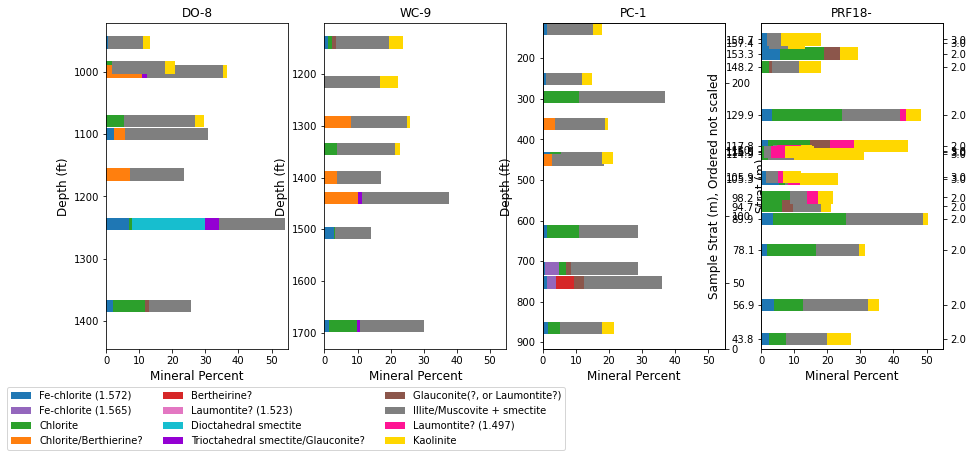

In [33]:
height = 30 #change height of bar, .8 is default, for PC-1
height1 = 30/(245/0.3048)*(1445-922.08720904304437) #for DO-8
height2 = 30/(245/0.3048)*(1732-1101.1402872518622) #for WC-9
height3 = 30/ (245/0.3048)*(165-40)#for PF18-

plt.figure(figsize=(15,6))

ax1 = plt.subplot(141)
p1 = plt.barh(DO8_Data['Depth (ft)', 'Depth (ft)'], DO8_Data['ClayMin%','Fe-chlorite (1.572)'], height1, color='tab:blue')
p2 = plt.barh(DO8_Data['Depth (ft)', 'Depth (ft)'], DO8_Data['ClayMin%','Fe-chlorite (1.565)'], height1,left = DO8_Data['ClayMin%','Fe-chlorite (1.572)'], color='tab:purple')
p3 = plt.barh(DO8_Data['Depth (ft)', 'Depth (ft)'], DO8_Data['ClayMin%','Chlorite'], height1,left = [DO8_Data['ClayMin%','Fe-chlorite (1.572)'][j] + DO8_Data['ClayMin%','Fe-chlorite (1.565)'][j] for j in range(len(DO8_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:green')
p4 = plt.barh(DO8_Data['Depth (ft)', 'Depth (ft)'], DO8_Data['ClayMin%','Chlorite/Berthierine?'], height1,left = 
              [DO8_Data['ClayMin%','Fe-chlorite (1.572)'][j] + DO8_Data['ClayMin%','Fe-chlorite (1.565)'][j] + DO8_Data['ClayMin%','Chlorite'][j] for j in range(len(DO8_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:orange')
p5 = plt.barh(DO8_Data['Depth (ft)', 'Depth (ft)'], DO8_Data['ClayMin%','Bertheirine?'], height1,left = 
              [DO8_Data['ClayMin%','Fe-chlorite (1.572)'][j] + DO8_Data['ClayMin%','Fe-chlorite (1.565)'][j] + DO8_Data['ClayMin%','Chlorite'][j] + 
               DO8_Data['ClayMin%','Chlorite/Berthierine?'][j] for j in range(len(DO8_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:red')
p6 = plt.barh(DO8_Data['Depth (ft)', 'Depth (ft)'], DO8_Data['ClayMin%','Laumontite? (1.523)'], height1,left = 
              [DO8_Data['ClayMin%','Fe-chlorite (1.572)'][j] + DO8_Data['ClayMin%','Fe-chlorite (1.565)'][j] + DO8_Data['ClayMin%','Chlorite'][j] 
               + DO8_Data['ClayMin%','Chlorite/Berthierine?'][j] +DO8_Data['ClayMin%','Bertheirine?'][j] for j in range(len(DO8_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:pink')
p7 = plt.barh(DO8_Data['Depth (ft)', 'Depth (ft)'], DO8_Data['ClayMin%','Dioctahedral smectite'], height1,left = 
              [DO8_Data['ClayMin%','Fe-chlorite (1.572)'][j] + DO8_Data['ClayMin%','Fe-chlorite (1.565)'][j] + DO8_Data['ClayMin%','Chlorite'][j] 
               + DO8_Data['ClayMin%','Chlorite/Berthierine?'][j] +DO8_Data['ClayMin%','Bertheirine?'][j]+DO8_Data['ClayMin%','Laumontite? (1.523)'][j] 
               for j in range(len(DO8_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:cyan')
p8 = plt.barh(DO8_Data['Depth (ft)', 'Depth (ft)'], DO8_Data['ClayMin%','Trioctahedral smectite/Glauconite?'], height1,left = 
              [DO8_Data['ClayMin%','Fe-chlorite (1.572)'][j] + DO8_Data['ClayMin%','Fe-chlorite (1.565)'][j] + DO8_Data['ClayMin%','Chlorite'][j] 
               + DO8_Data['ClayMin%','Chlorite/Berthierine?'][j] +DO8_Data['ClayMin%','Bertheirine?'][j]+DO8_Data['ClayMin%','Laumontite? (1.523)'][j]+
               DO8_Data['ClayMin%','Dioctahedral smectite'][j] for j in range(len(DO8_Data['ClayMin%','Fe-chlorite (1.572)']))], color='darkviolet')
p9 = plt.barh(DO8_Data['Depth (ft)', 'Depth (ft)'], DO8_Data['ClayMin%','Glauconite(?, or Laumontite?)'], height1,left = 
              [DO8_Data['ClayMin%','Fe-chlorite (1.572)'][j] + DO8_Data['ClayMin%','Fe-chlorite (1.565)'][j] + DO8_Data['ClayMin%','Chlorite'][j] 
               + DO8_Data['ClayMin%','Chlorite/Berthierine?'][j] +DO8_Data['ClayMin%','Bertheirine?'][j]+DO8_Data['ClayMin%','Laumontite? (1.523)'][j]+
               DO8_Data['ClayMin%','Dioctahedral smectite'][j] + DO8_Data['ClayMin%','Trioctahedral smectite/Glauconite?'][j] for j in range(len(DO8_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:brown')
p10 = plt.barh(DO8_Data['Depth (ft)', 'Depth (ft)'], DO8_Data['ClayMin%','Illite/Muscovite + smectite'], height1,left = 
              [DO8_Data['ClayMin%','Fe-chlorite (1.572)'][j] + DO8_Data['ClayMin%','Fe-chlorite (1.565)'][j] + DO8_Data['ClayMin%','Chlorite'][j] 
               + DO8_Data['ClayMin%','Chlorite/Berthierine?'][j] +DO8_Data['ClayMin%','Bertheirine?'][j]+DO8_Data['ClayMin%','Laumontite? (1.523)'][j]+
               DO8_Data['ClayMin%','Dioctahedral smectite'][j] + DO8_Data['ClayMin%','Trioctahedral smectite/Glauconite?'][j] +DO8_Data['ClayMin%','Glauconite(?, or Laumontite?)'][j] 
               for j in range(len(DO8_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:gray')
p11 = plt.barh(DO8_Data['Depth (ft)', 'Depth (ft)'], DO8_Data['ClayMin%','Laumontite? (1.497)'], height1,left = 
              [DO8_Data['ClayMin%','Fe-chlorite (1.572)'][j] + DO8_Data['ClayMin%','Fe-chlorite (1.565)'][j] + DO8_Data['ClayMin%','Chlorite'][j] 
               + DO8_Data['ClayMin%','Chlorite/Berthierine?'][j] +DO8_Data['ClayMin%','Bertheirine?'][j]+DO8_Data['ClayMin%','Laumontite? (1.523)'][j]+
               DO8_Data['ClayMin%','Dioctahedral smectite'][j] + DO8_Data['ClayMin%','Trioctahedral smectite/Glauconite?'][j]+DO8_Data['ClayMin%','Glauconite(?, or Laumontite?)'][j]
               +DO8_Data['ClayMin%','Illite/Muscovite + smectite'][j] for j in range(len(DO8_Data['ClayMin%','Fe-chlorite (1.572)']))], color='deeppink')
p12 = plt.barh(DO8_Data['Depth (ft)', 'Depth (ft)'], DO8_Data['ClayMin%','Kaolinite'], height1,left = 
              [DO8_Data['ClayMin%','Fe-chlorite (1.572)'][j] + DO8_Data['ClayMin%','Fe-chlorite (1.565)'][j] + DO8_Data['ClayMin%','Chlorite'][j] 
               + DO8_Data['ClayMin%','Chlorite/Berthierine?'][j] +DO8_Data['ClayMin%','Bertheirine?'][j]+DO8_Data['ClayMin%','Laumontite? (1.523)'][j]+
               DO8_Data['ClayMin%','Dioctahedral smectite'][j] + DO8_Data['ClayMin%','Trioctahedral smectite/Glauconite?'][j]+DO8_Data['ClayMin%','Glauconite(?, or Laumontite?)'][j]+
               DO8_Data['ClayMin%','Illite/Muscovite + smectite'][j]+DO8_Data['ClayMin%','Laumontite? (1.497)'][j] for j in range(len(DO8_Data['ClayMin%','Fe-chlorite (1.572)']))], color='gold')
plt.xlabel('Mineral Percent', fontsize = 'large')
plt.ylabel('Depth (ft)', fontsize = 'large')
plt.title('DO-8')
plt.xlim(0,55)
plt.ylim(1445,922.08720904304437)
# ax7 = ax1.twinx()
# ax7.barh(DO8_Data['Depth (ft)', 'Depth (ft)'], DO8_Data['Bulk','Quartz'], color=[])
# ax7.set_yticks(DO8_Data['Depth (ft)', 'Depth (ft)'])
# ax7.set_yticklabels(DO8_Data['Sample','Sample']) #tried coloring wouldn't work

ax2 = plt.subplot(142)
p1 = plt.barh(WC9_Data['Depth (ft)', 'Depth (ft)'], WC9_Data['ClayMin%','Fe-chlorite (1.572)'], height2, color='tab:blue')
p2 = plt.barh(WC9_Data['Depth (ft)', 'Depth (ft)'], WC9_Data['ClayMin%','Fe-chlorite (1.565)'], height2,left = WC9_Data['ClayMin%','Fe-chlorite (1.572)'], color='tab:purple')
p3 = plt.barh(WC9_Data['Depth (ft)', 'Depth (ft)'], WC9_Data['ClayMin%','Chlorite'], height2,left = [WC9_Data['ClayMin%','Fe-chlorite (1.572)'][j] + WC9_Data['ClayMin%','Fe-chlorite (1.565)'][j] for j in range(len(WC9_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:green')
p4 = plt.barh(WC9_Data['Depth (ft)', 'Depth (ft)'], WC9_Data['ClayMin%','Chlorite/Berthierine?'], height2,left = 
              [WC9_Data['ClayMin%','Fe-chlorite (1.572)'][j] + WC9_Data['ClayMin%','Fe-chlorite (1.565)'][j] + WC9_Data['ClayMin%','Chlorite'][j] for j in range(len(WC9_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:orange')
p5 = plt.barh(WC9_Data['Depth (ft)', 'Depth (ft)'], WC9_Data['ClayMin%','Bertheirine?'], height2,left = 
              [WC9_Data['ClayMin%','Fe-chlorite (1.572)'][j] + WC9_Data['ClayMin%','Fe-chlorite (1.565)'][j] + WC9_Data['ClayMin%','Chlorite'][j] + 
               WC9_Data['ClayMin%','Chlorite/Berthierine?'][j] for j in range(len(WC9_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:red')
p6 = plt.barh(WC9_Data['Depth (ft)', 'Depth (ft)'], WC9_Data['ClayMin%','Laumontite? (1.523)'], height2,left = 
              [WC9_Data['ClayMin%','Fe-chlorite (1.572)'][j] + WC9_Data['ClayMin%','Fe-chlorite (1.565)'][j] + WC9_Data['ClayMin%','Chlorite'][j] 
               + WC9_Data['ClayMin%','Chlorite/Berthierine?'][j] +WC9_Data['ClayMin%','Bertheirine?'][j] for j in range(len(WC9_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:pink')
p7 = plt.barh(WC9_Data['Depth (ft)', 'Depth (ft)'], WC9_Data['ClayMin%','Dioctahedral smectite'], height2,left = 
              [WC9_Data['ClayMin%','Fe-chlorite (1.572)'][j] + WC9_Data['ClayMin%','Fe-chlorite (1.565)'][j] + WC9_Data['ClayMin%','Chlorite'][j] 
               + WC9_Data['ClayMin%','Chlorite/Berthierine?'][j] +WC9_Data['ClayMin%','Bertheirine?'][j]+WC9_Data['ClayMin%','Laumontite? (1.523)'][j] 
               for j in range(len(WC9_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:cyan')
p8 = plt.barh(WC9_Data['Depth (ft)', 'Depth (ft)'], WC9_Data['ClayMin%','Trioctahedral smectite/Glauconite?'], height2,left = 
              [WC9_Data['ClayMin%','Fe-chlorite (1.572)'][j] + WC9_Data['ClayMin%','Fe-chlorite (1.565)'][j] + WC9_Data['ClayMin%','Chlorite'][j] 
               + WC9_Data['ClayMin%','Chlorite/Berthierine?'][j] +WC9_Data['ClayMin%','Bertheirine?'][j]+WC9_Data['ClayMin%','Laumontite? (1.523)'][j]+
               WC9_Data['ClayMin%','Dioctahedral smectite'][j] for j in range(len(WC9_Data['ClayMin%','Fe-chlorite (1.572)']))], color='darkviolet')
p9 = plt.barh(WC9_Data['Depth (ft)', 'Depth (ft)'], WC9_Data['ClayMin%','Glauconite(?, or Laumontite?)'], height2,left = 
              [WC9_Data['ClayMin%','Fe-chlorite (1.572)'][j] + WC9_Data['ClayMin%','Fe-chlorite (1.565)'][j] + WC9_Data['ClayMin%','Chlorite'][j] 
               + WC9_Data['ClayMin%','Chlorite/Berthierine?'][j] +WC9_Data['ClayMin%','Bertheirine?'][j]+WC9_Data['ClayMin%','Laumontite? (1.523)'][j]+
               WC9_Data['ClayMin%','Dioctahedral smectite'][j] + WC9_Data['ClayMin%','Trioctahedral smectite/Glauconite?'][j] for j in range(len(WC9_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:brown')
p10 = plt.barh(WC9_Data['Depth (ft)', 'Depth (ft)'], WC9_Data['ClayMin%','Illite/Muscovite + smectite'], height2,left = 
              [WC9_Data['ClayMin%','Fe-chlorite (1.572)'][j] + WC9_Data['ClayMin%','Fe-chlorite (1.565)'][j] + WC9_Data['ClayMin%','Chlorite'][j] 
               + WC9_Data['ClayMin%','Chlorite/Berthierine?'][j] +WC9_Data['ClayMin%','Bertheirine?'][j]+WC9_Data['ClayMin%','Laumontite? (1.523)'][j]+
               WC9_Data['ClayMin%','Dioctahedral smectite'][j] + WC9_Data['ClayMin%','Trioctahedral smectite/Glauconite?'][j] +WC9_Data['ClayMin%','Glauconite(?, or Laumontite?)'][j] 
               for j in range(len(WC9_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:gray')
p11 = plt.barh(WC9_Data['Depth (ft)', 'Depth (ft)'], WC9_Data['ClayMin%','Laumontite? (1.497)'], height2,left = 
              [WC9_Data['ClayMin%','Fe-chlorite (1.572)'][j] + WC9_Data['ClayMin%','Fe-chlorite (1.565)'][j] + WC9_Data['ClayMin%','Chlorite'][j] 
               + WC9_Data['ClayMin%','Chlorite/Berthierine?'][j] +WC9_Data['ClayMin%','Bertheirine?'][j]+WC9_Data['ClayMin%','Laumontite? (1.523)'][j]+
               WC9_Data['ClayMin%','Dioctahedral smectite'][j] + WC9_Data['ClayMin%','Trioctahedral smectite/Glauconite?'][j]+WC9_Data['ClayMin%','Glauconite(?, or Laumontite?)'][j]
               +WC9_Data['ClayMin%','Illite/Muscovite + smectite'][j] for j in range(len(WC9_Data['ClayMin%','Fe-chlorite (1.572)']))], color='deeppink')
p12 = plt.barh(WC9_Data['Depth (ft)', 'Depth (ft)'], WC9_Data['ClayMin%','Kaolinite'], height2,left = 
              [WC9_Data['ClayMin%','Fe-chlorite (1.572)'][j] + WC9_Data['ClayMin%','Fe-chlorite (1.565)'][j] + WC9_Data['ClayMin%','Chlorite'][j] 
               + WC9_Data['ClayMin%','Chlorite/Berthierine?'][j] +WC9_Data['ClayMin%','Bertheirine?'][j]+WC9_Data['ClayMin%','Laumontite? (1.523)'][j]+
               WC9_Data['ClayMin%','Dioctahedral smectite'][j] + WC9_Data['ClayMin%','Trioctahedral smectite/Glauconite?'][j]+WC9_Data['ClayMin%','Glauconite(?, or Laumontite?)'][j]+
               WC9_Data['ClayMin%','Illite/Muscovite + smectite'][j]+WC9_Data['ClayMin%','Laumontite? (1.497)'][j] for j in range(len(WC9_Data['ClayMin%','Fe-chlorite (1.572)']))], color='gold')
plt.xlabel('Mineral Percent', fontsize = 'large')
plt.ylabel('Depth (ft)', fontsize = 'large')
plt.title('WC-9')
# plt.yticks(WC9_Data['Depth (ft)', 'Depth (ft)'], WC9_Data['Sample','Sample']) #tried coloring wouldn't work
plt.xlim(0,55)
plt.ylim(1732,1101.1402872518622)
# ax5 = ax2.twinx()
# ax5.barh(WC9_Data['Depth (ft)', 'Depth (ft)'], WC9_Data['Bulk','Quartz'], color=[])
# ax5.set_yticks(WC9_Data['Depth (ft)', 'Depth (ft)'])
# ax5.set_yticklabels(WC9_Data['Facies','Facies']) #tried coloring wouldn't work)
# plt.gca().invert_yaxis()

ax3 = plt.subplot(143)
p1 = plt.barh(PC1_Data['Depth (ft)', 'Depth (ft)'], PC1_Data['ClayMin%','Fe-chlorite (1.572)'], height, color='tab:blue')
p2 = plt.barh(PC1_Data['Depth (ft)', 'Depth (ft)'], PC1_Data['ClayMin%','Fe-chlorite (1.565)'], height,left = PC1_Data['ClayMin%','Fe-chlorite (1.572)'], color='tab:purple')
p3 = plt.barh(PC1_Data['Depth (ft)', 'Depth (ft)'], PC1_Data['ClayMin%','Chlorite'], height,left = [PC1_Data['ClayMin%','Fe-chlorite (1.572)'][j] + PC1_Data['ClayMin%','Fe-chlorite (1.565)'][j] for j in range(len(PC1_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:green')
p4 = plt.barh(PC1_Data['Depth (ft)', 'Depth (ft)'], PC1_Data['ClayMin%','Chlorite/Berthierine?'], height,left = 
              [PC1_Data['ClayMin%','Fe-chlorite (1.572)'][j] + PC1_Data['ClayMin%','Fe-chlorite (1.565)'][j] + PC1_Data['ClayMin%','Chlorite'][j] for j in range(len(PC1_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:orange')
p5 = plt.barh(PC1_Data['Depth (ft)', 'Depth (ft)'], PC1_Data['ClayMin%','Bertheirine?'], height,left = 
              [PC1_Data['ClayMin%','Fe-chlorite (1.572)'][j] + PC1_Data['ClayMin%','Fe-chlorite (1.565)'][j] + PC1_Data['ClayMin%','Chlorite'][j] + 
               PC1_Data['ClayMin%','Chlorite/Berthierine?'][j] for j in range(len(PC1_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:red')
p6 = plt.barh(PC1_Data['Depth (ft)', 'Depth (ft)'], PC1_Data['ClayMin%','Laumontite? (1.523)'], height,left = 
              [PC1_Data['ClayMin%','Fe-chlorite (1.572)'][j] + PC1_Data['ClayMin%','Fe-chlorite (1.565)'][j] + PC1_Data['ClayMin%','Chlorite'][j] 
               + PC1_Data['ClayMin%','Chlorite/Berthierine?'][j] +PC1_Data['ClayMin%','Bertheirine?'][j] for j in range(len(PC1_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:pink')
p7 = plt.barh(PC1_Data['Depth (ft)', 'Depth (ft)'], PC1_Data['ClayMin%','Dioctahedral smectite'], height,left = 
              [PC1_Data['ClayMin%','Fe-chlorite (1.572)'][j] + PC1_Data['ClayMin%','Fe-chlorite (1.565)'][j] + PC1_Data['ClayMin%','Chlorite'][j] 
               + PC1_Data['ClayMin%','Chlorite/Berthierine?'][j] +PC1_Data['ClayMin%','Bertheirine?'][j]+PC1_Data['ClayMin%','Laumontite? (1.523)'][j] 
               for j in range(len(PC1_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:cyan')
p8 = plt.barh(PC1_Data['Depth (ft)', 'Depth (ft)'], PC1_Data['ClayMin%','Trioctahedral smectite/Glauconite?'], height,left = 
              [PC1_Data['ClayMin%','Fe-chlorite (1.572)'][j] + PC1_Data['ClayMin%','Fe-chlorite (1.565)'][j] + PC1_Data['ClayMin%','Chlorite'][j] 
               + PC1_Data['ClayMin%','Chlorite/Berthierine?'][j] +PC1_Data['ClayMin%','Bertheirine?'][j]+PC1_Data['ClayMin%','Laumontite? (1.523)'][j]+
               PC1_Data['ClayMin%','Dioctahedral smectite'][j] for j in range(len(PC1_Data['ClayMin%','Fe-chlorite (1.572)']))], color='darkviolet')
p9 = plt.barh(PC1_Data['Depth (ft)', 'Depth (ft)'], PC1_Data['ClayMin%','Glauconite(?, or Laumontite?)'], height,left = 
              [PC1_Data['ClayMin%','Fe-chlorite (1.572)'][j] + PC1_Data['ClayMin%','Fe-chlorite (1.565)'][j] + PC1_Data['ClayMin%','Chlorite'][j] 
               + PC1_Data['ClayMin%','Chlorite/Berthierine?'][j] +PC1_Data['ClayMin%','Bertheirine?'][j]+PC1_Data['ClayMin%','Laumontite? (1.523)'][j]+
               PC1_Data['ClayMin%','Dioctahedral smectite'][j] + PC1_Data['ClayMin%','Trioctahedral smectite/Glauconite?'][j] for j in range(len(PC1_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:brown')
p10 = plt.barh(PC1_Data['Depth (ft)', 'Depth (ft)'], PC1_Data['ClayMin%','Illite/Muscovite + smectite'], height,left = 
              [PC1_Data['ClayMin%','Fe-chlorite (1.572)'][j] + PC1_Data['ClayMin%','Fe-chlorite (1.565)'][j] + PC1_Data['ClayMin%','Chlorite'][j] 
               + PC1_Data['ClayMin%','Chlorite/Berthierine?'][j] +PC1_Data['ClayMin%','Bertheirine?'][j]+PC1_Data['ClayMin%','Laumontite? (1.523)'][j]+
               PC1_Data['ClayMin%','Dioctahedral smectite'][j] + PC1_Data['ClayMin%','Trioctahedral smectite/Glauconite?'][j] +PC1_Data['ClayMin%','Glauconite(?, or Laumontite?)'][j] 
               for j in range(len(PC1_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:gray')
p11 = plt.barh(PC1_Data['Depth (ft)', 'Depth (ft)'], PC1_Data['ClayMin%','Laumontite? (1.497)'], height,left = 
              [PC1_Data['ClayMin%','Fe-chlorite (1.572)'][j] + PC1_Data['ClayMin%','Fe-chlorite (1.565)'][j] + PC1_Data['ClayMin%','Chlorite'][j] 
               + PC1_Data['ClayMin%','Chlorite/Berthierine?'][j] +PC1_Data['ClayMin%','Bertheirine?'][j]+PC1_Data['ClayMin%','Laumontite? (1.523)'][j]+
               PC1_Data['ClayMin%','Dioctahedral smectite'][j] + PC1_Data['ClayMin%','Trioctahedral smectite/Glauconite?'][j]+PC1_Data['ClayMin%','Glauconite(?, or Laumontite?)'][j]
               +PC1_Data['ClayMin%','Illite/Muscovite + smectite'][j] for j in range(len(PC1_Data['ClayMin%','Fe-chlorite (1.572)']))], color='deeppink')
p12 = plt.barh(PC1_Data['Depth (ft)', 'Depth (ft)'], PC1_Data['ClayMin%','Kaolinite'], height,left = 
              [PC1_Data['ClayMin%','Fe-chlorite (1.572)'][j] + PC1_Data['ClayMin%','Fe-chlorite (1.565)'][j] + PC1_Data['ClayMin%','Chlorite'][j] 
               + PC1_Data['ClayMin%','Chlorite/Berthierine?'][j] +PC1_Data['ClayMin%','Bertheirine?'][j]+PC1_Data['ClayMin%','Laumontite? (1.523)'][j]+
               PC1_Data['ClayMin%','Dioctahedral smectite'][j] + PC1_Data['ClayMin%','Trioctahedral smectite/Glauconite?'][j]+PC1_Data['ClayMin%','Glauconite(?, or Laumontite?)'][j]+
               PC1_Data['ClayMin%','Illite/Muscovite + smectite'][j]+PC1_Data['ClayMin%','Laumontite? (1.497)'][j] for j in range(len(PC1_Data['ClayMin%','Fe-chlorite (1.572)']))], color='gold')
plt.xlabel('Mineral Percent', fontsize = 'large')
plt.ylabel('Depth (ft)', fontsize = 'large')
plt.title('PC-1')
# plt.yticks(PC1_Data['Depth (ft)', 'Depth (ft)'], PC1_Data['Sample','Sample']) #tried coloring wouldn't work
plt.xlim(0,55)
plt.ylim(917,113.19422572178485)
ax6 = ax3.twinx()
ax6.set_ylabel('Strat (m)', fontsize = 'large')
ax6.set_ylim(0,245)
# ax6 = ax3.twinx()
# ax6.barh(PC1_Data['Depth (ft)', 'Depth (ft)'], PC1_Data['Bulk','Quartz'], color=[])
# ax6.set_yticks(PC1_Data['Depth (ft)', 'Depth (ft)'])
# ax6.set_yticklabels(PC1_Data['Facies','Facies']) #tried coloring wouldn't work)
# plt.gca().invert_yaxis()

ax4 = plt.subplot(144)
p1 = plt.barh(PRF18_Data['Strat (m)', 'Strat (m)'], PRF18_Data['ClayMin%','Fe-chlorite (1.572)'], height3, color='tab:blue')
p2 = plt.barh(PRF18_Data['Strat (m)', 'Strat (m)'], PRF18_Data['ClayMin%','Fe-chlorite (1.565)'], height3,left = PRF18_Data['ClayMin%','Fe-chlorite (1.572)'], color='tab:purple')
p3 = plt.barh(PRF18_Data['Strat (m)', 'Strat (m)'], PRF18_Data['ClayMin%','Chlorite'], height3,left = [PRF18_Data['ClayMin%','Fe-chlorite (1.572)'][j] + PRF18_Data['ClayMin%','Fe-chlorite (1.565)'][j] for j in range(len(PRF18_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:green')
p4 = plt.barh(PRF18_Data['Strat (m)', 'Strat (m)'], PRF18_Data['ClayMin%','Chlorite/Berthierine?'], height3,left = 
              [PRF18_Data['ClayMin%','Fe-chlorite (1.572)'][j] + PRF18_Data['ClayMin%','Fe-chlorite (1.565)'][j] + PRF18_Data['ClayMin%','Chlorite'][j] for j in range(len(PRF18_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:orange')
p5 = plt.barh(PRF18_Data['Strat (m)', 'Strat (m)'], PRF18_Data['ClayMin%','Bertheirine?'], height3,left = 
              [PRF18_Data['ClayMin%','Fe-chlorite (1.572)'][j] + PRF18_Data['ClayMin%','Fe-chlorite (1.565)'][j] + PRF18_Data['ClayMin%','Chlorite'][j] + 
               PRF18_Data['ClayMin%','Chlorite/Berthierine?'][j] for j in range(len(PRF18_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:red')
p6 = plt.barh(PRF18_Data['Strat (m)', 'Strat (m)'], PRF18_Data['ClayMin%','Laumontite? (1.523)'], height3,left = 
              [PRF18_Data['ClayMin%','Fe-chlorite (1.572)'][j] + PRF18_Data['ClayMin%','Fe-chlorite (1.565)'][j] + PRF18_Data['ClayMin%','Chlorite'][j] 
               + PRF18_Data['ClayMin%','Chlorite/Berthierine?'][j] +PRF18_Data['ClayMin%','Bertheirine?'][j] for j in range(len(PRF18_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:pink')
p7 = plt.barh(PRF18_Data['Strat (m)', 'Strat (m)'], PRF18_Data['ClayMin%','Dioctahedral smectite'], height3,left = 
              [PRF18_Data['ClayMin%','Fe-chlorite (1.572)'][j] + PRF18_Data['ClayMin%','Fe-chlorite (1.565)'][j] + PRF18_Data['ClayMin%','Chlorite'][j] 
               + PRF18_Data['ClayMin%','Chlorite/Berthierine?'][j] +PRF18_Data['ClayMin%','Bertheirine?'][j]+PRF18_Data['ClayMin%','Laumontite? (1.523)'][j] 
               for j in range(len(PRF18_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:cyan')
p8 = plt.barh(PRF18_Data['Strat (m)', 'Strat (m)'], PRF18_Data['ClayMin%','Trioctahedral smectite/Glauconite?'], height3,left = 
              [PRF18_Data['ClayMin%','Fe-chlorite (1.572)'][j] + PRF18_Data['ClayMin%','Fe-chlorite (1.565)'][j] + PRF18_Data['ClayMin%','Chlorite'][j] 
               + PRF18_Data['ClayMin%','Chlorite/Berthierine?'][j] +PRF18_Data['ClayMin%','Bertheirine?'][j]+PRF18_Data['ClayMin%','Laumontite? (1.523)'][j]+
               PRF18_Data['ClayMin%','Dioctahedral smectite'][j] for j in range(len(PRF18_Data['ClayMin%','Fe-chlorite (1.572)']))], color='darkviolet')
p9 = plt.barh(PRF18_Data['Strat (m)', 'Strat (m)'], PRF18_Data['ClayMin%','Glauconite(?, or Laumontite?)'], height3,left = 
              [PRF18_Data['ClayMin%','Fe-chlorite (1.572)'][j] + PRF18_Data['ClayMin%','Fe-chlorite (1.565)'][j] + PRF18_Data['ClayMin%','Chlorite'][j] 
               + PRF18_Data['ClayMin%','Chlorite/Berthierine?'][j] +PRF18_Data['ClayMin%','Bertheirine?'][j]+PRF18_Data['ClayMin%','Laumontite? (1.523)'][j]+
               PRF18_Data['ClayMin%','Dioctahedral smectite'][j] + PRF18_Data['ClayMin%','Trioctahedral smectite/Glauconite?'][j] for j in range(len(PRF18_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:brown')
p10 = plt.barh(PRF18_Data['Strat (m)', 'Strat (m)'], PRF18_Data['ClayMin%','Illite/Muscovite + smectite'], height3,left = 
              [PRF18_Data['ClayMin%','Fe-chlorite (1.572)'][j] + PRF18_Data['ClayMin%','Fe-chlorite (1.565)'][j] + PRF18_Data['ClayMin%','Chlorite'][j] 
               + PRF18_Data['ClayMin%','Chlorite/Berthierine?'][j] +PRF18_Data['ClayMin%','Bertheirine?'][j]+PRF18_Data['ClayMin%','Laumontite? (1.523)'][j]+
               PRF18_Data['ClayMin%','Dioctahedral smectite'][j] + PRF18_Data['ClayMin%','Trioctahedral smectite/Glauconite?'][j] +PRF18_Data['ClayMin%','Glauconite(?, or Laumontite?)'][j] 
               for j in range(len(PRF18_Data['ClayMin%','Fe-chlorite (1.572)']))], color='tab:gray')
p11 = plt.barh(PRF18_Data['Strat (m)', 'Strat (m)'], PRF18_Data['ClayMin%','Laumontite? (1.497)'], height3,left = 
              [PRF18_Data['ClayMin%','Fe-chlorite (1.572)'][j] + PRF18_Data['ClayMin%','Fe-chlorite (1.565)'][j] + PRF18_Data['ClayMin%','Chlorite'][j] 
               + PRF18_Data['ClayMin%','Chlorite/Berthierine?'][j] +PRF18_Data['ClayMin%','Bertheirine?'][j]+PRF18_Data['ClayMin%','Laumontite? (1.523)'][j]+
               PRF18_Data['ClayMin%','Dioctahedral smectite'][j] + PRF18_Data['ClayMin%','Trioctahedral smectite/Glauconite?'][j]+PRF18_Data['ClayMin%','Glauconite(?, or Laumontite?)'][j]
               +PRF18_Data['ClayMin%','Illite/Muscovite + smectite'][j] for j in range(len(PRF18_Data['ClayMin%','Fe-chlorite (1.572)']))], color='deeppink')
p12 = plt.barh(PRF18_Data['Strat (m)', 'Strat (m)'], PRF18_Data['ClayMin%','Kaolinite'], height3,left = 
              [PRF18_Data['ClayMin%','Fe-chlorite (1.572)'][j] + PRF18_Data['ClayMin%','Fe-chlorite (1.565)'][j] + PRF18_Data['ClayMin%','Chlorite'][j] 
               + PRF18_Data['ClayMin%','Chlorite/Berthierine?'][j] +PRF18_Data['ClayMin%','Bertheirine?'][j]+PRF18_Data['ClayMin%','Laumontite? (1.523)'][j]+
               PRF18_Data['ClayMin%','Dioctahedral smectite'][j] + PRF18_Data['ClayMin%','Trioctahedral smectite/Glauconite?'][j]+PRF18_Data['ClayMin%','Glauconite(?, or Laumontite?)'][j]+
               PRF18_Data['ClayMin%','Illite/Muscovite + smectite'][j]+PRF18_Data['ClayMin%','Laumontite? (1.497)'][j] for j in range(len(PRF18_Data['ClayMin%','Fe-chlorite (1.572)']))], color='gold')
plt.xlabel('Mineral Percent', fontsize = 'large')
plt.ylabel('Sample Strat (m), Ordered not scaled', fontsize = 'large')
plt.title('PRF18-')
plt.yticks(PRF18_Data['Strat (m)', 'Strat (m)']) #tried coloring wouldn't work
plt.xlim(0,55)
plt.ylim (40,165)
#plt.gca().invert_yaxis()
#Add facies calls
ax8 = ax4.twinx()
ax8.set_yticks(PRF18_Data['Strat (m)', 'Strat (m)'])
# ax8.barh(PRF18_Data['Depth (ft)', 'Depth (ft)'], PRF18_Data['Bulk','Quartz'], color=[])
ax8.set_yticklabels(PRF18_Data['Facies','Facies']) #tried coloring wouldn't work)
ax8.set_ylim (40,165)
# plt.gca().invert_yaxis()

plt.legend((p1[0], p2[0], p3[0],p4[0],p5[0], p6[0], p7[0], p8[0], p9[0],p10[0],p11[0],p12[0]), DO8_Data['ClayMin%'].columns, bbox_to_anchor=(-1.05, -0.1),ncol=3)


plt.tight_layout()
# plt.savefig('code_output/XRDClayMin%Analysis_Comp.svg')
plt.savefig('code_output/XRDClayMin%Analysis_Comp_Depth.pdf')
plt.show()

# Facies Comparisons

In [34]:
Data_Facies1 = DataComp[DataComp['Facies','Facies'] == 1]
Data_Facies1.reset_index(drop=True,inplace=True)
Data_Facies2 = DataComp[DataComp['Facies','Facies'] == 2]
Data_Facies2.reset_index(drop=True,inplace=True)
Data_Facies3 = DataComp[DataComp['Facies','Facies'] == 3]
Data_Facies3.reset_index(drop=True,inplace=True)

In [35]:
BulkChlorite = [Data_Facies1['Bulk','Chlorite'], Data_Facies2['Bulk','Chlorite'],Data_Facies3['Bulk','Chlorite']]
BulkMuscovite = [Data_Facies1['Bulk','Muscovite'], Data_Facies2['Bulk','Muscovite'],Data_Facies3['Bulk','Muscovite']]
BulkIllite = [Data_Facies1['Bulk','Illite/Smectite'], Data_Facies2['Bulk','Illite/Smectite'],Data_Facies3['Bulk','Illite/Smectite']]
BulkKaolinite = [Data_Facies1['Bulk','Kaolinite'], Data_Facies2['Bulk','Kaolinite'],Data_Facies3['Bulk','Kaolinite']]
Bulksubtotal = [Data_Facies1['Bulk','Clay Subtotal'], Data_Facies2['Bulk','Clay Subtotal'],Data_Facies3['Bulk','Clay Subtotal']]
ClaypeelChlorite = [Data_Facies1['claypeel','Chlorite'], Data_Facies2['claypeel','Chlorite'],Data_Facies3['claypeel','Chlorite']]
ClaypeelIllite = [Data_Facies1['claypeel','Illite/Smectite'], Data_Facies2['claypeel','Illite/Smectite'],Data_Facies3['claypeel','Illite/Smectite']]
Claypeelsubtotal = [Data_Facies1['claypeel','Illite/Smectite']+Data_Facies1['claypeel','Chlorite'], 
                    Data_Facies2['claypeel','Illite/Smectite']+Data_Facies2['claypeel','Chlorite'],
                   Data_Facies3['claypeel','Illite/Smectite']+Data_Facies3['claypeel','Chlorite']]
HAChlorite_all = [Data_Facies1['ClayMin%','Fe-chlorite (1.572)']+Data_Facies1['ClayMin%','Fe-chlorite (1.565)']+Data_Facies1['ClayMin%','Chlorite']+Data_Facies1['ClayMin%','Chlorite/Berthierine?']+Data_Facies1['ClayMin%','Bertheirine?'],
                 Data_Facies2['ClayMin%','Fe-chlorite (1.572)']+Data_Facies2['ClayMin%','Fe-chlorite (1.565)']+Data_Facies2['ClayMin%','Chlorite']+Data_Facies2['ClayMin%','Chlorite/Berthierine?']+Data_Facies2['ClayMin%','Bertheirine?'],
                 Data_Facies3['ClayMin%','Fe-chlorite (1.572)']+Data_Facies3['ClayMin%','Fe-chlorite (1.565)']+Data_Facies3['ClayMin%','Chlorite']+Data_Facies3['ClayMin%','Chlorite/Berthierine?']+Data_Facies3['ClayMin%','Bertheirine?']]
HAMica_all = [Data_Facies1['ClayMin%','Dioctahedral smectite']+Data_Facies1['ClayMin%','Trioctahedral smectite/Glauconite?']+Data_Facies1['ClayMin%','Glauconite(?, or Laumontite?)']+Data_Facies1['ClayMin%','Illite/Muscovite + smectite'],
              Data_Facies2['ClayMin%','Dioctahedral smectite']+Data_Facies2['ClayMin%','Trioctahedral smectite/Glauconite?']+Data_Facies2['ClayMin%','Glauconite(?, or Laumontite?)']+Data_Facies2['ClayMin%','Illite/Muscovite + smectite'],
              Data_Facies3['ClayMin%','Dioctahedral smectite']+Data_Facies3['ClayMin%','Trioctahedral smectite/Glauconite?']+Data_Facies3['ClayMin%','Glauconite(?, or Laumontite?)']+Data_Facies3['ClayMin%','Illite/Muscovite + smectite']]
HAIllite_Smectite = [Data_Facies1['ClayMin%','Dioctahedral smectite']+Data_Facies1['ClayMin%','Trioctahedral smectite/Glauconite?']+Data_Facies1['ClayMin%','Illite/Muscovite + smectite'],
              Data_Facies2['ClayMin%','Dioctahedral smectite']+Data_Facies2['ClayMin%','Trioctahedral smectite/Glauconite?']+Data_Facies2['ClayMin%','Illite/Muscovite + smectite'],
              Data_Facies3['ClayMin%','Dioctahedral smectite']+Data_Facies3['ClayMin%','Trioctahedral smectite/Glauconite?']+Data_Facies3['ClayMin%','Illite/Muscovite + smectite']]
HASmectiteUniq = [Data_Facies1['ClayMin%','Dioctahedral smectite']+Data_Facies1['ClayMin%','Trioctahedral smectite/Glauconite?'],
              Data_Facies2['ClayMin%','Dioctahedral smectite']+Data_Facies2['ClayMin%','Trioctahedral smectite/Glauconite?'],
              Data_Facies3['ClayMin%','Dioctahedral smectite']+Data_Facies3['ClayMin%','Trioctahedral smectite/Glauconite?']]
HAIllite = [Data_Facies1['ClayMin%','Illite/Muscovite + smectite'],Data_Facies2['ClayMin%','Illite/Muscovite + smectite'],Data_Facies3['ClayMin%','Illite/Muscovite + smectite']]
HAKaolinite = [Data_Facies1['ClayMin%','Kaolinite'],Data_Facies2['ClayMin%','Kaolinite'],Data_Facies3['ClayMin%','Kaolinite']]
HAGlauconite = [Data_Facies1['ClayMin%','Trioctahedral smectite/Glauconite?']+Data_Facies1['ClayMin%','Glauconite(?, or Laumontite?)'],
              Data_Facies2['ClayMin%','Trioctahedral smectite/Glauconite?']+Data_Facies2['ClayMin%','Glauconite(?, or Laumontite?)'],
              Data_Facies3['ClayMin%','Trioctahedral smectite/Glauconite?']+Data_Facies3['ClayMin%','Glauconite(?, or Laumontite?)']]
HAFeChlorite_all = [Data_Facies1['ClayMin%','Fe-chlorite (1.572)']+Data_Facies1['ClayMin%','Fe-chlorite (1.565)']+Data_Facies1['ClayMin%','Chlorite/Berthierine?']+Data_Facies1['ClayMin%','Bertheirine?'],
                 Data_Facies2['ClayMin%','Fe-chlorite (1.572)']+Data_Facies2['ClayMin%','Fe-chlorite (1.565)']+Data_Facies2['ClayMin%','Chlorite/Berthierine?']+Data_Facies2['ClayMin%','Bertheirine?'],
                 Data_Facies3['ClayMin%','Fe-chlorite (1.572)']+Data_Facies3['ClayMin%','Fe-chlorite (1.565)']+Data_Facies3['ClayMin%','Chlorite/Berthierine?']+Data_Facies3['ClayMin%','Bertheirine?']]
HAFeChlorite = [Data_Facies1['ClayMin%','Fe-chlorite (1.572)']+Data_Facies1['ClayMin%','Fe-chlorite (1.565)'],
                 Data_Facies2['ClayMin%','Fe-chlorite (1.572)']+Data_Facies2['ClayMin%','Fe-chlorite (1.565)'],
                 Data_Facies3['ClayMin%','Fe-chlorite (1.572)']+Data_Facies3['ClayMin%','Fe-chlorite (1.565)']]
HABerthierine = [Data_Facies1['ClayMin%','Chlorite/Berthierine?']+Data_Facies1['ClayMin%','Bertheirine?'],
                 Data_Facies2['ClayMin%','Chlorite/Berthierine?']+Data_Facies2['ClayMin%','Bertheirine?'],
                 Data_Facies3['ClayMin%','Chlorite/Berthierine?']+Data_Facies3['ClayMin%','Bertheirine?']]
HAChlorite_Specific = [Data_Facies1['ClayMin%','Chlorite'],Data_Facies2['ClayMin%','Chlorite'],Data_Facies3['ClayMin%','Chlorite']]


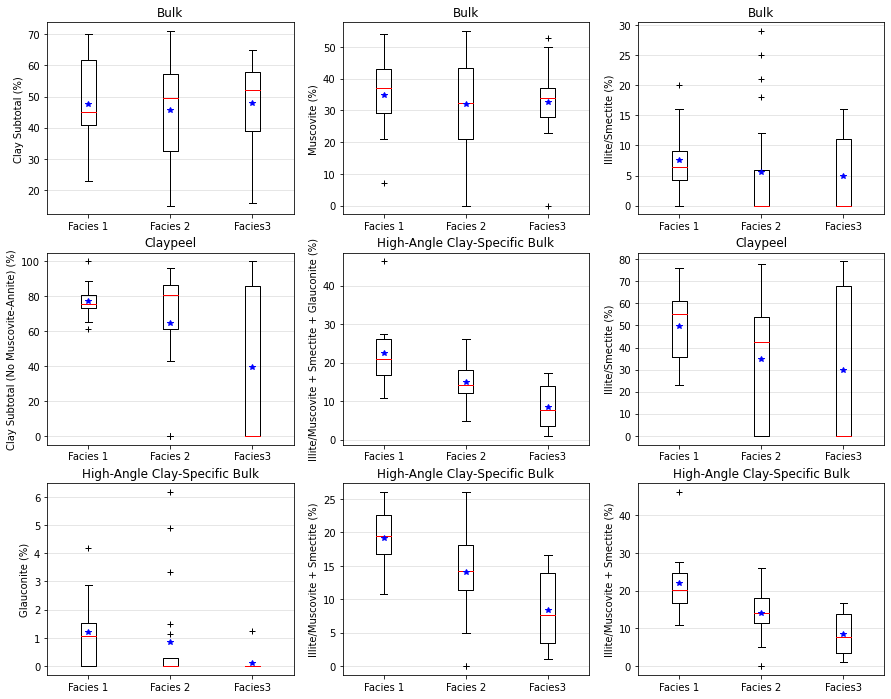

In [36]:
N = 2 #create Indices, change based on number plotting
ind = np.arange(N) # the x locations for the groups
width = 0.2 # the width of the bars, .8 is the default
labels = ['Facies 1', 'Facies 2', 'Facies3']

plt.figure(figsize=(15,12))
ax0 = plt.subplot(331)
ax0.boxplot(Bulksubtotal, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax0.set_ylabel('Clay Subtotal (%)')
ax0.set_title('Bulk')
ax0.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax1 = plt.subplot(332)
ax1.boxplot(BulkMuscovite, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax1.set_ylabel('Muscovite (%)')
ax1.set_title('Bulk')
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax2 = plt.subplot(333)
ax2.boxplot(BulkIllite, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax2.set_ylabel('Illite/Smectite (%)')
ax2.set_title('Bulk')
ax2.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax3 = plt.subplot(334)
ax3.boxplot(Claypeelsubtotal, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax3.set_ylabel('Clay Subtotal (No Muscovite-Annite) (%)')
ax3.set_title('Claypeel')
ax3.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax5 = plt.subplot(335)
ax5.boxplot(HAMica_all, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax5.set_ylabel('Illite/Muscovite + Smectite + Glauconite (%)')
ax5.set_title('High-Angle Clay-Specific Bulk')
ax5.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax4 = plt.subplot(336)
ax4.boxplot(ClaypeelIllite, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax4.set_ylabel('Illite/Smectite (%)')
ax4.set_title('Claypeel')
ax4.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax6 = plt.subplot(337)
ax6.boxplot(HAGlauconite, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax6.set_ylabel('Glauconite (%)')
ax6.set_title('High-Angle Clay-Specific Bulk')
ax6.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax6 = plt.subplot(338)
ax6.boxplot(HAIllite, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax6.set_ylabel('Illite/Muscovite + Smectite (%)')
ax6.set_title('High-Angle Clay-Specific Bulk')
ax6.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax8 = plt.subplot(3,3,9)
ax8.boxplot(HAIllite_Smectite, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax8.set_ylabel('Illite/Muscovite + Smectite (%)')
ax8.set_title('High-Angle Clay-Specific Bulk')
ax8.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

#plt.savefig('code_output/code_output/Bargraph&Boxplots_both.pdf')
plt.show()

Digging into Chlorites

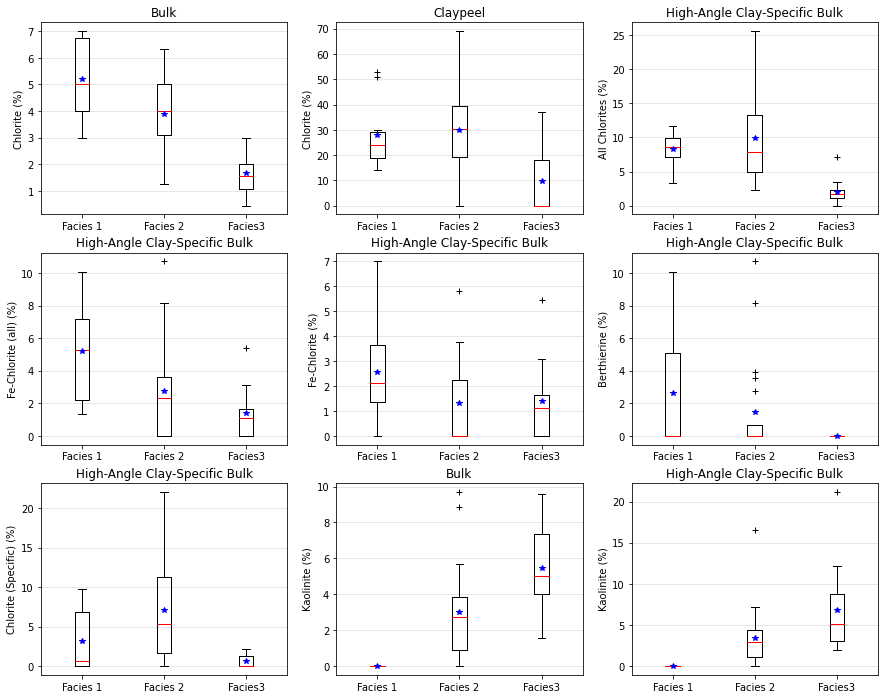

In [37]:
N = 2 #create Indices, change based on number plotting
ind = np.arange(N) # the x locations for the groups
width = 0.2 # the width of the bars, .8 is the default
labels = ['Facies 1', 'Facies 2', 'Facies3']

plt.figure(figsize=(15,12))
ax0 = plt.subplot(331)
ax0.boxplot(BulkChlorite, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax0.set_ylabel('Chlorite (%)')
ax0.set_title('Bulk')
ax0.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax2 = plt.subplot(332)
ax2.boxplot(ClaypeelChlorite, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax2.set_ylabel('Chlorite (%)')
ax2.set_title('Claypeel')
ax2.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax3 = plt.subplot(333)
ax3.boxplot(HAChlorite_all, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax3.set_ylabel('All Chlorites (%)')
ax3.set_title('High-Angle Clay-Specific Bulk')
ax3.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax4 = plt.subplot(334)
ax4.boxplot(HAFeChlorite_all, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax4.set_ylabel('Fe-Chlorite (all) (%)')
ax4.set_title('High-Angle Clay-Specific Bulk')
ax4.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax5 = plt.subplot(335)
ax5.boxplot(HAFeChlorite, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax5.set_ylabel('Fe-Chlorite (%)')
ax5.set_title('High-Angle Clay-Specific Bulk')
ax5.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax6 = plt.subplot(336)
ax6.boxplot(HABerthierine, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax6.set_ylabel('Berthierine (%)')
ax6.set_title('High-Angle Clay-Specific Bulk')
ax6.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax7 = plt.subplot(337)
ax7.boxplot(HAChlorite_Specific, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax7.set_ylabel('Chlorite (Specific) (%)')
ax7.set_title('High-Angle Clay-Specific Bulk')
ax7.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax8 = plt.subplot(3,3,8)
ax8.boxplot(BulkKaolinite, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax8.set_ylabel('Kaolinite (%)')
ax8.set_title('Bulk')
ax8.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax8 = plt.subplot(3,3,9)
ax8.boxplot(HAKaolinite, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax8.set_ylabel('Kaolinite (%)')
ax8.set_title('High-Angle Clay-Specific Bulk')
ax8.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

#plt.savefig('code_output/code_output/Bargraph&Boxplots_both.pdf')
plt.show()

# Site Comparisons

First all facies/samples

In [38]:
BulkChlorite2 = [DO8_Data['Bulk','Chlorite'], WC9_Data['Bulk','Chlorite'],PC1_Data['Bulk','Chlorite'],PRF18_Data['Bulk','Chlorite']]
BulkMuscovite2 = [DO8_Data['Bulk','Muscovite'], WC9_Data['Bulk','Muscovite'],PC1_Data['Bulk','Muscovite'],PRF18_Data['Bulk','Muscovite']]
BulkIllite2 = [DO8_Data['Bulk','Illite/Smectite'], WC9_Data['Bulk','Illite/Smectite'],PC1_Data['Bulk','Illite/Smectite'],PRF18_Data['Bulk','Illite/Smectite']]
Bulksubtotal2 = [DO8_Data['Bulk','Clay Subtotal'], WC9_Data['Bulk','Clay Subtotal'],PC1_Data['Bulk','Clay Subtotal'],PRF18_Data['Bulk','Clay Subtotal']]
BulkKaolinite2 = [DO8_Data['Bulk','Kaolinite'], WC9_Data['Bulk','Kaolinite'],PC1_Data['Bulk','Kaolinite'],PRF18_Data['Bulk','Kaolinite']]
ClaypeelChlorite2 = [DO8_Data['claypeel','Chlorite'], WC9_Data['claypeel','Chlorite'],PC1_Data['claypeel','Chlorite'],PRF18_Data['claypeel','Chlorite']]
ClaypeelIllite2 = [DO8_Data['claypeel','Illite/Smectite'], WC9_Data['claypeel','Illite/Smectite'],PC1_Data['claypeel','Illite/Smectite'],PRF18_Data['claypeel','Illite/Smectite']]
Claypeelsubtotal2 = [DO8_Data['claypeel','Illite/Smectite']+DO8_Data['claypeel','Chlorite'], 
                    WC9_Data['claypeel','Illite/Smectite']+WC9_Data['claypeel','Chlorite'],
                   PC1_Data['claypeel','Illite/Smectite']+PC1_Data['claypeel','Chlorite'],
                   PRF18_Data['claypeel','Illite/Smectite']+PRF18_Data['claypeel','Chlorite']]
HAChlorite_all2 = [DO8_Data['ClayMin%','Fe-chlorite (1.572)']+DO8_Data['ClayMin%','Fe-chlorite (1.565)']+DO8_Data['ClayMin%','Chlorite']+DO8_Data['ClayMin%','Chlorite/Berthierine?']+DO8_Data['ClayMin%','Bertheirine?'],
                 WC9_Data['ClayMin%','Fe-chlorite (1.572)']+WC9_Data['ClayMin%','Fe-chlorite (1.565)']+WC9_Data['ClayMin%','Chlorite']+WC9_Data['ClayMin%','Chlorite/Berthierine?']+WC9_Data['ClayMin%','Bertheirine?'],
                 PC1_Data['ClayMin%','Fe-chlorite (1.572)']+PC1_Data['ClayMin%','Fe-chlorite (1.565)']+PC1_Data['ClayMin%','Chlorite']+PC1_Data['ClayMin%','Chlorite/Berthierine?']+PC1_Data['ClayMin%','Bertheirine?'],
                   PRF18_Data['ClayMin%','Fe-chlorite (1.572)']+PRF18_Data['ClayMin%','Fe-chlorite (1.565)']+PRF18_Data['ClayMin%','Chlorite']+PRF18_Data['ClayMin%','Chlorite/Berthierine?']+PRF18_Data['ClayMin%','Bertheirine?']]
HAMica_all2 = [DO8_Data['ClayMin%','Dioctahedral smectite']+DO8_Data['ClayMin%','Trioctahedral smectite/Glauconite?']+DO8_Data['ClayMin%','Glauconite(?, or Laumontite?)']+DO8_Data['ClayMin%','Illite/Muscovite + smectite'],
              WC9_Data['ClayMin%','Dioctahedral smectite']+WC9_Data['ClayMin%','Trioctahedral smectite/Glauconite?']+WC9_Data['ClayMin%','Glauconite(?, or Laumontite?)']+WC9_Data['ClayMin%','Illite/Muscovite + smectite'],
              PC1_Data['ClayMin%','Dioctahedral smectite']+PC1_Data['ClayMin%','Trioctahedral smectite/Glauconite?']+PC1_Data['ClayMin%','Glauconite(?, or Laumontite?)']+PC1_Data['ClayMin%','Illite/Muscovite + smectite'],
               PRF18_Data['ClayMin%','Dioctahedral smectite']+PRF18_Data['ClayMin%','Trioctahedral smectite/Glauconite?']+PRF18_Data['ClayMin%','Glauconite(?, or Laumontite?)']+PRF18_Data['ClayMin%','Illite/Muscovite + smectite']]
HAIllite_Smectite2 = [DO8_Data['ClayMin%','Dioctahedral smectite']+DO8_Data['ClayMin%','Trioctahedral smectite/Glauconite?']+DO8_Data['ClayMin%','Illite/Muscovite + smectite'],
              WC9_Data['ClayMin%','Dioctahedral smectite']+WC9_Data['ClayMin%','Trioctahedral smectite/Glauconite?']+WC9_Data['ClayMin%','Illite/Muscovite + smectite'],
              PC1_Data['ClayMin%','Dioctahedral smectite']+PC1_Data['ClayMin%','Trioctahedral smectite/Glauconite?']+PC1_Data['ClayMin%','Illite/Muscovite + smectite'],
                      PRF18_Data['ClayMin%','Dioctahedral smectite']+PRF18_Data['ClayMin%','Trioctahedral smectite/Glauconite?']+PRF18_Data['ClayMin%','Illite/Muscovite + smectite']]
HASmectiteUniq2 = [DO8_Data['ClayMin%','Dioctahedral smectite']+DO8_Data['ClayMin%','Trioctahedral smectite/Glauconite?'],
              WC9_Data['ClayMin%','Dioctahedral smectite']+WC9_Data['ClayMin%','Trioctahedral smectite/Glauconite?'],
              PC1_Data['ClayMin%','Dioctahedral smectite']+PC1_Data['ClayMin%','Trioctahedral smectite/Glauconite?'],
                   PRF18_Data['ClayMin%','Dioctahedral smectite']+PRF18_Data['ClayMin%','Trioctahedral smectite/Glauconite?']]
HAIllite2 = [DO8_Data['ClayMin%','Illite/Muscovite + smectite'],WC9_Data['ClayMin%','Illite/Muscovite + smectite'],
             PC1_Data['ClayMin%','Illite/Muscovite + smectite'],PRF18_Data['ClayMin%','Illite/Muscovite + smectite']]
HAGlauconite2 = [DO8_Data['ClayMin%','Trioctahedral smectite/Glauconite?']+DO8_Data['ClayMin%','Glauconite(?, or Laumontite?)'],
              WC9_Data['ClayMin%','Trioctahedral smectite/Glauconite?']+WC9_Data['ClayMin%','Glauconite(?, or Laumontite?)'],
              PC1_Data['ClayMin%','Trioctahedral smectite/Glauconite?']+PC1_Data['ClayMin%','Glauconite(?, or Laumontite?)'],
                 PRF18_Data['ClayMin%','Trioctahedral smectite/Glauconite?']+PRF18_Data['ClayMin%','Glauconite(?, or Laumontite?)']]
HAFeChlorite_all2 = [DO8_Data['ClayMin%','Fe-chlorite (1.572)']+DO8_Data['ClayMin%','Fe-chlorite (1.565)']+DO8_Data['ClayMin%','Chlorite/Berthierine?']+DO8_Data['ClayMin%','Bertheirine?'],
                 WC9_Data['ClayMin%','Fe-chlorite (1.572)']+WC9_Data['ClayMin%','Fe-chlorite (1.565)']+WC9_Data['ClayMin%','Chlorite/Berthierine?']+WC9_Data['ClayMin%','Bertheirine?'],
                 PC1_Data['ClayMin%','Fe-chlorite (1.572)']+PC1_Data['ClayMin%','Fe-chlorite (1.565)']+PC1_Data['ClayMin%','Chlorite/Berthierine?']+PC1_Data['ClayMin%','Bertheirine?'],
                     PRF18_Data['ClayMin%','Fe-chlorite (1.572)']+PRF18_Data['ClayMin%','Fe-chlorite (1.565)']+PRF18_Data['ClayMin%','Chlorite/Berthierine?']+PRF18_Data['ClayMin%','Bertheirine?']]
HAFeChlorite2 = [DO8_Data['ClayMin%','Fe-chlorite (1.572)']+DO8_Data['ClayMin%','Fe-chlorite (1.565)'],
                 WC9_Data['ClayMin%','Fe-chlorite (1.572)']+WC9_Data['ClayMin%','Fe-chlorite (1.565)'],
                 PC1_Data['ClayMin%','Fe-chlorite (1.572)']+PC1_Data['ClayMin%','Fe-chlorite (1.565)'],
                 PRF18_Data['ClayMin%','Fe-chlorite (1.572)']+PRF18_Data['ClayMin%','Fe-chlorite (1.565)']]
HABerthierine2 = [DO8_Data['ClayMin%','Chlorite/Berthierine?']+DO8_Data['ClayMin%','Bertheirine?'],
                 WC9_Data['ClayMin%','Chlorite/Berthierine?']+WC9_Data['ClayMin%','Bertheirine?'],
                 PC1_Data['ClayMin%','Chlorite/Berthierine?']+PC1_Data['ClayMin%','Bertheirine?'],
                  PRF18_Data['ClayMin%','Chlorite/Berthierine?']+PRF18_Data['ClayMin%','Bertheirine?']]
HAChlorite_Specific2 = [DO8_Data['ClayMin%','Chlorite'],WC9_Data['ClayMin%','Chlorite'],
                        PC1_Data['ClayMin%','Chlorite'],PRF18_Data['ClayMin%','Chlorite']]
HAKaolinite2 = [DO8_Data['ClayMin%','Kaolinite'],WC9_Data['ClayMin%','Kaolinite'],
             PC1_Data['ClayMin%','Kaolinite'],PRF18_Data['ClayMin%','Kaolinite']]

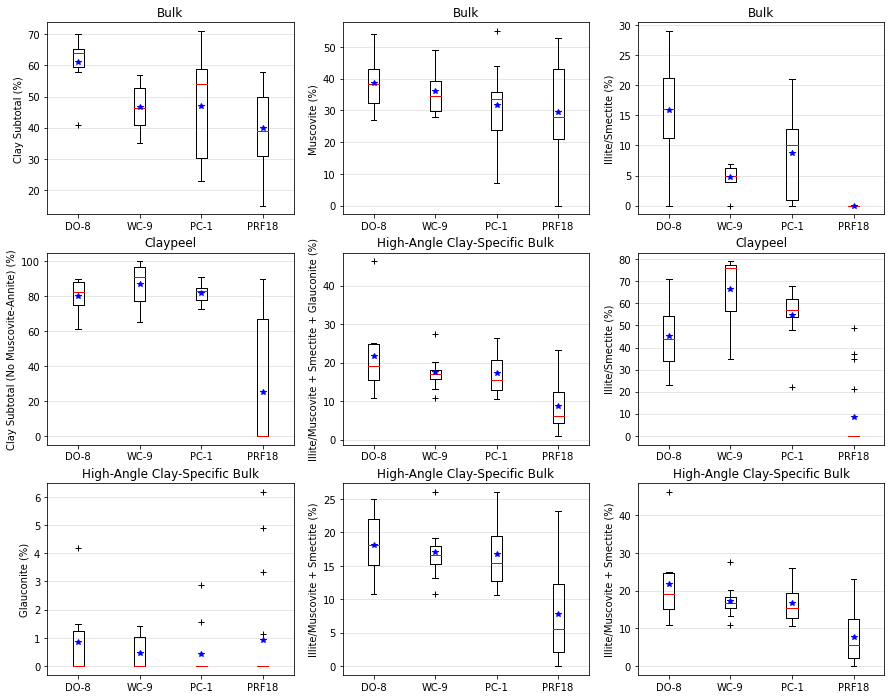

In [39]:
N = 2 #create Indices, change based on number plotting
ind = np.arange(N) # the x locations for the groups
width = 0.2 # the width of the bars, .8 is the default
labels = ['DO-8', 'WC-9', 'PC-1','PRF18']

plt.figure(figsize=(15,12))
ax0 = plt.subplot(331)
ax0.boxplot(Bulksubtotal2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax0.set_ylabel('Clay Subtotal (%)')
ax0.set_title('Bulk')
ax0.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax1 = plt.subplot(332)
ax1.boxplot(BulkMuscovite2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax1.set_ylabel('Muscovite (%)')
ax1.set_title('Bulk')
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax2 = plt.subplot(333)
ax2.boxplot(BulkIllite2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax2.set_ylabel('Illite/Smectite (%)')
ax2.set_title('Bulk')
ax2.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax3 = plt.subplot(334)
ax3.boxplot(Claypeelsubtotal2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax3.set_ylabel('Clay Subtotal (No Muscovite-Annite) (%)')
ax3.set_title('Claypeel')
ax3.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax5 = plt.subplot(335)
ax5.boxplot(HAMica_all2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax5.set_ylabel('Illite/Muscovite + Smectite + Glauconite (%)')
ax5.set_title('High-Angle Clay-Specific Bulk')
ax5.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax4 = plt.subplot(336)
ax4.boxplot(ClaypeelIllite2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax4.set_ylabel('Illite/Smectite (%)')
ax4.set_title('Claypeel')
ax4.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax6 = plt.subplot(337)
ax6.boxplot(HAGlauconite2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax6.set_ylabel('Glauconite (%)')
ax6.set_title('High-Angle Clay-Specific Bulk')
ax6.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax6 = plt.subplot(338)
ax6.boxplot(HAIllite2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax6.set_ylabel('Illite/Muscovite + Smectite (%)')
ax6.set_title('High-Angle Clay-Specific Bulk')
ax6.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax8 = plt.subplot(3,3,9)
ax8.boxplot(HAIllite_Smectite2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax8.set_ylabel('Illite/Muscovite + Smectite (%)')
ax8.set_title('High-Angle Clay-Specific Bulk')
ax8.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)


#plt.savefig('code_output/code_output/Bargraph&Boxplots_both.pdf')
plt.show()

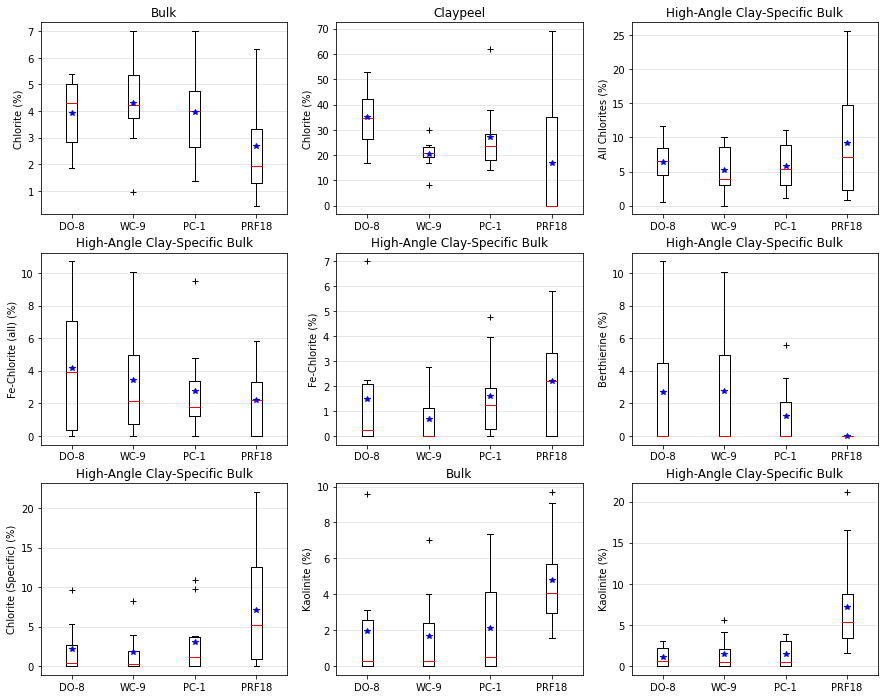

In [40]:
N = 2 #create Indices, change based on number plotting
ind = np.arange(N) # the x locations for the groups
width = 0.2 # the width of the bars, .8 is the default
labels = ['DO-8', 'WC-9', 'PC-1','PRF18']

plt.figure(figsize=(15,12))
ax0 = plt.subplot(331)
ax0.boxplot(BulkChlorite2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax0.set_ylabel('Chlorite (%)')
ax0.set_title('Bulk')
ax0.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax2 = plt.subplot(332)
ax2.boxplot(ClaypeelChlorite2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax2.set_ylabel('Chlorite (%)')
ax2.set_title('Claypeel')
ax2.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax3 = plt.subplot(333)
ax3.boxplot(HAChlorite_all2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax3.set_ylabel('All Chlorites (%)')
ax3.set_title('High-Angle Clay-Specific Bulk')
ax3.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax4 = plt.subplot(334)
ax4.boxplot(HAFeChlorite_all2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax4.set_ylabel('Fe-Chlorite (all) (%)')
ax4.set_title('High-Angle Clay-Specific Bulk')
ax4.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax5 = plt.subplot(335)
ax5.boxplot(HAFeChlorite2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax5.set_ylabel('Fe-Chlorite (%)')
ax5.set_title('High-Angle Clay-Specific Bulk')
ax5.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax6 = plt.subplot(336)
ax6.boxplot(HABerthierine2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax6.set_ylabel('Berthierine (%)')
ax6.set_title('High-Angle Clay-Specific Bulk')
ax6.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax7 = plt.subplot(337)
ax7.boxplot(HAChlorite_Specific2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax7.set_ylabel('Chlorite (Specific) (%)')
ax7.set_title('High-Angle Clay-Specific Bulk')
ax7.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax8 = plt.subplot(3,3,8)
ax8.boxplot(BulkKaolinite2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax8.set_ylabel('Kaolinite (%)')
ax8.set_title('Bulk')
ax8.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax8 = plt.subplot(3,3,9)
ax8.boxplot(HAKaolinite2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax8.set_ylabel('Kaolinite (%)')
ax8.set_title('High-Angle Clay-Specific Bulk')
ax8.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)


#plt.savefig('code_output/code_output/Bargraph&Boxplots_both.pdf')
plt.show()

But that averages Facies now be facies specific!!!

In [41]:
DO8_Facies1 = DO8_Data[DO8_Data['Facies','Facies'] == 1]
DO8_Facies1.reset_index(drop=True,inplace=True) 
DO8_Facies2 = DO8_Data[DO8_Data['Facies','Facies'] == 2]
DO8_Facies2.reset_index(drop=True,inplace=True) 
DO8_Facies3 = DO8_Data[DO8_Data['Facies','Facies'] == 3]
DO8_Facies3.reset_index(drop=True,inplace=True) 

WC9_Facies1 = WC9_Data[WC9_Data['Facies','Facies'] == 1]
WC9_Facies1.reset_index(drop=True,inplace=True) 
WC9_Facies2 = WC9_Data[WC9_Data['Facies','Facies'] == 2]
WC9_Facies2.reset_index(drop=True,inplace=True) 
WC9_Facies3 = WC9_Data[WC9_Data['Facies','Facies'] == 3]
WC9_Facies3.reset_index(drop=True,inplace=True) 

PC1_Facies1 = PC1_Data[PC1_Data['Facies','Facies'] == 1]
PC1_Facies1.reset_index(drop=True,inplace=True) 
PC1_Facies2 = PC1_Data[PC1_Data['Facies','Facies'] == 2]
PC1_Facies2.reset_index(drop=True,inplace=True) 
PC1_Facies3 = PC1_Data[PC1_Data['Facies','Facies'] == 3]
PC1_Facies3.reset_index(drop=True,inplace=True) 

PRF18_Facies2 = PRF18_Data[PRF18_Data['Facies','Facies'] == 2]
PRF18_Facies2.reset_index(drop=True,inplace=True) 
PRF18_Facies3 = PRF18_Data[PRF18_Data['Facies','Facies'] == 3]
PRF18_Facies3.reset_index(drop=True,inplace=True) 

### Facies 2 First as has most numbers

Note that these are replacing earlier lists as didn't label "3"

In [42]:
BulkChlorite2 = [DO8_Facies2['Bulk','Chlorite'], WC9_Facies2['Bulk','Chlorite'],PC1_Facies2['Bulk','Chlorite'],PRF18_Facies2['Bulk','Chlorite']]
BulkMuscovite2 = [DO8_Facies2['Bulk','Muscovite'], WC9_Facies2['Bulk','Muscovite'],PC1_Facies2['Bulk','Muscovite'],PRF18_Facies2['Bulk','Muscovite']]
BulkIllite2 = [DO8_Facies2['Bulk','Illite/Smectite'], WC9_Facies2['Bulk','Illite/Smectite'],PC1_Facies2['Bulk','Illite/Smectite'],PRF18_Facies2['Bulk','Illite/Smectite']]
Bulksubtotal2 = [DO8_Facies2['Bulk','Clay Subtotal'], WC9_Facies2['Bulk','Clay Subtotal'],PC1_Facies2['Bulk','Clay Subtotal'],PRF18_Facies2['Bulk','Clay Subtotal']]
ClaypeelChlorite2 = [DO8_Facies2['claypeel','Chlorite'], WC9_Facies2['claypeel','Chlorite'],PC1_Facies2['claypeel','Chlorite'],PRF18_Facies2['claypeel','Chlorite']]
ClaypeelIllite2 = [DO8_Facies2['claypeel','Illite/Smectite'], WC9_Facies2['claypeel','Illite/Smectite'],PC1_Facies2['claypeel','Illite/Smectite'],PRF18_Facies2['claypeel','Illite/Smectite']]
Claypeelsubtotal2 = [DO8_Facies2['claypeel','Illite/Smectite']+DO8_Facies2['claypeel','Chlorite'], 
                    WC9_Facies2['claypeel','Illite/Smectite']+WC9_Facies2['claypeel','Chlorite'],
                   PC1_Facies2['claypeel','Illite/Smectite']+PC1_Facies2['claypeel','Chlorite'],
                   PRF18_Facies2['claypeel','Illite/Smectite']+PRF18_Facies2['claypeel','Chlorite']]
HAChlorite_all2 = [DO8_Facies2['ClayMin%','Fe-chlorite (1.572)']+DO8_Facies2['ClayMin%','Fe-chlorite (1.565)']+DO8_Facies2['ClayMin%','Chlorite']+DO8_Facies2['ClayMin%','Chlorite/Berthierine?']+DO8_Facies2['ClayMin%','Bertheirine?'],
                 WC9_Facies2['ClayMin%','Fe-chlorite (1.572)']+WC9_Facies2['ClayMin%','Fe-chlorite (1.565)']+WC9_Facies2['ClayMin%','Chlorite']+WC9_Facies2['ClayMin%','Chlorite/Berthierine?']+WC9_Facies2['ClayMin%','Bertheirine?'],
                 PC1_Facies2['ClayMin%','Fe-chlorite (1.572)']+PC1_Facies2['ClayMin%','Fe-chlorite (1.565)']+PC1_Facies2['ClayMin%','Chlorite']+PC1_Facies2['ClayMin%','Chlorite/Berthierine?']+PC1_Facies2['ClayMin%','Bertheirine?'],
                   PRF18_Facies2['ClayMin%','Fe-chlorite (1.572)']+PRF18_Facies2['ClayMin%','Fe-chlorite (1.565)']+PRF18_Facies2['ClayMin%','Chlorite']+PRF18_Facies2['ClayMin%','Chlorite/Berthierine?']+PRF18_Facies2['ClayMin%','Bertheirine?']]
HAMica_all2 = [DO8_Facies2['ClayMin%','Dioctahedral smectite']+DO8_Facies2['ClayMin%','Trioctahedral smectite/Glauconite?']+DO8_Facies2['ClayMin%','Glauconite(?, or Laumontite?)']+DO8_Facies2['ClayMin%','Illite/Muscovite + smectite'],
              WC9_Facies2['ClayMin%','Dioctahedral smectite']+WC9_Facies2['ClayMin%','Trioctahedral smectite/Glauconite?']+WC9_Facies2['ClayMin%','Glauconite(?, or Laumontite?)']+WC9_Facies2['ClayMin%','Illite/Muscovite + smectite'],
              PC1_Facies2['ClayMin%','Dioctahedral smectite']+PC1_Facies2['ClayMin%','Trioctahedral smectite/Glauconite?']+PC1_Facies2['ClayMin%','Glauconite(?, or Laumontite?)']+PC1_Facies2['ClayMin%','Illite/Muscovite + smectite'],
               PRF18_Facies2['ClayMin%','Dioctahedral smectite']+PRF18_Facies2['ClayMin%','Trioctahedral smectite/Glauconite?']+PRF18_Facies2['ClayMin%','Glauconite(?, or Laumontite?)']+PRF18_Facies2['ClayMin%','Illite/Muscovite + smectite']]
HAIllite_Smectite2 = [DO8_Facies2['ClayMin%','Dioctahedral smectite']+DO8_Facies2['ClayMin%','Trioctahedral smectite/Glauconite?']+DO8_Facies2['ClayMin%','Illite/Muscovite + smectite'],
              WC9_Facies2['ClayMin%','Dioctahedral smectite']+WC9_Facies2['ClayMin%','Trioctahedral smectite/Glauconite?']+WC9_Facies2['ClayMin%','Illite/Muscovite + smectite'],
              PC1_Facies2['ClayMin%','Dioctahedral smectite']+PC1_Facies2['ClayMin%','Trioctahedral smectite/Glauconite?']+PC1_Facies2['ClayMin%','Illite/Muscovite + smectite'],
                      PRF18_Facies2['ClayMin%','Dioctahedral smectite']+PRF18_Facies2['ClayMin%','Trioctahedral smectite/Glauconite?']+PRF18_Facies2['ClayMin%','Illite/Muscovite + smectite']]
HASmectiteUniq2 = [DO8_Facies2['ClayMin%','Dioctahedral smectite']+DO8_Facies2['ClayMin%','Trioctahedral smectite/Glauconite?'],
              WC9_Facies2['ClayMin%','Dioctahedral smectite']+WC9_Facies2['ClayMin%','Trioctahedral smectite/Glauconite?'],
              PC1_Facies2['ClayMin%','Dioctahedral smectite']+PC1_Facies2['ClayMin%','Trioctahedral smectite/Glauconite?'],
                   PRF18_Facies2['ClayMin%','Dioctahedral smectite']+PRF18_Facies2['ClayMin%','Trioctahedral smectite/Glauconite?']]
HAIllite2 = [DO8_Facies2['ClayMin%','Illite/Muscovite + smectite'],WC9_Facies2['ClayMin%','Illite/Muscovite + smectite'],
             PC1_Facies2['ClayMin%','Illite/Muscovite + smectite'],PRF18_Facies2['ClayMin%','Illite/Muscovite + smectite']]
HAGlauconite2 = [DO8_Facies2['ClayMin%','Trioctahedral smectite/Glauconite?']+DO8_Facies2['ClayMin%','Glauconite(?, or Laumontite?)'],
              WC9_Facies2['ClayMin%','Trioctahedral smectite/Glauconite?']+WC9_Facies2['ClayMin%','Glauconite(?, or Laumontite?)'],
              PC1_Facies2['ClayMin%','Trioctahedral smectite/Glauconite?']+PC1_Facies2['ClayMin%','Glauconite(?, or Laumontite?)'],
                 PRF18_Facies2['ClayMin%','Trioctahedral smectite/Glauconite?']+PRF18_Facies2['ClayMin%','Glauconite(?, or Laumontite?)']]
HAFeChlorite_all2 = [DO8_Facies2['ClayMin%','Fe-chlorite (1.572)']+DO8_Facies2['ClayMin%','Fe-chlorite (1.565)']+DO8_Facies2['ClayMin%','Chlorite/Berthierine?']+DO8_Facies2['ClayMin%','Bertheirine?'],
                 WC9_Facies2['ClayMin%','Fe-chlorite (1.572)']+WC9_Facies2['ClayMin%','Fe-chlorite (1.565)']+WC9_Facies2['ClayMin%','Chlorite/Berthierine?']+WC9_Facies2['ClayMin%','Bertheirine?'],
                 PC1_Facies2['ClayMin%','Fe-chlorite (1.572)']+PC1_Facies2['ClayMin%','Fe-chlorite (1.565)']+PC1_Facies2['ClayMin%','Chlorite/Berthierine?']+PC1_Facies2['ClayMin%','Bertheirine?'],
                     PRF18_Facies2['ClayMin%','Fe-chlorite (1.572)']+PRF18_Facies2['ClayMin%','Fe-chlorite (1.565)']+PRF18_Facies2['ClayMin%','Chlorite/Berthierine?']+PRF18_Facies2['ClayMin%','Bertheirine?']]
HAFeChlorite2 = [DO8_Facies2['ClayMin%','Fe-chlorite (1.572)']+DO8_Facies2['ClayMin%','Fe-chlorite (1.565)'],
                 WC9_Facies2['ClayMin%','Fe-chlorite (1.572)']+WC9_Facies2['ClayMin%','Fe-chlorite (1.565)'],
                 PC1_Facies2['ClayMin%','Fe-chlorite (1.572)']+PC1_Facies2['ClayMin%','Fe-chlorite (1.565)'],
                 PRF18_Facies2['ClayMin%','Fe-chlorite (1.572)']+PRF18_Facies2['ClayMin%','Fe-chlorite (1.565)']]
HABerthierine2 = [DO8_Facies2['ClayMin%','Chlorite/Berthierine?']+DO8_Facies2['ClayMin%','Bertheirine?'],
                 WC9_Facies2['ClayMin%','Chlorite/Berthierine?']+WC9_Facies2['ClayMin%','Bertheirine?'],
                 PC1_Facies2['ClayMin%','Chlorite/Berthierine?']+PC1_Facies2['ClayMin%','Bertheirine?'],
                  PRF18_Facies2['ClayMin%','Chlorite/Berthierine?']+PRF18_Facies2['ClayMin%','Bertheirine?']]
HAChlorite_Specific2 = [DO8_Facies2['ClayMin%','Chlorite'],WC9_Facies2['ClayMin%','Chlorite'],
                        PC1_Facies2['ClayMin%','Chlorite'],PRF18_Facies2['ClayMin%','Chlorite']]
HAKaolinite2 = [DO8_Facies2['ClayMin%','Kaolinite'],WC9_Facies2['ClayMin%','Kaolinite'],
             PC1_Facies2['ClayMin%','Kaolinite'],PRF18_Facies2['ClayMin%','Kaolinite']]
BulkKaolinite2 = [DO8_Facies2['Bulk','Kaolinite'], WC9_Facies2['Bulk','Kaolinite'],PC1_Facies2['Bulk','Kaolinite'],PRF18_Facies2['Bulk','Kaolinite']]


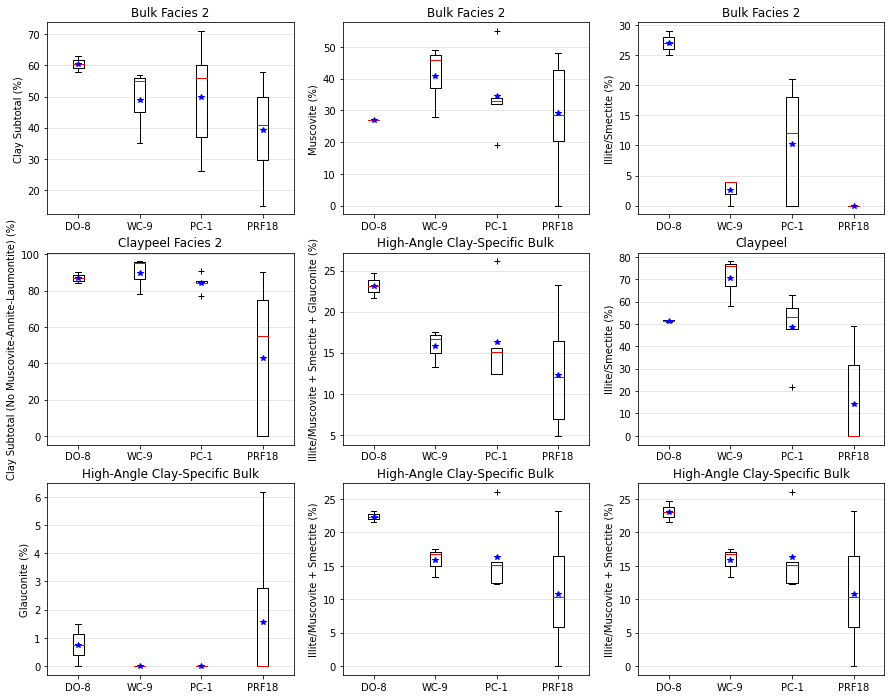

In [43]:
N = 2 #create Indices, change based on number plotting
ind = np.arange(N) # the x locations for the groups
width = 0.2 # the width of the bars, .8 is the default
labels = ['DO-8', 'WC-9', 'PC-1','PRF18']

plt.figure(figsize=(15,12))
ax0 = plt.subplot(331)
ax0.boxplot(Bulksubtotal2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax0.set_ylabel('Clay Subtotal (%)')
ax0.set_title('Bulk Facies 2')
ax0.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax1 = plt.subplot(332)
ax1.boxplot(BulkMuscovite2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax1.set_ylabel('Muscovite (%)')
ax1.set_title('Bulk Facies 2')
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax2 = plt.subplot(333)
ax2.boxplot(BulkIllite2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax2.set_ylabel('Illite/Smectite (%)')
ax2.set_title('Bulk Facies 2')
ax2.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax3 = plt.subplot(334)
ax3.boxplot(Claypeelsubtotal2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax3.set_ylabel('Clay Subtotal (No Muscovite-Annite-Laumontite) (%)')
ax3.set_title('Claypeel Facies 2')
ax3.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax5 = plt.subplot(335)
ax5.boxplot(HAMica_all2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax5.set_ylabel('Illite/Muscovite + Smectite + Glauconite (%)')
ax5.set_title('High-Angle Clay-Specific Bulk')
ax5.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax4 = plt.subplot(336)
ax4.boxplot(ClaypeelIllite2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax4.set_ylabel('Illite/Smectite (%)')
ax4.set_title('Claypeel')
ax4.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax6 = plt.subplot(337)
ax6.boxplot(HAGlauconite2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax6.set_ylabel('Glauconite (%)')
ax6.set_title('High-Angle Clay-Specific Bulk')
ax6.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax6 = plt.subplot(338)
ax6.boxplot(HAIllite2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax6.set_ylabel('Illite/Muscovite + Smectite (%)')
ax6.set_title('High-Angle Clay-Specific Bulk')
ax6.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax8 = plt.subplot(3,3,9)
ax8.boxplot(HAIllite_Smectite2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax8.set_ylabel('Illite/Muscovite + Smectite (%)')
ax8.set_title('High-Angle Clay-Specific Bulk')
ax8.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)


#plt.savefig('code_output/code_output/Bargraph&Boxplots_both.pdf')
plt.show()

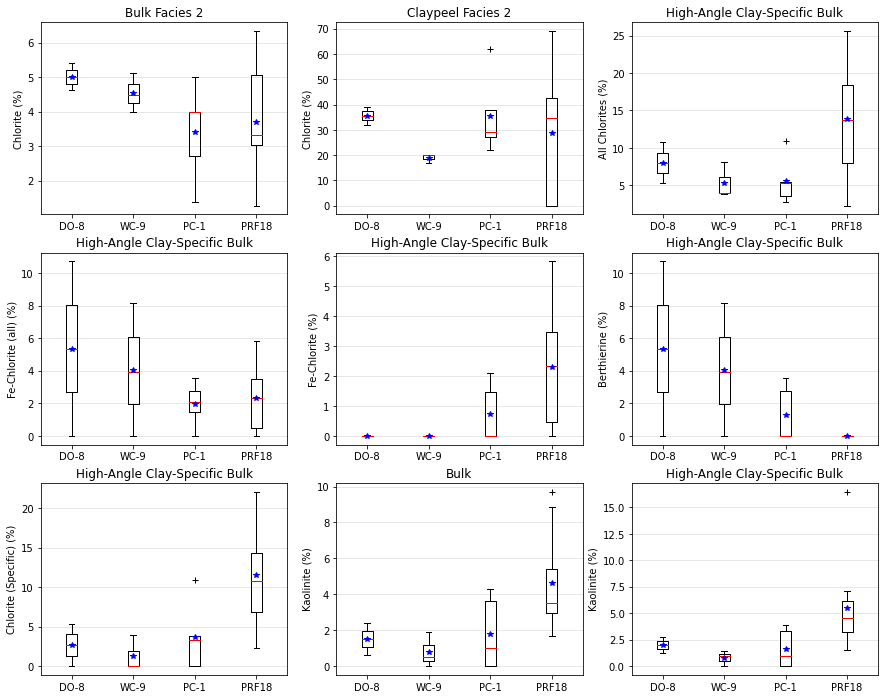

In [44]:
N = 2 #create Indices, change based on number plotting
ind = np.arange(N) # the x locations for the groups
width = 0.2 # the width of the bars, .8 is the default
labels = ['DO-8', 'WC-9', 'PC-1','PRF18']

plt.figure(figsize=(15,12))
ax0 = plt.subplot(331)
ax0.boxplot(BulkChlorite2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax0.set_ylabel('Chlorite (%)')
ax0.set_title('Bulk Facies 2')
ax0.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax2 = plt.subplot(332)
ax2.boxplot(ClaypeelChlorite2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax2.set_ylabel('Chlorite (%)')
ax2.set_title('Claypeel Facies 2')
ax2.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax3 = plt.subplot(333)
ax3.boxplot(HAChlorite_all2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax3.set_ylabel('All Chlorites (%)')
ax3.set_title('High-Angle Clay-Specific Bulk')
ax3.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax4 = plt.subplot(334)
ax4.boxplot(HAFeChlorite_all2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax4.set_ylabel('Fe-Chlorite (all) (%)')
ax4.set_title('High-Angle Clay-Specific Bulk')
ax4.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax5 = plt.subplot(335)
ax5.boxplot(HAFeChlorite2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax5.set_ylabel('Fe-Chlorite (%)')
ax5.set_title('High-Angle Clay-Specific Bulk')
ax5.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax6 = plt.subplot(336)
ax6.boxplot(HABerthierine2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax6.set_ylabel('Berthierine (%)')
ax6.set_title('High-Angle Clay-Specific Bulk')
ax6.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax7 = plt.subplot(337)
ax7.boxplot(HAChlorite_Specific2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax7.set_ylabel('Chlorite (Specific) (%)')
ax7.set_title('High-Angle Clay-Specific Bulk')
ax7.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax8 = plt.subplot(3,3,8)
ax8.boxplot(BulkKaolinite2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax8.set_ylabel('Kaolinite (%)')
ax8.set_title('Bulk')
ax8.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax8 = plt.subplot(3,3,9)
ax8.boxplot(HAKaolinite2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax8.set_ylabel('Kaolinite (%)')
ax8.set_title('High-Angle Clay-Specific Bulk')
ax8.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)


#plt.savefig('code_output/code_output/Bargraph&Boxplots_both.pdf')
plt.show()

### Now Facies 3 as in all sets

In [45]:
BulkChlorite2 = [DO8_Facies3['Bulk','Chlorite'], WC9_Facies3['Bulk','Chlorite'],PC1_Facies3['Bulk','Chlorite'],PRF18_Facies3['Bulk','Chlorite']]
BulkMuscovite2 = [DO8_Facies3['Bulk','Muscovite'], WC9_Facies3['Bulk','Muscovite'],PC1_Facies3['Bulk','Muscovite'],PRF18_Facies3['Bulk','Muscovite']]
BulkIllite2 = [DO8_Facies3['Bulk','Illite/Smectite'], WC9_Facies3['Bulk','Illite/Smectite'],PC1_Facies3['Bulk','Illite/Smectite'],PRF18_Facies3['Bulk','Illite/Smectite']]
Bulksubtotal2 = [DO8_Facies3['Bulk','Clay Subtotal'], WC9_Facies3['Bulk','Clay Subtotal'],PC1_Facies3['Bulk','Clay Subtotal'],PRF18_Facies3['Bulk','Clay Subtotal']]
ClaypeelChlorite2 = [DO8_Facies3['claypeel','Chlorite'], WC9_Facies3['claypeel','Chlorite'],PC1_Facies3['claypeel','Chlorite'],PRF18_Facies3['claypeel','Chlorite']]
ClaypeelIllite2 = [DO8_Facies3['claypeel','Illite/Smectite'], WC9_Facies3['claypeel','Illite/Smectite'],PC1_Facies3['claypeel','Illite/Smectite'],PRF18_Facies3['claypeel','Illite/Smectite']]
Claypeelsubtotal2 = [DO8_Facies3['claypeel','Illite/Smectite']+DO8_Facies3['claypeel','Chlorite'], 
                    WC9_Facies3['claypeel','Illite/Smectite']+WC9_Facies3['claypeel','Chlorite'],
                   PC1_Facies3['claypeel','Illite/Smectite']+PC1_Facies3['claypeel','Chlorite'],
                   PRF18_Facies3['claypeel','Illite/Smectite']+PRF18_Facies3['claypeel','Chlorite']]
HAChlorite_all2 = [DO8_Facies3['ClayMin%','Fe-chlorite (1.572)']+DO8_Facies3['ClayMin%','Fe-chlorite (1.565)']+DO8_Facies3['ClayMin%','Chlorite']+DO8_Facies3['ClayMin%','Chlorite/Berthierine?']+DO8_Facies3['ClayMin%','Bertheirine?'],
                 WC9_Facies3['ClayMin%','Fe-chlorite (1.572)']+WC9_Facies3['ClayMin%','Fe-chlorite (1.565)']+WC9_Facies3['ClayMin%','Chlorite']+WC9_Facies3['ClayMin%','Chlorite/Berthierine?']+WC9_Facies3['ClayMin%','Bertheirine?'],
                 PC1_Facies3['ClayMin%','Fe-chlorite (1.572)']+PC1_Facies3['ClayMin%','Fe-chlorite (1.565)']+PC1_Facies3['ClayMin%','Chlorite']+PC1_Facies3['ClayMin%','Chlorite/Berthierine?']+PC1_Facies3['ClayMin%','Bertheirine?'],
                   PRF18_Facies3['ClayMin%','Fe-chlorite (1.572)']+PRF18_Facies3['ClayMin%','Fe-chlorite (1.565)']+PRF18_Facies3['ClayMin%','Chlorite']+PRF18_Facies3['ClayMin%','Chlorite/Berthierine?']+PRF18_Facies3['ClayMin%','Bertheirine?']]
HAMica_all2 = [DO8_Facies3['ClayMin%','Dioctahedral smectite']+DO8_Facies3['ClayMin%','Trioctahedral smectite/Glauconite?']+DO8_Facies3['ClayMin%','Glauconite(?, or Laumontite?)']+DO8_Facies3['ClayMin%','Illite/Muscovite + smectite'],
              WC9_Facies3['ClayMin%','Dioctahedral smectite']+WC9_Facies3['ClayMin%','Trioctahedral smectite/Glauconite?']+WC9_Facies3['ClayMin%','Glauconite(?, or Laumontite?)']+WC9_Facies3['ClayMin%','Illite/Muscovite + smectite'],
              PC1_Facies3['ClayMin%','Dioctahedral smectite']+PC1_Facies3['ClayMin%','Trioctahedral smectite/Glauconite?']+PC1_Facies3['ClayMin%','Glauconite(?, or Laumontite?)']+PC1_Facies3['ClayMin%','Illite/Muscovite + smectite'],
               PRF18_Facies3['ClayMin%','Dioctahedral smectite']+PRF18_Facies3['ClayMin%','Trioctahedral smectite/Glauconite?']+PRF18_Facies3['ClayMin%','Glauconite(?, or Laumontite?)']+PRF18_Facies3['ClayMin%','Illite/Muscovite + smectite']]
HAIllite_Smectite2 = [DO8_Facies3['ClayMin%','Dioctahedral smectite']+DO8_Facies3['ClayMin%','Trioctahedral smectite/Glauconite?']+DO8_Facies3['ClayMin%','Illite/Muscovite + smectite'],
              WC9_Facies3['ClayMin%','Dioctahedral smectite']+WC9_Facies3['ClayMin%','Trioctahedral smectite/Glauconite?']+WC9_Facies3['ClayMin%','Illite/Muscovite + smectite'],
              PC1_Facies3['ClayMin%','Dioctahedral smectite']+PC1_Facies3['ClayMin%','Trioctahedral smectite/Glauconite?']+PC1_Facies3['ClayMin%','Illite/Muscovite + smectite'],
                      PRF18_Facies3['ClayMin%','Dioctahedral smectite']+PRF18_Facies3['ClayMin%','Trioctahedral smectite/Glauconite?']+PRF18_Facies3['ClayMin%','Illite/Muscovite + smectite']]
HASmectiteUniq2 = [DO8_Facies3['ClayMin%','Dioctahedral smectite']+DO8_Facies3['ClayMin%','Trioctahedral smectite/Glauconite?'],
              WC9_Facies3['ClayMin%','Dioctahedral smectite']+WC9_Facies3['ClayMin%','Trioctahedral smectite/Glauconite?'],
              PC1_Facies3['ClayMin%','Dioctahedral smectite']+PC1_Facies3['ClayMin%','Trioctahedral smectite/Glauconite?'],
                   PRF18_Facies3['ClayMin%','Dioctahedral smectite']+PRF18_Facies3['ClayMin%','Trioctahedral smectite/Glauconite?']]
HAIllite2 = [DO8_Facies3['ClayMin%','Illite/Muscovite + smectite'],WC9_Facies3['ClayMin%','Illite/Muscovite + smectite'],
             PC1_Facies3['ClayMin%','Illite/Muscovite + smectite'],PRF18_Facies3['ClayMin%','Illite/Muscovite + smectite']]
HAGlauconite2 = [DO8_Facies3['ClayMin%','Trioctahedral smectite/Glauconite?']+DO8_Facies3['ClayMin%','Glauconite(?, or Laumontite?)'],
              WC9_Facies3['ClayMin%','Trioctahedral smectite/Glauconite?']+WC9_Facies3['ClayMin%','Glauconite(?, or Laumontite?)'],
              PC1_Facies3['ClayMin%','Trioctahedral smectite/Glauconite?']+PC1_Facies3['ClayMin%','Glauconite(?, or Laumontite?)'],
                 PRF18_Facies3['ClayMin%','Trioctahedral smectite/Glauconite?']+PRF18_Facies3['ClayMin%','Glauconite(?, or Laumontite?)']]
HAFeChlorite_all2 = [DO8_Facies3['ClayMin%','Fe-chlorite (1.572)']+DO8_Facies3['ClayMin%','Fe-chlorite (1.565)']+DO8_Facies3['ClayMin%','Chlorite/Berthierine?']+DO8_Facies3['ClayMin%','Bertheirine?'],
                 WC9_Facies3['ClayMin%','Fe-chlorite (1.572)']+WC9_Facies3['ClayMin%','Fe-chlorite (1.565)']+WC9_Facies3['ClayMin%','Chlorite/Berthierine?']+WC9_Facies3['ClayMin%','Bertheirine?'],
                 PC1_Facies3['ClayMin%','Fe-chlorite (1.572)']+PC1_Facies3['ClayMin%','Fe-chlorite (1.565)']+PC1_Facies3['ClayMin%','Chlorite/Berthierine?']+PC1_Facies3['ClayMin%','Bertheirine?'],
                     PRF18_Facies3['ClayMin%','Fe-chlorite (1.572)']+PRF18_Facies3['ClayMin%','Fe-chlorite (1.565)']+PRF18_Facies3['ClayMin%','Chlorite/Berthierine?']+PRF18_Facies3['ClayMin%','Bertheirine?']]
HAFeChlorite2 = [DO8_Facies3['ClayMin%','Fe-chlorite (1.572)']+DO8_Facies3['ClayMin%','Fe-chlorite (1.565)'],
                 WC9_Facies3['ClayMin%','Fe-chlorite (1.572)']+WC9_Facies3['ClayMin%','Fe-chlorite (1.565)'],
                 PC1_Facies3['ClayMin%','Fe-chlorite (1.572)']+PC1_Facies3['ClayMin%','Fe-chlorite (1.565)'],
                 PRF18_Facies3['ClayMin%','Fe-chlorite (1.572)']+PRF18_Facies3['ClayMin%','Fe-chlorite (1.565)']]
HABerthierine2 = [DO8_Facies3['ClayMin%','Chlorite/Berthierine?']+DO8_Facies3['ClayMin%','Bertheirine?'],
                 WC9_Facies3['ClayMin%','Chlorite/Berthierine?']+WC9_Facies3['ClayMin%','Bertheirine?'],
                 PC1_Facies3['ClayMin%','Chlorite/Berthierine?']+PC1_Facies3['ClayMin%','Bertheirine?'],
                  PRF18_Facies3['ClayMin%','Chlorite/Berthierine?']+PRF18_Facies3['ClayMin%','Bertheirine?']]
HAChlorite_Specific2 = [DO8_Facies3['ClayMin%','Chlorite'],WC9_Facies3['ClayMin%','Chlorite'],
                        PC1_Facies3['ClayMin%','Chlorite'],PRF18_Facies3['ClayMin%','Chlorite']]
HAKaolinite2 = [DO8_Facies3['ClayMin%','Kaolinite'],WC9_Facies3['ClayMin%','Kaolinite'],
             PC1_Facies3['ClayMin%','Kaolinite'],PRF18_Facies3['ClayMin%','Kaolinite']]
BulkKaolinite2 = [DO8_Facies3['Bulk','Kaolinite'], WC9_Facies3['Bulk','Kaolinite'],PC1_Facies3['Bulk','Kaolinite'],PRF18_Facies3['Bulk','Kaolinite']]


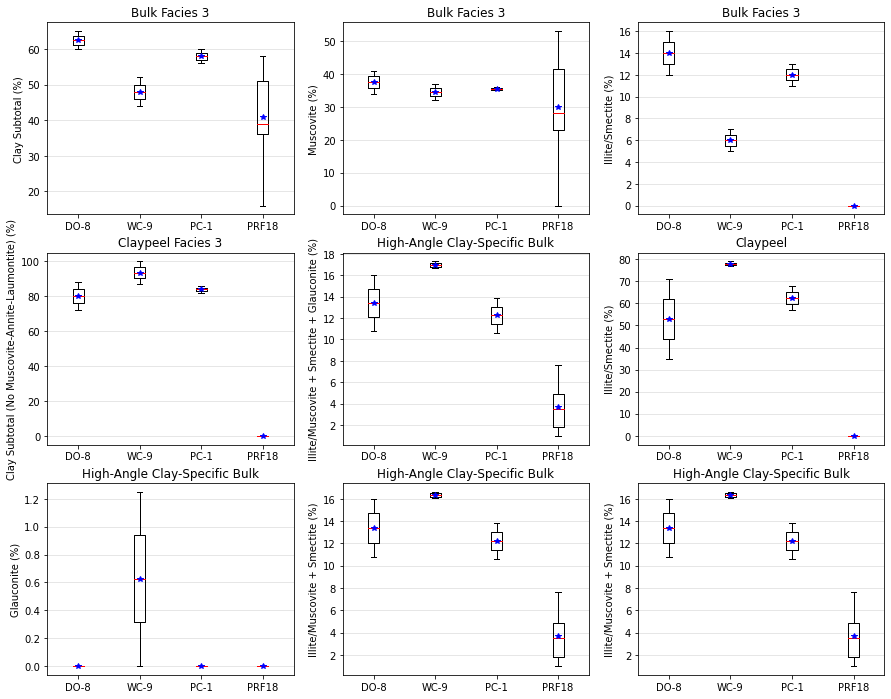

In [46]:
N = 2 #create Indices, change based on number plotting
ind = np.arange(N) # the x locations for the groups
width = 0.2 # the width of the bars, .8 is the default
labels = ['DO-8', 'WC-9', 'PC-1','PRF18']

plt.figure(figsize=(15,12))
ax0 = plt.subplot(331)
ax0.boxplot(Bulksubtotal2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax0.set_ylabel('Clay Subtotal (%)')
ax0.set_title('Bulk Facies 3')
ax0.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax1 = plt.subplot(332)
ax1.boxplot(BulkMuscovite2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax1.set_ylabel('Muscovite (%)')
ax1.set_title('Bulk Facies 3')
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax2 = plt.subplot(333)
ax2.boxplot(BulkIllite2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax2.set_ylabel('Illite/Smectite (%)')
ax2.set_title('Bulk Facies 3')
ax2.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax3 = plt.subplot(334)
ax3.boxplot(Claypeelsubtotal2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax3.set_ylabel('Clay Subtotal (No Muscovite-Annite-Laumontite) (%)')
ax3.set_title('Claypeel Facies 3')
ax3.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax5 = plt.subplot(335)
ax5.boxplot(HAMica_all2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax5.set_ylabel('Illite/Muscovite + Smectite + Glauconite (%)')
ax5.set_title('High-Angle Clay-Specific Bulk')
ax5.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax4 = plt.subplot(336)
ax4.boxplot(ClaypeelIllite2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax4.set_ylabel('Illite/Smectite (%)')
ax4.set_title('Claypeel')
ax4.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax6 = plt.subplot(337)
ax6.boxplot(HAGlauconite2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax6.set_ylabel('Glauconite (%)')
ax6.set_title('High-Angle Clay-Specific Bulk')
ax6.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax6 = plt.subplot(338)
ax6.boxplot(HAIllite2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax6.set_ylabel('Illite/Muscovite + Smectite (%)')
ax6.set_title('High-Angle Clay-Specific Bulk')
ax6.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax8 = plt.subplot(3,3,9)
ax8.boxplot(HAIllite_Smectite2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax8.set_ylabel('Illite/Muscovite + Smectite (%)')
ax8.set_title('High-Angle Clay-Specific Bulk')
ax8.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)


#plt.savefig('code_output/code_output/Bargraph&Boxplots_both.pdf')
plt.show()

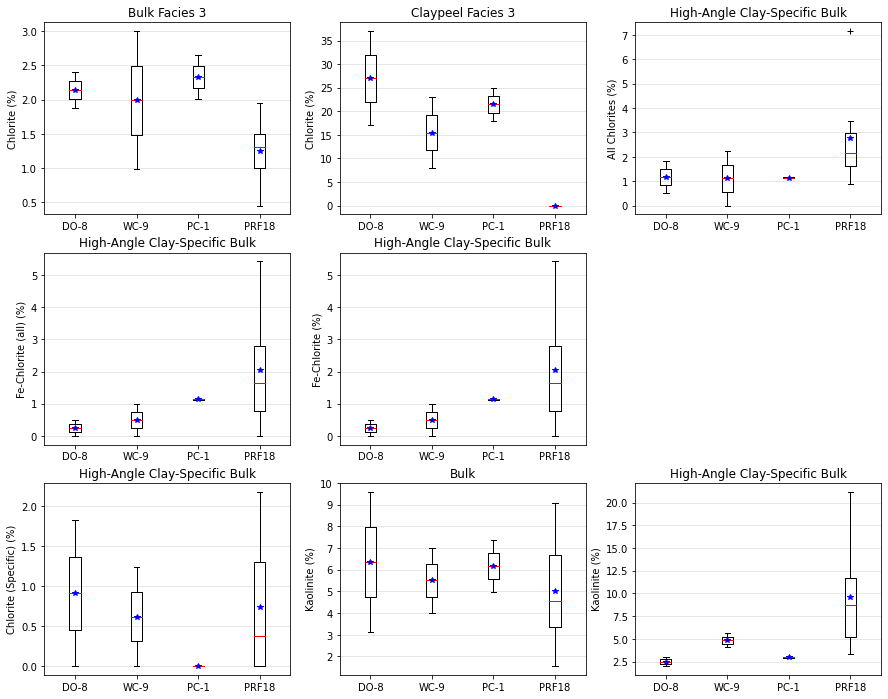

In [47]:
N = 2 #create Indices, change based on number plotting
ind = np.arange(N) # the x locations for the groups
width = 0.2 # the width of the bars, .8 is the default
labels = ['DO-8', 'WC-9', 'PC-1','PRF18']

plt.figure(figsize=(15,12))
ax0 = plt.subplot(331)
ax0.boxplot(BulkChlorite2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax0.set_ylabel('Chlorite (%)')
ax0.set_title('Bulk Facies 3')
ax0.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax2 = plt.subplot(332)
ax2.boxplot(ClaypeelChlorite2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax2.set_ylabel('Chlorite (%)')
ax2.set_title('Claypeel Facies 3')
ax2.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax3 = plt.subplot(333)
ax3.boxplot(HAChlorite_all2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax3.set_ylabel('All Chlorites (%)')
ax3.set_title('High-Angle Clay-Specific Bulk')
ax3.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax4 = plt.subplot(334)
ax4.boxplot(HAFeChlorite_all2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax4.set_ylabel('Fe-Chlorite (all) (%)')
ax4.set_title('High-Angle Clay-Specific Bulk')
ax4.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax5 = plt.subplot(335)
ax5.boxplot(HAFeChlorite2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax5.set_ylabel('Fe-Chlorite (%)')
ax5.set_title('High-Angle Clay-Specific Bulk')
ax5.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

# ax6 = plt.subplot(336)
# ax6.boxplot(HABerthierine2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
#             showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
# ax6.set_ylabel('Berthierine (%)')
# ax6.set_title('High-Angle Clay-Specific Bulk')
# ax6.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax7 = plt.subplot(337)
ax7.boxplot(HAChlorite_Specific2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax7.set_ylabel('Chlorite (Specific) (%)')
ax7.set_title('High-Angle Clay-Specific Bulk')
ax7.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)


ax8 = plt.subplot(3,3,8)
ax8.boxplot(BulkKaolinite2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax8.set_ylabel('Kaolinite (%)')
ax8.set_title('Bulk')
ax8.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax8 = plt.subplot(3,3,9)
ax8.boxplot(HAKaolinite2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax8.set_ylabel('Kaolinite (%)')
ax8.set_title('High-Angle Clay-Specific Bulk')
ax8.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)


#plt.savefig('code_output/code_output/Bargraph&Boxplots_both.pdf')
plt.show()

### Lastly, Facies 1

In [48]:
BulkChlorite2 = [DO8_Facies1['Bulk','Chlorite'], WC9_Facies1['Bulk','Chlorite'],PC1_Facies1['Bulk','Chlorite']]
BulkMuscovite2 = [DO8_Facies1['Bulk','Muscovite'], WC9_Facies1['Bulk','Muscovite'],PC1_Facies1['Bulk','Muscovite']]
BulkIllite2 = [DO8_Facies1['Bulk','Illite/Smectite'], WC9_Facies1['Bulk','Illite/Smectite'],PC1_Facies1['Bulk','Illite/Smectite']]
Bulksubtotal2 = [DO8_Facies1['Bulk','Clay Subtotal'], WC9_Facies1['Bulk','Clay Subtotal'],PC1_Facies1['Bulk','Clay Subtotal']]
ClaypeelChlorite2 = [DO8_Facies1['claypeel','Chlorite'], WC9_Facies1['claypeel','Chlorite'],PC1_Facies1['claypeel','Chlorite']]
ClaypeelIllite2 = [DO8_Facies1['claypeel','Illite/Smectite'], WC9_Facies1['claypeel','Illite/Smectite'],PC1_Facies1['claypeel','Illite/Smectite']]
Claypeelsubtotal2 = [DO8_Facies1['claypeel','Illite/Smectite']+DO8_Facies1['claypeel','Chlorite'], 
                    WC9_Facies1['claypeel','Illite/Smectite']+WC9_Facies1['claypeel','Chlorite'],
                   PC1_Facies1['claypeel','Illite/Smectite']+PC1_Facies1['claypeel','Chlorite']]
HAChlorite_all2 = [DO8_Facies1['ClayMin%','Fe-chlorite (1.572)']+DO8_Facies1['ClayMin%','Fe-chlorite (1.565)']+DO8_Facies1['ClayMin%','Chlorite']+DO8_Facies1['ClayMin%','Chlorite/Berthierine?']+DO8_Facies1['ClayMin%','Bertheirine?'],
                 WC9_Facies1['ClayMin%','Fe-chlorite (1.572)']+WC9_Facies1['ClayMin%','Fe-chlorite (1.565)']+WC9_Facies1['ClayMin%','Chlorite']+WC9_Facies1['ClayMin%','Chlorite/Berthierine?']+WC9_Facies1['ClayMin%','Bertheirine?'],
                 PC1_Facies1['ClayMin%','Fe-chlorite (1.572)']+PC1_Facies1['ClayMin%','Fe-chlorite (1.565)']+PC1_Facies1['ClayMin%','Chlorite']+PC1_Facies1['ClayMin%','Chlorite/Berthierine?']+PC1_Facies1['ClayMin%','Bertheirine?']]
HAMica_all2 = [DO8_Facies1['ClayMin%','Dioctahedral smectite']+DO8_Facies1['ClayMin%','Trioctahedral smectite/Glauconite?']+DO8_Facies1['ClayMin%','Glauconite(?, or Laumontite?)']+DO8_Facies1['ClayMin%','Illite/Muscovite + smectite'],
              WC9_Facies1['ClayMin%','Dioctahedral smectite']+WC9_Facies1['ClayMin%','Trioctahedral smectite/Glauconite?']+WC9_Facies1['ClayMin%','Glauconite(?, or Laumontite?)']+WC9_Facies1['ClayMin%','Illite/Muscovite + smectite'],
              PC1_Facies1['ClayMin%','Dioctahedral smectite']+PC1_Facies1['ClayMin%','Trioctahedral smectite/Glauconite?']+PC1_Facies1['ClayMin%','Glauconite(?, or Laumontite?)']+PC1_Facies1['ClayMin%','Illite/Muscovite + smectite']]
HAIllite_Smectite2 = [DO8_Facies1['ClayMin%','Dioctahedral smectite']+DO8_Facies1['ClayMin%','Trioctahedral smectite/Glauconite?']+DO8_Facies1['ClayMin%','Illite/Muscovite + smectite'],
              WC9_Facies1['ClayMin%','Dioctahedral smectite']+WC9_Facies1['ClayMin%','Trioctahedral smectite/Glauconite?']+WC9_Facies1['ClayMin%','Illite/Muscovite + smectite'],
              PC1_Facies1['ClayMin%','Dioctahedral smectite']+PC1_Facies1['ClayMin%','Trioctahedral smectite/Glauconite?']+PC1_Facies1['ClayMin%','Illite/Muscovite + smectite']]
HASmectiteUniq2 = [DO8_Facies1['ClayMin%','Dioctahedral smectite']+DO8_Facies1['ClayMin%','Trioctahedral smectite/Glauconite?'],
              WC9_Facies1['ClayMin%','Dioctahedral smectite']+WC9_Facies1['ClayMin%','Trioctahedral smectite/Glauconite?'],
              PC1_Facies1['ClayMin%','Dioctahedral smectite']+PC1_Facies1['ClayMin%','Trioctahedral smectite/Glauconite?']]
HAIllite2 = [DO8_Facies1['ClayMin%','Illite/Muscovite + smectite'],WC9_Facies1['ClayMin%','Illite/Muscovite + smectite'],
             PC1_Facies1['ClayMin%','Illite/Muscovite + smectite']]
HAGlauconite2 = [DO8_Facies1['ClayMin%','Trioctahedral smectite/Glauconite?']+DO8_Facies1['ClayMin%','Glauconite(?, or Laumontite?)'],
              WC9_Facies1['ClayMin%','Trioctahedral smectite/Glauconite?']+WC9_Facies1['ClayMin%','Glauconite(?, or Laumontite?)'],
              PC1_Facies1['ClayMin%','Trioctahedral smectite/Glauconite?']+PC1_Facies1['ClayMin%','Glauconite(?, or Laumontite?)']]
HAFeChlorite_all2 = [DO8_Facies1['ClayMin%','Fe-chlorite (1.572)']+DO8_Facies1['ClayMin%','Fe-chlorite (1.565)']+DO8_Facies1['ClayMin%','Chlorite/Berthierine?']+DO8_Facies1['ClayMin%','Bertheirine?'],
                 WC9_Facies1['ClayMin%','Fe-chlorite (1.572)']+WC9_Facies1['ClayMin%','Fe-chlorite (1.565)']+WC9_Facies1['ClayMin%','Chlorite/Berthierine?']+WC9_Facies1['ClayMin%','Bertheirine?'],
                 PC1_Facies1['ClayMin%','Fe-chlorite (1.572)']+PC1_Facies1['ClayMin%','Fe-chlorite (1.565)']+PC1_Facies1['ClayMin%','Chlorite/Berthierine?']+PC1_Facies1['ClayMin%','Bertheirine?']]
HAFeChlorite2 = [DO8_Facies1['ClayMin%','Fe-chlorite (1.572)']+DO8_Facies1['ClayMin%','Fe-chlorite (1.565)'],
                 WC9_Facies1['ClayMin%','Fe-chlorite (1.572)']+WC9_Facies1['ClayMin%','Fe-chlorite (1.565)'],
                 PC1_Facies1['ClayMin%','Fe-chlorite (1.572)']+PC1_Facies1['ClayMin%','Fe-chlorite (1.565)']]
HABerthierine2 = [DO8_Facies1['ClayMin%','Chlorite/Berthierine?']+DO8_Facies1['ClayMin%','Bertheirine?'],
                 WC9_Facies1['ClayMin%','Chlorite/Berthierine?']+WC9_Facies1['ClayMin%','Bertheirine?'],
                 PC1_Facies1['ClayMin%','Chlorite/Berthierine?']+PC1_Facies1['ClayMin%','Bertheirine?']]
HAChlorite_Specific2 = [DO8_Facies1['ClayMin%','Chlorite'],WC9_Facies1['ClayMin%','Chlorite'],
                        PC1_Facies1['ClayMin%','Chlorite']]

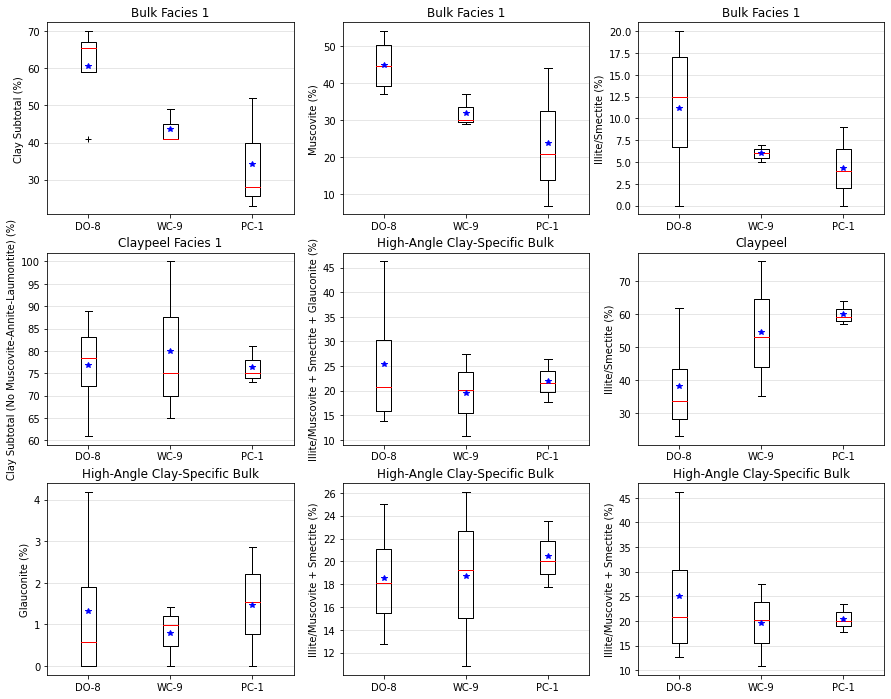

In [49]:
N = 2 #create Indices, change based on number plotting
ind = np.arange(N) # the x locations for the groups
width = 0.2 # the width of the bars, .8 is the default
labels = ['DO-8', 'WC-9', 'PC-1']

plt.figure(figsize=(15,12))
ax0 = plt.subplot(331)
ax0.boxplot(Bulksubtotal2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax0.set_ylabel('Clay Subtotal (%)')
ax0.set_title('Bulk Facies 1')
ax0.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax1 = plt.subplot(332)
ax1.boxplot(BulkMuscovite2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax1.set_ylabel('Muscovite (%)')
ax1.set_title('Bulk Facies 1')
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax2 = plt.subplot(333)
ax2.boxplot(BulkIllite2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax2.set_ylabel('Illite/Smectite (%)')
ax2.set_title('Bulk Facies 1')
ax2.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax3 = plt.subplot(334)
ax3.boxplot(Claypeelsubtotal2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax3.set_ylabel('Clay Subtotal (No Muscovite-Annite-Laumontite) (%)')
ax3.set_title('Claypeel Facies 1')
ax3.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax5 = plt.subplot(335)
ax5.boxplot(HAMica_all2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax5.set_ylabel('Illite/Muscovite + Smectite + Glauconite (%)')
ax5.set_title('High-Angle Clay-Specific Bulk')
ax5.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax4 = plt.subplot(336)
ax4.boxplot(ClaypeelIllite2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax4.set_ylabel('Illite/Smectite (%)')
ax4.set_title('Claypeel')
ax4.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax6 = plt.subplot(337)
ax6.boxplot(HAGlauconite2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax6.set_ylabel('Glauconite (%)')
ax6.set_title('High-Angle Clay-Specific Bulk')
ax6.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax6 = plt.subplot(338)
ax6.boxplot(HAIllite2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax6.set_ylabel('Illite/Muscovite + Smectite (%)')
ax6.set_title('High-Angle Clay-Specific Bulk')
ax6.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax8 = plt.subplot(3,3,9)
ax8.boxplot(HAIllite_Smectite2, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax8.set_ylabel('Illite/Muscovite + Smectite (%)')
ax8.set_title('High-Angle Clay-Specific Bulk')
ax8.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)


#plt.savefig('code_output/code_output/Bargraph&Boxplots_both.pdf')
plt.show()